In [594]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [595]:
train=pd.read_csv("train_IxoE5JN.csv")
test=pd.read_csv("test_WudNWDM.csv")

In [596]:
train.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [597]:
test.head()

,row_id,datetime
0,94993,2019-01-01 00:00:00
1,94994,2019-01-01 01:00:00
2,94995,2019-01-01 02:00:00
3,94996,2019-01-01 03:00:00
4,94997,2019-01-01 04:00:00


In [598]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [599]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26304 non-null  int64 
 1   datetime  26304 non-null  object
dtypes: int64(1), object(1)
memory usage: 411.1+ KB


In [600]:
train.isnull().sum()

row_id         0
datetime       0
energy      1900
dtype: int64

In [601]:
test.isnull().sum()

row_id      0
datetime    0
dtype: int64

In [602]:
train=train.dropna()

In [603]:
train

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500
...,...,...,...
94987,94988,2018-12-31 19:00:00,2528.446800
94988,94989,2018-12-31 20:00:00,2461.883600
94989,94990,2018-12-31 21:00:00,2365.994400
94990,94991,2018-12-31 22:00:00,2342.942800


In [604]:
import datetime as dt

In [605]:
#train['datetime'] =  pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')

In [606]:
train['datetime']

0        2008-03-01 00:00:00
1        2008-03-01 01:00:00
2        2008-03-01 02:00:00
3        2008-03-01 03:00:00
4        2008-03-01 04:00:00
                ...         
94987    2018-12-31 19:00:00
94988    2018-12-31 20:00:00
94989    2018-12-31 21:00:00
94990    2018-12-31 22:00:00
94991    2018-12-31 23:00:00
Name: datetime, Length: 93092, dtype: object

In [607]:
train['datetime'] =  pd.to_datetime(train['datetime'], format='%Y-%m-%d')
test['datetime'] =  pd.to_datetime(test['datetime'], format='%Y-%m-%d')

In [608]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93092 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    93092 non-null  int64         
 1   datetime  93092 non-null  datetime64[ns]
 2   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.8 MB


In [609]:
train.describe()

,row_id,energy
count,93092.000000,93092.000000
mean,47481.704002,1702.995014
std,27423.379383,369.322103
min,1.000000,866.388600
25%,23745.750000,1431.541100
50%,47476.500000,1654.465800
75%,71221.250000,1935.993450
max,94992.000000,3374.399600


In [610]:
train['year']= train['datetime'].dt.year
train['month']= train['datetime'].dt.month
train['day']= train['datetime'].dt.day
train.head()

,row_id,datetime,energy,year,month,day
0,1,2008-03-01 00:00:00,1259.985563,2008,3,1
1,2,2008-03-01 01:00:00,1095.541500,2008,3,1
2,3,2008-03-01 02:00:00,1056.247500,2008,3,1
3,4,2008-03-01 03:00:00,1034.742000,2008,3,1
4,5,2008-03-01 04:00:00,1026.334500,2008,3,1


In [611]:
test['year']= test['datetime'].dt.year
test['month']= test['datetime'].dt.month
test['day']= test['datetime'].dt.day
test.head()

,row_id,datetime,year,month,day
0,94993,2019-01-01 00:00:00,2019,1,1
1,94994,2019-01-01 01:00:00,2019,1,1
2,94995,2019-01-01 02:00:00,2019,1,1
3,94996,2019-01-01 03:00:00,2019,1,1
4,94997,2019-01-01 04:00:00,2019,1,1


In [612]:
train['week_of_year'] = train['datetime'].dt.week
train['day_of_week'] = train['datetime'].dt.dayofweek
train['is_leap_year'] = train['datetime'].dt.is_leap_year
train['is_leap_year']=np.where(train['is_leap_year'].isin(['True','False']),1,0)
train.head()


C:\Users\PRAFULL NAYAN\AppData\Local\Temp\ipykernel_19220\1986024905.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['week_of_year'] = train['datetime'].dt.week


,row_id,datetime,energy,year,month,day,week_of_year,day_of_week,is_leap_year
0,1,2008-03-01 00:00:00,1259.985563,2008,3,1,9,5,0
1,2,2008-03-01 01:00:00,1095.541500,2008,3,1,9,5,0
2,3,2008-03-01 02:00:00,1056.247500,2008,3,1,9,5,0
3,4,2008-03-01 03:00:00,1034.742000,2008,3,1,9,5,0
4,5,2008-03-01 04:00:00,1026.334500,2008,3,1,9,5,0


In [613]:
test['week_of_year'] = test['datetime'].dt.week
test['day_of_week'] = test['datetime'].dt.dayofweek
test['is_leap_year'] = test['datetime'].dt.is_leap_year
test['is_leap_year']=np.where(test['is_leap_year'].isin(['True','False']),1,0)
test.head()

C:\Users\PRAFULL NAYAN\AppData\Local\Temp\ipykernel_19220\1954203175.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  test['week_of_year'] = test['datetime'].dt.week


,row_id,datetime,year,month,day,week_of_year,day_of_week,is_leap_year
0,94993,2019-01-01 00:00:00,2019,1,1,1,1,0
1,94994,2019-01-01 01:00:00,2019,1,1,1,1,0
2,94995,2019-01-01 02:00:00,2019,1,1,1,1,0
3,94996,2019-01-01 03:00:00,2019,1,1,1,1,0
4,94997,2019-01-01 04:00:00,2019,1,1,1,1,0


In [614]:
train['hour'] = train.datetime.dt.hour

train['day_of_year'] = train.datetime.dt.dayofyear
train['quarter'] = train.datetime.dt.quarter

In [615]:
test['hour'] = test.datetime.dt.hour

test['day_of_year'] = test.datetime.dt.dayofyear
test['quarter'] = test.datetime.dt.quarter

In [616]:
train

,row_id,datetime,energy,year,month,day,week_of_year,day_of_week,is_leap_year,hour,day_of_year,quarter
0,1,2008-03-01 00:00:00,1259.985563,2008,3,1,9,5,0,0,61,1
1,2,2008-03-01 01:00:00,1095.541500,2008,3,1,9,5,0,1,61,1
2,3,2008-03-01 02:00:00,1056.247500,2008,3,1,9,5,0,2,61,1
3,4,2008-03-01 03:00:00,1034.742000,2008,3,1,9,5,0,3,61,1
4,5,2008-03-01 04:00:00,1026.334500,2008,3,1,9,5,0,4,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...
94987,94988,2018-12-31 19:00:00,2528.446800,2018,12,31,1,0,0,19,365,4
94988,94989,2018-12-31 20:00:00,2461.883600,2018,12,31,1,0,0,20,365,4
94989,94990,2018-12-31 21:00:00,2365.994400,2018,12,31,1,0,0,21,365,4
94990,94991,2018-12-31 22:00:00,2342.942800,2018,12,31,1,0,0,22,365,4


In [617]:
test.head()

,row_id,datetime,year,month,day,week_of_year,day_of_week,is_leap_year,hour,day_of_year,quarter
0,94993,2019-01-01 00:00:00,2019,1,1,1,1,0,0,1,1
1,94994,2019-01-01 01:00:00,2019,1,1,1,1,0,1,1,1
2,94995,2019-01-01 02:00:00,2019,1,1,1,1,0,2,1,1
3,94996,2019-01-01 03:00:00,2019,1,1,1,1,0,3,1,1
4,94997,2019-01-01 04:00:00,2019,1,1,1,1,0,4,1,1


In [618]:
train['is_weekend'] = np.where(train['day_of_week'].isin([5,6]),1,0)
test['is_weekend'] = np.where(test['day_of_week'].isin([5,6]),1,0)

In [619]:
train

,row_id,datetime,energy,year,month,day,week_of_year,day_of_week,is_leap_year,hour,day_of_year,quarter,is_weekend
0,1,2008-03-01 00:00:00,1259.985563,2008,3,1,9,5,0,0,61,1,1
1,2,2008-03-01 01:00:00,1095.541500,2008,3,1,9,5,0,1,61,1,1
2,3,2008-03-01 02:00:00,1056.247500,2008,3,1,9,5,0,2,61,1,1
3,4,2008-03-01 03:00:00,1034.742000,2008,3,1,9,5,0,3,61,1,1
4,5,2008-03-01 04:00:00,1026.334500,2008,3,1,9,5,0,4,61,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94987,94988,2018-12-31 19:00:00,2528.446800,2018,12,31,1,0,0,19,365,4,0
94988,94989,2018-12-31 20:00:00,2461.883600,2018,12,31,1,0,0,20,365,4,0
94989,94990,2018-12-31 21:00:00,2365.994400,2018,12,31,1,0,0,21,365,4,0
94990,94991,2018-12-31 22:00:00,2342.942800,2018,12,31,1,0,0,22,365,4,0


In [620]:
train['diff_days'] = (dt.datetime.today() - train['datetime']) / np.timedelta64(1, 'D')
train['diff_weeks'] = (dt.datetime.today() - train['datetime']) / np.timedelta64(1, 'W')
train['diff_months'] = (dt.datetime.today() - train['datetime']) / np.timedelta64(1, 'M')
train['diff_years'] = (dt.datetime.today() - train['datetime']) / np.timedelta64(1, 'Y')

In [621]:
test['diff_days'] = (dt.datetime.today() - test['datetime']) / np.timedelta64(1, 'D')
test['diff_weeks'] = (dt.datetime.today() - test['datetime']) / np.timedelta64(1, 'W')
test['diff_months'] = (dt.datetime.today() - test['datetime']) / np.timedelta64(1, 'M')
test['diff_years'] = (dt.datetime.today() - test['datetime']) / np.timedelta64(1, 'Y')

In [622]:
train['year'].value_counts().index.tolist()

[2011, 2016, 2012, 2009, 2013, 2014, 2018, 2015, 2010, 2017, 2008]

In [623]:
import holidays
all_holiday=[]
for date, name in sorted(holidays.IND(years=[2011, 2016, 2012, 2009, 2013, 2014, 2018, 2015, 2010, 2017, 2008,2020,2019,2021]).items()):
    print(date)
    all_holiday.append(date)

2008-01-14
2008-01-26
2008-05-01
2008-08-15
2008-10-02
2008-12-25
2009-01-14
2009-01-26
2009-05-01
2009-08-15
2009-10-02
2009-12-25
2010-01-14
2010-01-26
2010-02-28
2010-05-01
2010-08-15
2010-10-02
2010-12-05
2010-12-25
2011-01-14
2011-01-26
2011-03-19
2011-05-01
2011-08-15
2011-10-02
2011-10-26
2011-12-25
2012-01-14
2012-01-26
2012-03-08
2012-05-01
2012-08-15
2012-10-02
2012-11-13
2012-12-25
2013-01-14
2013-01-26
2013-03-26
2013-05-01
2013-08-15
2013-10-02
2013-11-03
2013-12-25
2014-01-14
2014-01-26
2014-03-17
2014-05-01
2014-08-15
2014-10-02
2014-10-23
2014-12-25
2015-01-14
2015-01-26
2015-03-06
2015-05-01
2015-08-15
2015-10-02
2015-11-11
2015-12-25
2016-01-14
2016-01-26
2016-03-24
2016-05-01
2016-08-15
2016-10-02
2016-10-30
2016-12-25
2017-01-14
2017-01-26
2017-03-13
2017-05-01
2017-08-15
2017-10-02
2017-10-19
2017-12-25
2018-01-14
2018-01-26
2018-03-02
2018-05-01
2018-08-15
2018-10-02
2018-11-07
2018-12-25
2019-01-14
2019-01-26
2019-03-21
2019-05-01
2019-08-15
2019-10-02
2019-10-27

C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\holidays\countries\india.py:176: Warning: Diwali and Holi holidays available from 2010 to 2030 only
  warnings.warn(warning_msg, Warning)


In [624]:
train['is_holiday'] = train['datetime'].isin(all_holiday)

In [625]:
train['is_holiday'].value_counts()

False    93011
True        81
Name: is_holiday, dtype: int64

In [626]:
test['year'].value_counts().index.tolist()

[2020, 2019, 2021]

In [627]:
test['is_holiday'] = test['datetime'].isin(all_holiday)

In [628]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numeric values to categories
train['is_holiday'] = labelencoder.fit_transform(train['is_holiday'])
test['is_holiday'] = labelencoder.fit_transform(test['is_holiday'])


In [629]:
train.head()

,row_id,datetime,energy,year,month,day,week_of_year,day_of_week,is_leap_year,hour,day_of_year,quarter,is_weekend,diff_days,diff_weeks,diff_months,diff_years,is_holiday
0,1,2008-03-01 00:00:00,1259.985563,2008,3,1,9,5,0,0,61,1,1,5377.379892,768.197127,176.673193,14.722766,0
1,2,2008-03-01 01:00:00,1095.541500,2008,3,1,9,5,0,1,61,1,1,5377.338225,768.191175,176.671824,14.722652,0
2,3,2008-03-01 02:00:00,1056.247500,2008,3,1,9,5,0,2,61,1,1,5377.296559,768.185223,176.670455,14.722538,0
3,4,2008-03-01 03:00:00,1034.742000,2008,3,1,9,5,0,3,61,1,1,5377.254892,768.179270,176.669086,14.722424,0
4,5,2008-03-01 04:00:00,1026.334500,2008,3,1,9,5,0,4,61,1,1,5377.213225,768.173318,176.667717,14.722310,0


In [630]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93092 entries, 0 to 94991
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   row_id        93092 non-null  int64         
 1   datetime      93092 non-null  datetime64[ns]
 2   energy        93092 non-null  float64       
 3   year          93092 non-null  int64         
 4   month         93092 non-null  int64         
 5   day           93092 non-null  int64         
 6   week_of_year  93092 non-null  int64         
 7   day_of_week   93092 non-null  int64         
 8   is_leap_year  93092 non-null  int32         
 9   hour          93092 non-null  int64         
 10  day_of_year   93092 non-null  int64         
 11  quarter       93092 non-null  int64         
 12  is_weekend    93092 non-null  int32         
 13  diff_days     93092 non-null  float64       
 14  diff_weeks    93092 non-null  float64       
 15  diff_months   93092 non-null  float6

In [631]:
train

,row_id,datetime,energy,year,month,day,week_of_year,day_of_week,is_leap_year,hour,day_of_year,quarter,is_weekend,diff_days,diff_weeks,diff_months,diff_years,is_holiday
0,1,2008-03-01 00:00:00,1259.985563,2008,3,1,9,5,0,0,61,1,1,5377.379892,768.197127,176.673193,14.722766,0
1,2,2008-03-01 01:00:00,1095.541500,2008,3,1,9,5,0,1,61,1,1,5377.338225,768.191175,176.671824,14.722652,0
2,3,2008-03-01 02:00:00,1056.247500,2008,3,1,9,5,0,2,61,1,1,5377.296559,768.185223,176.670455,14.722538,0
3,4,2008-03-01 03:00:00,1034.742000,2008,3,1,9,5,0,3,61,1,1,5377.254892,768.179270,176.669086,14.722424,0
4,5,2008-03-01 04:00:00,1026.334500,2008,3,1,9,5,0,4,61,1,1,5377.213225,768.173318,176.667717,14.722310,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94987,94988,2018-12-31 19:00:00,2528.446800,2018,12,31,1,0,0,19,365,4,0,1419.588225,202.798318,46.640407,3.886701,0
94988,94989,2018-12-31 20:00:00,2461.883600,2018,12,31,1,0,0,20,365,4,0,1419.546559,202.792366,46.639038,3.886586,0
94989,94990,2018-12-31 21:00:00,2365.994400,2018,12,31,1,0,0,21,365,4,0,1419.504892,202.786413,46.637669,3.886472,0
94990,94991,2018-12-31 22:00:00,2342.942800,2018,12,31,1,0,0,22,365,4,0,1419.463225,202.780461,46.636300,3.886358,0


In [632]:
train.columns

Index(['row_id', 'datetime', 'energy', 'year', 'month', 'day', 'week_of_year',
       'day_of_week', 'is_leap_year', 'hour', 'day_of_year', 'quarter',
       'is_weekend', 'diff_days', 'diff_weeks', 'diff_months', 'diff_years',
       'is_holiday'],
      dtype='object')

In [633]:
X=train[['year', 'month', 'day', 'week_of_year',
       'day_of_week', 'hour', 'day_of_year', 'quarter',
       'is_weekend', 'diff_days', 'diff_weeks', 'diff_months', 'diff_years','is_holiday']]

In [634]:
y=train['energy']

In [635]:
y

0        1259.985563
1        1095.541500
2        1056.247500
3        1034.742000
4        1026.334500
            ...     
94987    2528.446800
94988    2461.883600
94989    2365.994400
94990    2342.942800
94991    2180.217600
Name: energy, Length: 93092, dtype: float64

In [636]:
X

,year,month,day,week_of_year,day_of_week,hour,day_of_year,quarter,is_weekend,diff_days,diff_weeks,diff_months,diff_years,is_holiday
0,2008,3,1,9,5,0,61,1,1,5377.379892,768.197127,176.673193,14.722766,0
1,2008,3,1,9,5,1,61,1,1,5377.338225,768.191175,176.671824,14.722652,0
2,2008,3,1,9,5,2,61,1,1,5377.296559,768.185223,176.670455,14.722538,0
3,2008,3,1,9,5,3,61,1,1,5377.254892,768.179270,176.669086,14.722424,0
4,2008,3,1,9,5,4,61,1,1,5377.213225,768.173318,176.667717,14.722310,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94987,2018,12,31,1,0,19,365,4,0,1419.588225,202.798318,46.640407,3.886701,0
94988,2018,12,31,1,0,20,365,4,0,1419.546559,202.792366,46.639038,3.886586,0
94989,2018,12,31,1,0,21,365,4,0,1419.504892,202.786413,46.637669,3.886472,0
94990,2018,12,31,1,0,22,365,4,0,1419.463225,202.780461,46.636300,3.886358,0


In [637]:
test.drop(['row_id','datetime','is_leap_year'],axis=1,inplace=True)

In [638]:
test

,year,month,day,week_of_year,day_of_week,hour,day_of_year,quarter,is_weekend,diff_days,diff_weeks,diff_months,diff_years,is_holiday
0,2019,1,1,1,1,0,1,1,0,1419.379893,202.768556,46.633562,3.886130,0
1,2019,1,1,1,1,1,1,1,0,1419.338226,202.762604,46.632193,3.886016,0
2,2019,1,1,1,1,2,1,1,0,1419.296559,202.756651,46.630824,3.885902,0
3,2019,1,1,1,1,3,1,1,0,1419.254893,202.750699,46.629455,3.885788,0
4,2019,1,1,1,1,4,1,1,0,1419.213226,202.744747,46.628086,3.885674,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,2021,12,31,52,4,19,365,4,0,323.588226,46.226889,10.631454,0.885954,0
26300,2021,12,31,52,4,20,365,4,0,323.546559,46.220937,10.630085,0.885840,0
26301,2021,12,31,52,4,21,365,4,0,323.504893,46.214985,10.628716,0.885726,0
26302,2021,12,31,52,4,22,365,4,0,323.463226,46.209032,10.627347,0.885612,0


# Splitting into train test val

In [639]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print('size of train set',X_train.shape,y_train.shape)
print('size of test set',X_test.shape,y_test.shape)

size of train set (74473, 14) (74473,)
size of test set (18619, 14) (18619,)


In [640]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
print('size of train set',X_train.shape,y_train.shape)
print('size of val set',X_val.shape,y_val.shape)

size of train set (67025, 14) (67025,)
size of val set (7448, 14) (7448,)


# Feature Selection

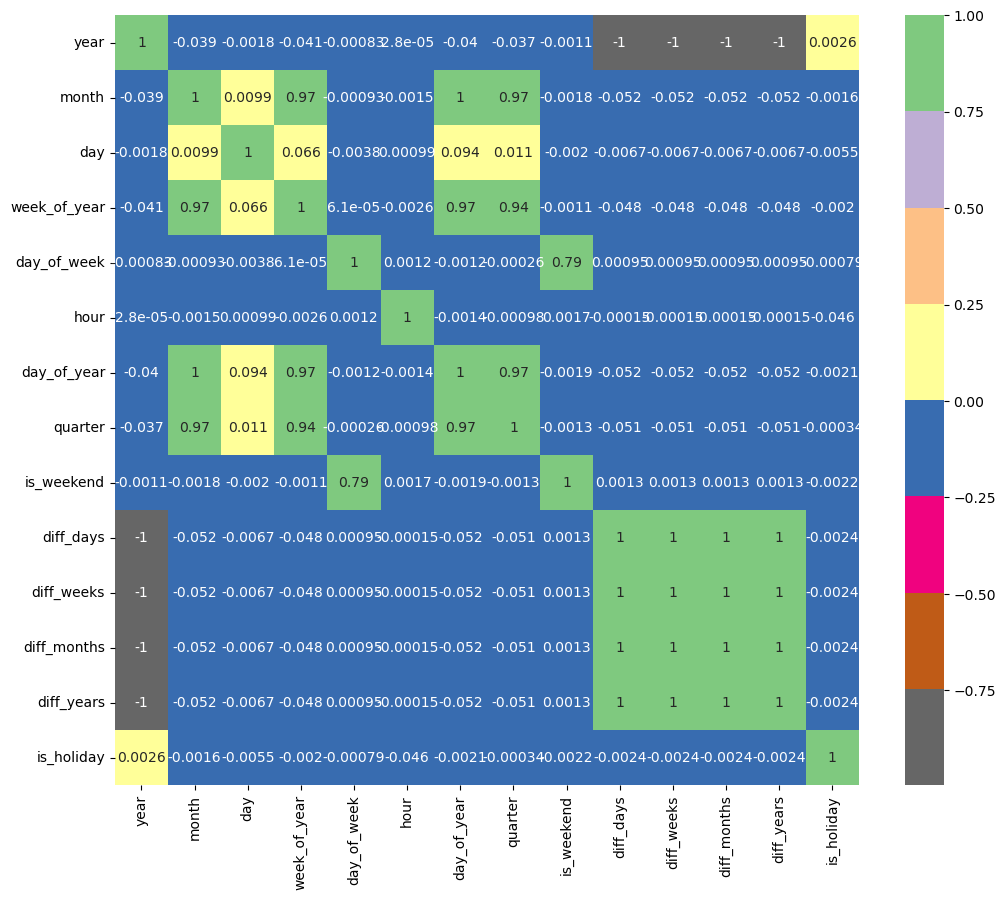

In [641]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent_r)
plt.show()

In [642]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [643]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

6

In [644]:
corr_features

{'day_of_year',
 'diff_months',
 'diff_weeks',
 'diff_years',
 'quarter',
 'week_of_year'}

In [645]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_val.drop(corr_features,axis=1,inplace=True)
test.drop(corr_features,axis=1,inplace=True)

In [646]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(test.shape)

(67025, 8)
(18619, 8)
(7448, 8)
(26304, 8)


In [647]:
X_train.columns

Index(['year', 'month', 'day', 'day_of_week', 'hour', 'is_weekend',
       'diff_days', 'is_holiday'],
      dtype='object')

In [648]:
test.columns

Index(['year', 'month', 'day', 'day_of_week', 'hour', 'is_weekend',
       'diff_days', 'is_holiday'],
      dtype='object')

# Standardization

In [649]:
x_train=X_train.copy()
x_test=X_test.copy()
t_test=test.copy()
x_val=X_val.copy()

In [650]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val=   scaler.transform(X_val)

In [651]:
x_train

,year,month,day,day_of_week,hour,is_weekend,diff_days,is_holiday
72211,2016,5,26,3,19,0,2368.588225,0
2020,2008,5,24,5,4,1,5293.213225,0
8574,2009,2,21,5,6,1,5020.129892,0
84575,2017,10,23,0,23,0,1853.421559,0
30566,2011,8,26,4,14,0,4103.796559,0
...,...,...,...,...,...,...,...,...
69719,2016,2,12,4,23,0,2472.421559,0
86349,2018,1,5,4,21,0,1779.504892,0
6537,2008,11,28,4,9,0,5105.004892,0
50191,2013,11,21,3,7,0,3286.088225,0


In [652]:
test

,year,month,day,day_of_week,hour,is_weekend,diff_days,is_holiday
0,2019,1,1,1,0,0,1419.379893,0
1,2019,1,1,1,1,0,1419.338226,0
2,2019,1,1,1,2,0,1419.296559,0
3,2019,1,1,1,3,0,1419.254893,0
4,2019,1,1,1,4,0,1419.213226,0
...,...,...,...,...,...,...,...,...
26299,2021,12,31,4,19,0,323.588226,0
26300,2021,12,31,4,20,0,323.546559,0
26301,2021,12,31,4,21,0,323.504893,0
26302,2021,12,31,4,22,0,323.463226,0


In [653]:
test = scaler.transform(test)

In [654]:
lin_regressor=LinearRegression()
lin_regressor.fit(X_train,y_train)

LinearRegression()

In [655]:
X_train

array([[ 0.93644252, -0.4685399 ,  1.1689318 , ..., -0.63227059,
        -0.90209334, -0.02786453],
       [-1.62378999, -0.4685399 ,  0.94173112, ...,  1.58160133,
         1.6589856 , -0.02786453],
       [-1.30376093, -1.34558829,  0.60093011, ...,  1.58160133,
         1.41984794, -0.02786453],
       ...,
       [-1.62378999,  1.28555688,  1.39613248, ..., -0.63227059,
         1.49417254, -0.02786453],
       [-0.02364467,  1.28555688,  0.60093011, ..., -0.63227059,
        -0.09864335, -0.02786453],
       [ 1.57650065,  1.28555688, -1.55747631, ..., -0.63227059,
        -1.68149821, -0.02786453]])

In [656]:
lin_predict=lin_regressor.predict(X_test)

In [657]:
print(mean_squared_error(lin_predict,y_test))

67400.33682021123


In [658]:
lin_predict[0:5]

array([1258.21892554, 2011.51445222, 1921.93850888, 1653.23588749,
       1709.52735763])

In [659]:
y_test.head()

25875    1097.1627
61625    1894.7768
77579    2137.2498
19559    1374.6265
42066    1497.9804
Name: energy, dtype: float64

In [660]:
test

array([[ 1.89652972, -1.63793775, -1.67107665, ..., -0.63227059,
        -1.73331016, -0.02786453],
       [ 1.89652972, -1.63793775, -1.67107665, ..., -0.63227059,
        -1.73334664, -0.02786453],
       [ 1.89652972, -1.63793775, -1.67107665, ..., -0.63227059,
        -1.73338313, -0.02786453],
       ...,
       [ 2.53658785,  1.57790634,  1.73693349, ..., -0.63227059,
        -2.69296221, -0.02786453],
       [ 2.53658785,  1.57790634,  1.73693349, ..., -0.63227059,
        -2.6929987 , -0.02786453],
       [ 2.53658785,  1.57790634,  1.73693349, ..., -0.63227059,
        -2.69303518, -0.02786453]])

In [661]:
X_test

array([[-0.6637028 , -1.34558829, -0.42147293, ...,  1.58160133,
         0.78858144, -0.02786453],
       [ 0.61641346, -1.05323883, -0.42147293, ..., -0.63227059,
        -0.51583896, -0.02786453],
       [ 1.25647159, -1.63793775, -1.2166753 , ..., -0.63227059,
        -1.09795708, -0.02786453],
       ...,
       [ 0.2963844 , -1.63793775, -1.55747631, ..., -0.63227059,
        -0.13596984, -0.02786453],
       [-0.34367373,  1.28555688, -1.55747631, ..., -0.63227059,
         0.23733156, -0.02786453],
       [ 1.57650065, -0.76088937, -1.55747631, ..., -0.63227059,
        -1.49391709, -0.02786453]])

In [662]:
lin_predict_test=lin_regressor.predict(test)

In [663]:
np.around(lin_predict_test,4)

array([1830.2292, 1847.4056, 1864.582 , ..., 2562.2197, 2579.3961,
       2596.5726])

In [664]:
test_copy=pd.read_csv('test_WudNWDM.csv')
sample=pd.read_csv('sample_submission_jn0a7vR.csv')

In [665]:
sample

,row_id,energy
0,94993,1702.995014
1,94994,1702.995014
2,94995,1702.995014
3,94996,1702.995014
4,94997,1702.995014
...,...,...
26299,121292,1702.995014
26300,121293,1702.995014
26301,121294,1702.995014
26302,121295,1702.995014


In [666]:
sub=pd.DataFrame(data=test_copy['row_id'])
sub['energy']=lin_predict_test
sub.head()

,row_id,energy
0,94993,1830.229160
1,94994,1847.405597
2,94995,1864.582035
3,94996,1881.758473
4,94997,1898.934911


In [667]:
sub.to_csv('sub.csv',index=False)

In [668]:
check=pd.read_csv("sub.csv")

In [669]:
check.head()

,row_id,energy
0,94993,1830.229160
1,94994,1847.405597
2,94995,1864.582035
3,94996,1881.758473
4,94997,1898.934911


# Ridge Regression

In [670]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=8.7037e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [671]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 55}
-71747.39885858614


In [672]:
ridge_n=Ridge(alpha= 55)

In [673]:
ridge_n.fit(X_train,y_train)
#np.around(lin_predict_test,4)
ridge_predict=ridge_n.predict(test)

In [674]:
check=ridge_n.predict(X_test)
print(mean_squared_error(check,y_test))

68554.17438299367


In [675]:
sub_ridge=pd.DataFrame(data=test_copy['row_id'])
sub_ridge['energy']=ridge_predict
sub_ridge.head()

,row_id,energy
0,94993,1858.632235
1,94994,1875.789596
2,94995,1892.946957
3,94996,1910.104318
4,94997,1927.261679


In [676]:
sub_ridge.to_csv('sub_ridge.csv',index=False)

In [677]:
ridge_predict

array([1858.63223461, 1875.7895956 , 1892.94695659, ..., 2574.72996468,
       2591.88732567, 2609.04468667])

# Lasso Regression

In [678]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.801e+09, tolerance: 9.985e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.689e+09, tolerance: 1.048e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.462e+09, tolerance: 9.995e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.256e+09, tolerance: 8.340e+05
  model = cd_fast.enet_coordinate_descent(


{'alpha': 1e-15}
-71885.77187021724


C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.191e+09, tolerance: 1.270e+06
  model = cd_fast.enet_coordinate_descent(


In [679]:
lasso=Lasso(alpha=1e-15)

In [680]:
lasso.fit(X_train,y_train)
#np.around(lin_predict_test,4)
lasso_predict=lasso.predict(test)
check=lasso.predict(X_test)
print(mean_squared_error(check,y_test))
print(r2_score(check,y_test))

68550.38416613307
-0.0074942683556997736


C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.304e+09, tolerance: 9.156e+05
  model = cd_fast.enet_coordinate_descent(


In [681]:
check=lasso.predict(X_train)
print(mean_squared_error(check,y_train))
print(r2_score(check,y_train))


68758.35534465492
-0.0135984953956092


# Decision Tree

In [682]:
from sklearn.tree import DecisionTreeRegressor

In [683]:
dtr=DecisionTreeRegressor()

In [684]:
x_train

,year,month,day,day_of_week,hour,is_weekend,diff_days,is_holiday
72211,2016,5,26,3,19,0,2368.588225,0
2020,2008,5,24,5,4,1,5293.213225,0
8574,2009,2,21,5,6,1,5020.129892,0
84575,2017,10,23,0,23,0,1853.421559,0
30566,2011,8,26,4,14,0,4103.796559,0
...,...,...,...,...,...,...,...,...
69719,2016,2,12,4,23,0,2472.421559,0
86349,2018,1,5,4,21,0,1779.504892,0
6537,2008,11,28,4,9,0,5105.004892,0
50191,2013,11,21,3,7,0,3286.088225,0


In [685]:
x_test

,year,month,day,day_of_week,hour,is_weekend,diff_days,is_holiday
25875,2011,2,12,5,3,1,4299.254892,0
61625,2015,3,12,3,17,0,2809.671559,0
77579,2017,1,5,3,11,0,2144.921559,0
19559,2010,5,24,0,23,0,4562.421559,0
42066,2012,12,17,0,18,0,3624.629892,0
...,...,...,...,...,...,...,...,...
65941,2015,9,8,1,13,0,2629.838225,0
65283,2015,8,12,2,3,0,2657.254892,0
51214,2014,1,2,3,22,0,3243.463225,0
40983,2012,11,2,4,15,0,3669.754892,0


In [686]:
dtr.fit(X_train,y_train)
dtr_predict=dtr.predict(test)
check=dtr.predict(X_test)
print(mean_squared_error(check,y_test))
print(r2_score(check,y_test))

5068.603268675486
0.962601197295304


In [687]:
check=dtr.predict(X_train)
print(mean_squared_error(check,y_train))
print(r2_score(check,y_train))

0.0
1.0


In [688]:
sub_dtr=pd.DataFrame(data=test_copy['row_id'])
sub_dtr['energy']=dtr_predict
sub_dtr.head()

,row_id,energy
0,94993,1912.6744
1,94994,1666.9772
2,94995,1718.8276
3,94996,1653.9488
4,94997,1653.9488


In [ ]:
sub_dtr.to_csv('sub_dtr.csv',index=False)

# GridSearchCV

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
dtr=DecisionTreeRegressor()
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
}

In [68]:

grid_cv_dtr = GridSearchCV(dtr, param_grid, cv=5,verbose=1,n_jobs=-1)

In [69]:
grid_cv_dtr.fit(X_val,y_val)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]},
             verbose=1)

In [70]:
grid_cv_dtr.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=8, max_leaf_nodes=100,
                      min_samples_leaf=20, min_samples_split=40)

In [71]:
dtr_model=DecisionTreeRegressor(criterion='mae', max_depth=8, max_leaf_nodes=100,
                      min_samples_leaf=10, min_samples_split=10)

In [72]:
dtr_model.fit(X_train,y_train)
dtr_predict=dtr_model.predict(test)
check=dtr_model.predict(X_test)
print(mean_squared_error(check,y_test))
print(r2_score(check,y_test))

C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\sklearn\tree\_classes.py:366: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(


31816.51324966322
0.701578811824193


# Random Forest

In [236]:
#import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [121]:
x_train

,year,month,day,day_of_week,hour,is_weekend,diff_days
72211,2016,5,26,3,19,0,2367.668656
2020,2008,5,24,5,4,1,5292.293656
8574,2009,2,21,5,6,1,5019.210323
84575,2017,10,23,0,23,0,1852.501989
30566,2011,8,26,4,14,0,4102.876989
...,...,...,...,...,...,...,...
69719,2016,2,12,4,23,0,2471.501989
86349,2018,1,5,4,21,0,1778.585323
6537,2008,11,28,4,9,0,5104.085323
50191,2013,11,21,3,7,0,3285.168656


In [134]:
rf=RandomForestRegressor(n_estimators=6000)

In [ ]:
rf.fit(x_train,y_train)
rf_predict=rf.predict(t_test)
check=rf.predict(x_test)
print(mean_squared_error(check,y_test))
print(r2_score(check,y_test))

In [ ]:
check=rf.predict(x_train)
print(mean_squared_error(check,y_train))
print(r2_score(check,y_train))

In [247]:
sub_rf1=pd.DataFrame(data=test_copy['row_id'])
sub_rf1['energy']=rf_predict
sub_rf1.to_csv('sub_rf1.csv',index=False)
sub_rf1.head()

NameError: name 'rf_predict' is not defined

# RandomizedSearchCV Random Forest

In [238]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est = RandomForestRegressor(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,15,None],
              'n_estimators':[100,200,300,400,500,600],
              'max_features':randint(1,3),
               "criterion": ["mse", "mae"],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,4),
              }

In [240]:
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=4,verbose=1)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score

In [241]:
rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 40, x_val, y_val)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [242]:
rf_parameters

{'bootstrap': False,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 1,
 'n_estimators': 400}

In [243]:
rf_ht_score

0.8909052042671626

In [284]:
est = RandomForestRegressor(bootstrap= False,
 criterion= 'mse',
 max_depth= None,
 max_features= 2,
 min_samples_leaf= 1,
 n_estimators= 400)

In [285]:
X

,year,month,day,day_of_week,hour,is_weekend,diff_days
0,2008,3,1,5,0,1,5376.613156
1,2008,3,1,5,1,1,5376.571489
2,2008,3,1,5,2,1,5376.529823
3,2008,3,1,5,3,1,5376.488156
4,2008,3,1,5,4,1,5376.446489
...,...,...,...,...,...,...,...
94987,2018,12,31,0,19,0,1418.821489
94988,2018,12,31,0,20,0,1418.779823
94989,2018,12,31,0,21,0,1418.738156
94990,2018,12,31,0,22,0,1418.696489


In [290]:
est.fit(X,y)
est_predict=est.predict(t_test)
# check=est.predict(x_test)
# print(mean_squared_error(check,y_test))
# print(r2_score(check,y_test))

C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [287]:
X=X[['year', 'month', 'day', 'day_of_week', 'hour', 'is_weekend',
       'diff_days']]

In [288]:
X

,year,month,day,day_of_week,hour,is_weekend,diff_days
0,2008,3,1,5,0,1,5376.613156
1,2008,3,1,5,1,1,5376.571489
2,2008,3,1,5,2,1,5376.529823
3,2008,3,1,5,3,1,5376.488156
4,2008,3,1,5,4,1,5376.446489
...,...,...,...,...,...,...,...
94987,2018,12,31,0,19,0,1418.821489
94988,2018,12,31,0,20,0,1418.779823
94989,2018,12,31,0,21,0,1418.738156
94990,2018,12,31,0,22,0,1418.696489


In [289]:
y

0        1259.985563
1        1095.541500
2        1056.247500
3        1034.742000
4        1026.334500
            ...     
94987    2528.446800
94988    2461.883600
94989    2365.994400
94990    2342.942800
94991    2180.217600
Name: energy, Length: 93092, dtype: float64

In [277]:
x_train.columns

Index(['year', 'month', 'day', 'day_of_week', 'hour', 'is_weekend',
       'diff_days'],
      dtype='object')

In [ ]:
y

In [270]:
est_predict

array([1822.35110083, 1761.28513303, 1725.26925683, ..., 2355.312247  ,
       2325.3808438 , 2212.1117574 ])

In [291]:
sub_est=pd.DataFrame(data=test_copy['row_id'])
sub_est['energy']=est_predict
sub_est.to_csv('est_predict4.csv',index=False)
sub_est.head()

,row_id,energy
0,94993,1831.820491
1,94994,1777.259535
2,94995,1741.504903
3,94996,1730.068209
4,94997,1724.744577


In [265]:
sub_est

,row_id,energy
0,94993,1847.860256
1,94994,1768.796504
2,94995,1727.493860
3,94996,1711.601197
4,94997,1711.588860
...,...,...
26299,121292,2462.902706
26300,121293,2393.067475
26301,121294,2355.602343
26302,121295,2308.412592


# XGB Regressor

In [443]:
from xgboost import XGBRegressor

C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [444]:
xgb=XGBRegressor()

In [445]:
xgb.fit(x_train,y_train)
xgb_predict=xgb.predict(t_test)
check=xgb.predict(x_test)
print(mean_squared_error(check,y_test))
print(r2_score(check,y_test))

C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


5781.700644807838
0.9533594456142264


# SVR

In [84]:
from sklearn.svm import SVR

In [85]:
svr=SVR()

In [86]:
svr.fit(X_train,y_train)
svr_predict=svr.predict(test)
check=svr.predict(X_test)
print(mean_squared_error(check,y_test))
print(r2_score(check,y_test))

59213.196274298985
0.012531329732820673


# Random Forest Regressor Tuning

In [87]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [88]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [89]:
rf = RandomForestRegressor()

In [90]:

#implementing GridSearchCV
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [91]:
rf_Grid.fit(X_val, y_val)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]},
             verbose=2)

In [92]:
rf_Grid.best_estimator_

RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=200)

In [93]:
rf_model=RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=200)

In [94]:
rf_model.fit(X_train,y_train)
rf_predict=rf_model.predict(test)
check=rf_model.predict(X_test)
print(mean_squared_error(check,y_test))
print(r2_score(check,y_test))

49363.859114913255
0.3903472021022544


# ANN

In [46]:
#importing libries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [47]:
#Making the ANN Model
model = Sequential()

model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [48]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=100)

Epoch 1/100
524/524 [==============================] - 5s 7ms/step - loss: 1346716.2500 - val_loss: 180038.8125
Epoch 2/100
524/524 [==============================] - 3s 6ms/step - loss: 137965.0625 - val_loss: 107204.6250
Epoch 3/100
524/524 [==============================] - 3s 6ms/step - loss: 93508.3672 - val_loss: 85468.7109
Epoch 4/100
524/524 [==============================] - 3s 6ms/step - loss: 80336.8906 - val_loss: 77254.1172
Epoch 5/100
524/524 [==============================] - 3s 6ms/step - loss: 74560.2891 - val_loss: 72823.0391
Epoch 6/100
524/524 [==============================] - 3s 6ms/step - loss: 71164.0469 - val_loss: 69963.5547
Epoch 7/100
524/524 [==============================] - 3s 5ms/step - loss: 68868.4688 - val_loss: 68509.4609
Epoch 8/100
524/524 [==============================] - 3s 6ms/step - loss: 67715.7422 - val_loss: 67324.1953
Epoch 9/100
524/524 [==============================] - 3s 6ms/step - loss: 66879.5547 - val_loss: 66755.6719
Epoch 10/100
5

# Catboost Regressor

In [54]:
import catboost as cb

C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [64]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [65]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [66]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 1691.1431788	test: 1694.0013508	best: 1694.0013508 (0)	total: 10.1ms	remaining: 996ms
1:	learn: 1642.1513757	test: 1644.9901910	best: 1644.9901910 (1)	total: 17.1ms	remaining: 836ms
2:	learn: 1594.6540384	test: 1597.4829541	best: 1597.4829541 (2)	total: 23.3ms	remaining: 754ms
3:	learn: 1548.4687835	test: 1551.1930133	best: 1551.1930133 (3)	total: 29.9ms	remaining: 717ms
4:	learn: 1503.7384037	test: 1506.3701575	best: 1506.3701575 (4)	total: 36.4ms	remaining: 692ms
5:	learn: 1460.1919489	test: 1462.7451297	best: 1462.7451297 (5)	total: 42.6ms	remaining: 667ms
6:	learn: 1418.2056442	test: 1420.6776933	best: 1420.6776933 (6)	total: 48.6ms	remaining: 646ms
7:	learn: 1377.4842107	test: 1379.8968578	best: 1379.8968578 (7)	total: 55.1ms	remaining: 634ms
8:	learn: 1337.6911937	test: 1340.0171316	best: 1340.0171316 (8)	total: 61.6ms	remaining: 623ms
9:	learn: 1299.5130603	test: 1301.7538399	best: 1301.7538399 (9)	total: 68ms	remaining: 612ms
10:	learn: 1262.4536148	test: 1264.6193867

90:	learn: 263.4102698	test: 263.0700169	best: 263.0700169 (90)	total: 635ms	remaining: 62.8ms
91:	learn: 261.4342477	test: 261.1014762	best: 261.1014762 (91)	total: 645ms	remaining: 56.1ms
92:	learn: 259.8640878	test: 259.5352106	best: 259.5352106 (92)	total: 650ms	remaining: 48.9ms
93:	learn: 258.3972344	test: 258.0707246	best: 258.0707246 (93)	total: 657ms	remaining: 41.9ms
94:	learn: 256.9708334	test: 256.6194535	best: 256.6194535 (94)	total: 663ms	remaining: 34.9ms
95:	learn: 255.6159299	test: 255.2807924	best: 255.2807924 (95)	total: 673ms	remaining: 28.1ms
96:	learn: 254.3046397	test: 253.9502291	best: 253.9502291 (96)	total: 680ms	remaining: 21ms
97:	learn: 252.7213296	test: 252.3787804	best: 252.3787804 (97)	total: 687ms	remaining: 14ms
98:	learn: 251.4580743	test: 251.1095587	best: 251.1095587 (98)	total: 693ms	remaining: 7ms
99:	learn: 250.0034814	test: 249.6676527	best: 249.6676527 (99)	total: 699ms	remaining: 0us

bestTest = 249.6676527
bestIteration = 99

0:	loss: 249.667

94:	learn: 184.3625030	test: 184.7480514	best: 184.7480514 (94)	total: 724ms	remaining: 38.1ms
95:	learn: 183.9639304	test: 184.3422465	best: 184.3422465 (95)	total: 730ms	remaining: 30.4ms
96:	learn: 183.7366015	test: 184.1000771	best: 184.1000771 (96)	total: 735ms	remaining: 22.7ms
97:	learn: 183.3556510	test: 183.7383729	best: 183.7383729 (97)	total: 741ms	remaining: 15.1ms
98:	learn: 183.1502367	test: 183.5426767	best: 183.5426767 (98)	total: 747ms	remaining: 7.54ms
99:	learn: 182.9705035	test: 183.3337855	best: 183.3337855 (99)	total: 751ms	remaining: 0us

bestTest = 183.3337855
bestIteration = 99

1:	loss: 183.3337855	best: 183.3337855 (1)	total: 1.61s	remaining: 1m 15s
0:	learn: 1691.1443324	test: 1694.0024990	best: 1694.0024990 (0)	total: 10.5ms	remaining: 1.04s
1:	learn: 1642.1532567	test: 1644.9920608	best: 1644.9920608 (1)	total: 20.2ms	remaining: 990ms
2:	learn: 1594.6568091	test: 1597.4857264	best: 1597.4857264 (2)	total: 29ms	remaining: 937ms
3:	learn: 1548.4723447	test: 

1:	learn: 1421.9977642	test: 1424.5492833	best: 1424.5492833 (1)	total: 23ms	remaining: 1.13s
2:	learn: 1286.6764750	test: 1289.1771359	best: 1289.1771359 (2)	total: 32.6ms	remaining: 1.05s
3:	learn: 1164.9573407	test: 1167.1263761	best: 1167.1263761 (3)	total: 38.1ms	remaining: 913ms
4:	learn: 1056.2066826	test: 1058.0952696	best: 1058.0952696 (4)	total: 43.3ms	remaining: 823ms
5:	learn: 957.3911189	test: 958.9745905	best: 958.9745905 (5)	total: 48.4ms	remaining: 758ms
6:	learn: 870.7003112	test: 872.0552083	best: 872.0552083 (6)	total: 53.4ms	remaining: 710ms
7:	learn: 792.1045583	test: 793.3323664	best: 793.3323664 (7)	total: 60.2ms	remaining: 693ms
8:	learn: 721.7304595	test: 722.7728095	best: 722.7728095 (8)	total: 68.9ms	remaining: 696ms
9:	learn: 660.3370651	test: 661.1781156	best: 661.1781156 (9)	total: 78.8ms	remaining: 709ms
10:	learn: 605.7588636	test: 606.4228978	best: 606.4228978 (10)	total: 84.8ms	remaining: 686ms
11:	learn: 556.6858360	test: 557.1857447	best: 557.1857447

91:	learn: 185.5229335	test: 185.9439710	best: 185.9439710 (91)	total: 644ms	remaining: 56ms
92:	learn: 185.2983799	test: 185.6999330	best: 185.6999330 (92)	total: 651ms	remaining: 49ms
93:	learn: 184.7051128	test: 185.0702345	best: 185.0702345 (93)	total: 659ms	remaining: 42ms
94:	learn: 184.3648467	test: 184.7504171	best: 184.7504171 (94)	total: 664ms	remaining: 35ms
95:	learn: 183.9662684	test: 184.3446080	best: 184.3446080 (95)	total: 672ms	remaining: 28ms
96:	learn: 183.7389502	test: 184.1024471	best: 184.1024471 (96)	total: 680ms	remaining: 21ms
97:	learn: 183.3579759	test: 183.7407191	best: 183.7407191 (97)	total: 690ms	remaining: 14.1ms
98:	learn: 183.1525653	test: 183.5450270	best: 183.5450270 (98)	total: 697ms	remaining: 7.04ms
99:	learn: 182.9727672	test: 183.3360632	best: 183.3360632 (99)	total: 705ms	remaining: 0us

bestTest = 183.3360632
bestIteration = 99

3:	loss: 183.3360632	best: 183.3337855 (1)	total: 3.13s	remaining: 1m 12s
0:	learn: 1691.1462548	test: 1694.0044123	

0:	learn: 1572.9728824	test: 1575.5965991	best: 1575.5965991 (0)	total: 8.69ms	remaining: 861ms
1:	learn: 1422.0074178	test: 1424.5588788	best: 1424.5588788 (1)	total: 14.7ms	remaining: 722ms
2:	learn: 1286.6895659	test: 1289.1902326	best: 1289.1902326 (2)	total: 21ms	remaining: 680ms
3:	learn: 1164.9729163	test: 1167.1420128	best: 1167.1420128 (3)	total: 28.3ms	remaining: 680ms
4:	learn: 1056.2246556	test: 1058.1132940	best: 1058.1132940 (4)	total: 35.9ms	remaining: 681ms
5:	learn: 957.4105884	test: 958.9941201	best: 958.9941201 (5)	total: 44.8ms	remaining: 702ms
6:	learn: 870.7208747	test: 872.0758290	best: 872.0758290 (6)	total: 50.9ms	remaining: 677ms
7:	learn: 792.1254485	test: 793.3533263	best: 793.3533263 (7)	total: 59.7ms	remaining: 687ms
8:	learn: 721.7515114	test: 722.7939426	best: 722.7939426 (8)	total: 66.8ms	remaining: 675ms
9:	learn: 660.3579830	test: 661.1991290	best: 661.1991290 (9)	total: 74ms	remaining: 666ms
10:	learn: 605.7789455	test: 606.4431082	best: 606.4431082 

89:	learn: 186.4406578	test: 186.8087600	best: 186.8087600 (89)	total: 639ms	remaining: 71ms
90:	learn: 186.1888165	test: 186.5445599	best: 186.5445599 (90)	total: 644ms	remaining: 63.7ms
91:	learn: 185.5268638	test: 185.9479365	best: 185.9479365 (91)	total: 650ms	remaining: 56.5ms
92:	learn: 185.3022850	test: 185.7038792	best: 185.7038792 (92)	total: 656ms	remaining: 49.3ms
93:	learn: 184.7089939	test: 185.0741595	best: 185.0741595 (93)	total: 661ms	remaining: 42.2ms
94:	learn: 184.3687516	test: 184.7543590	best: 184.7543590 (94)	total: 667ms	remaining: 35.1ms
95:	learn: 183.9701638	test: 184.3485428	best: 184.3485428 (95)	total: 674ms	remaining: 28.1ms
96:	learn: 183.7428635	test: 184.1063962	best: 184.1063962 (96)	total: 680ms	remaining: 21ms
97:	learn: 183.3618496	test: 183.7446285	best: 183.7446285 (97)	total: 687ms	remaining: 14ms
98:	learn: 183.1564452	test: 183.5489431	best: 183.5489431 (98)	total: 693ms	remaining: 7ms
99:	learn: 182.9765390	test: 183.3398585	best: 183.3398585 

77:	learn: 294.7381360	test: 294.4178053	best: 294.4178053 (77)	total: 514ms	remaining: 145ms
78:	learn: 291.7678167	test: 291.4386285	best: 291.4386285 (78)	total: 520ms	remaining: 138ms
79:	learn: 288.9308477	test: 288.6042703	best: 288.6042703 (79)	total: 526ms	remaining: 132ms
80:	learn: 285.8313016	test: 285.5020086	best: 285.5020086 (80)	total: 531ms	remaining: 125ms
81:	learn: 283.3024586	test: 282.9687143	best: 282.9687143 (81)	total: 536ms	remaining: 118ms
82:	learn: 280.8435907	test: 280.5032519	best: 280.5032519 (82)	total: 541ms	remaining: 111ms
83:	learn: 278.0993435	test: 277.7590161	best: 277.7590161 (83)	total: 546ms	remaining: 104ms
84:	learn: 275.8817063	test: 275.5325380	best: 275.5325380 (84)	total: 552ms	remaining: 97.5ms
85:	learn: 273.3703078	test: 273.0232875	best: 273.0232875 (85)	total: 562ms	remaining: 91.5ms
86:	learn: 271.1763208	test: 270.8093666	best: 270.8093666 (86)	total: 568ms	remaining: 84.9ms
87:	learn: 269.2147728	test: 268.8368641	best: 268.836864

66:	learn: 197.9847568	test: 198.1258606	best: 198.1258606 (66)	total: 443ms	remaining: 218ms
67:	learn: 197.5812177	test: 197.7358502	best: 197.7358502 (67)	total: 448ms	remaining: 211ms
68:	learn: 196.5811750	test: 196.7262904	best: 196.7262904 (68)	total: 454ms	remaining: 204ms
69:	learn: 195.9710186	test: 196.1484979	best: 196.1484979 (69)	total: 460ms	remaining: 197ms
70:	learn: 195.3163275	test: 195.4883054	best: 195.4883054 (70)	total: 465ms	remaining: 190ms
71:	learn: 194.9232832	test: 195.1326289	best: 195.1326289 (71)	total: 475ms	remaining: 185ms
72:	learn: 194.4901847	test: 194.7186545	best: 194.7186545 (72)	total: 481ms	remaining: 178ms
73:	learn: 194.0497103	test: 194.3087446	best: 194.3087446 (73)	total: 488ms	remaining: 171ms
74:	learn: 193.5284800	test: 193.7404779	best: 193.7404779 (74)	total: 494ms	remaining: 165ms
75:	learn: 192.7412167	test: 192.9141317	best: 192.9141317 (75)	total: 502ms	remaining: 158ms
76:	learn: 192.4043362	test: 192.5920995	best: 192.5920995 (

58:	learn: 384.4694269	test: 384.4663880	best: 384.4663880 (58)	total: 428ms	remaining: 660ms
59:	learn: 377.8059972	test: 377.7851233	best: 377.7851233 (59)	total: 433ms	remaining: 649ms
60:	learn: 371.4612553	test: 371.4063606	best: 371.4063606 (60)	total: 438ms	remaining: 640ms
61:	learn: 365.4217963	test: 365.3450492	best: 365.3450492 (61)	total: 444ms	remaining: 630ms
62:	learn: 359.5173851	test: 359.4207341	best: 359.4207341 (62)	total: 449ms	remaining: 620ms
63:	learn: 353.8457405	test: 353.7401548	best: 353.7401548 (63)	total: 456ms	remaining: 612ms
64:	learn: 348.4206840	test: 348.2996781	best: 348.2996781 (64)	total: 461ms	remaining: 603ms
65:	learn: 343.2165058	test: 343.0761408	best: 343.0761408 (65)	total: 467ms	remaining: 595ms
66:	learn: 338.2355122	test: 338.0884812	best: 338.0884812 (66)	total: 478ms	remaining: 592ms
67:	learn: 333.5640979	test: 333.3810168	best: 333.3810168 (67)	total: 486ms	remaining: 586ms
68:	learn: 328.5734897	test: 328.3737609	best: 328.3737609 (

0:	learn: 1572.9626543	test: 1575.5864184	best: 1575.5864184 (0)	total: 9.43ms	remaining: 1.4s
1:	learn: 1421.9919715	test: 1424.5435255	best: 1424.5435255 (1)	total: 14.8ms	remaining: 1.09s
2:	learn: 1286.6686192	test: 1289.1692766	best: 1289.1692766 (2)	total: 20.1ms	remaining: 986ms
3:	learn: 1164.9479942	test: 1167.1169928	best: 1167.1169928 (3)	total: 26.6ms	remaining: 969ms
4:	learn: 1056.1958976	test: 1058.0844538	best: 1058.0844538 (4)	total: 33.4ms	remaining: 970ms
5:	learn: 957.3794362	test: 958.9628716	best: 958.9628716 (5)	total: 39.5ms	remaining: 949ms
6:	learn: 870.6879721	test: 872.0428348	best: 872.0428348 (6)	total: 47.8ms	remaining: 976ms
7:	learn: 792.0920233	test: 793.3197895	best: 793.3197895 (7)	total: 54.5ms	remaining: 968ms
8:	learn: 721.7178275	test: 722.7601287	best: 722.7601287 (8)	total: 60.7ms	remaining: 951ms
9:	learn: 660.3245137	test: 661.1655069	best: 661.1655069 (9)	total: 66.8ms	remaining: 935ms
10:	learn: 605.7468139	test: 606.4107710	best: 606.41077

101:	learn: 182.4573740	test: 182.8108140	best: 182.8108140 (101)	total: 654ms	remaining: 308ms
102:	learn: 182.1814992	test: 182.5511848	best: 182.5511848 (102)	total: 659ms	remaining: 301ms
103:	learn: 181.6741607	test: 182.1015501	best: 182.1015501 (103)	total: 664ms	remaining: 294ms
104:	learn: 181.1709573	test: 181.5697869	best: 181.5697869 (104)	total: 669ms	remaining: 287ms
105:	learn: 180.9843957	test: 181.3820537	best: 181.3820537 (105)	total: 674ms	remaining: 280ms
106:	learn: 180.6647232	test: 181.0555750	best: 181.0555750 (106)	total: 678ms	remaining: 273ms
107:	learn: 180.2463626	test: 180.6108612	best: 180.6108612 (107)	total: 686ms	remaining: 267ms
108:	learn: 180.0880332	test: 180.4614163	best: 180.4614163 (108)	total: 692ms	remaining: 260ms
109:	learn: 179.8375855	test: 180.2419767	best: 180.2419767 (109)	total: 699ms	remaining: 254ms
110:	learn: 179.6150246	test: 180.0327385	best: 180.0327385 (110)	total: 705ms	remaining: 248ms
111:	learn: 179.4192662	test: 179.845545

38:	learn: 589.5717232	test: 590.2131144	best: 590.2131144 (38)	total: 271ms	remaining: 771ms
39:	learn: 575.2890944	test: 575.9156848	best: 575.9156848 (39)	total: 278ms	remaining: 765ms
40:	learn: 561.4989836	test: 562.0651830	best: 562.0651830 (40)	total: 283ms	remaining: 753ms
41:	learn: 548.0944258	test: 548.6102297	best: 548.6102297 (41)	total: 289ms	remaining: 743ms
42:	learn: 535.2251571	test: 535.7107270	best: 535.7107270 (42)	total: 295ms	remaining: 733ms
43:	learn: 523.0206515	test: 523.4661294	best: 523.4661294 (43)	total: 300ms	remaining: 722ms
44:	learn: 511.4848435	test: 511.8999247	best: 511.8999247 (44)	total: 306ms	remaining: 714ms
45:	learn: 499.9343566	test: 500.3176079	best: 500.3176079 (45)	total: 317ms	remaining: 717ms
46:	learn: 488.8497636	test: 489.2015601	best: 489.2015601 (46)	total: 323ms	remaining: 707ms
47:	learn: 478.1466131	test: 478.4774441	best: 478.4774441 (47)	total: 329ms	remaining: 699ms
48:	learn: 467.9199086	test: 468.2043445	best: 468.2043445 (

126:	learn: 229.2991432	test: 228.9712783	best: 228.9712783 (126)	total: 878ms	remaining: 159ms
127:	learn: 228.7396376	test: 228.3822865	best: 228.3822865 (127)	total: 885ms	remaining: 152ms
128:	learn: 228.3312526	test: 227.9880891	best: 227.9880891 (128)	total: 889ms	remaining: 145ms
129:	learn: 227.7754760	test: 227.4227293	best: 227.4227293 (129)	total: 894ms	remaining: 138ms
130:	learn: 227.3851263	test: 227.0393303	best: 227.0393303 (130)	total: 900ms	remaining: 131ms
131:	learn: 227.0112472	test: 226.6748913	best: 226.6748913 (131)	total: 908ms	remaining: 124ms
132:	learn: 226.1958100	test: 225.8838244	best: 225.8838244 (132)	total: 916ms	remaining: 117ms
133:	learn: 225.8044626	test: 225.4924151	best: 225.4924151 (133)	total: 922ms	remaining: 110ms
134:	learn: 225.3173465	test: 225.0225679	best: 225.0225679 (134)	total: 928ms	remaining: 103ms
135:	learn: 224.9659932	test: 224.6783145	best: 224.6783145 (135)	total: 934ms	remaining: 96.2ms
136:	learn: 224.6378984	test: 224.36530

66:	learn: 199.1091286	test: 199.3184531	best: 199.3184531 (66)	total: 436ms	remaining: 540ms
67:	learn: 198.6992095	test: 198.9205202	best: 198.9205202 (67)	total: 443ms	remaining: 534ms
68:	learn: 197.7153401	test: 197.8998669	best: 197.8998669 (68)	total: 449ms	remaining: 527ms
69:	learn: 197.0933235	test: 197.3082810	best: 197.3082810 (69)	total: 453ms	remaining: 518ms
70:	learn: 196.3110849	test: 196.5957921	best: 196.5957921 (70)	total: 458ms	remaining: 510ms
71:	learn: 195.6536925	test: 195.9329341	best: 195.9329341 (71)	total: 464ms	remaining: 503ms
72:	learn: 195.1555549	test: 195.5040038	best: 195.5040038 (72)	total: 469ms	remaining: 495ms
73:	learn: 194.1529487	test: 194.5797061	best: 194.5797061 (73)	total: 477ms	remaining: 490ms
74:	learn: 193.6419215	test: 194.0177861	best: 194.0177861 (74)	total: 484ms	remaining: 484ms
75:	learn: 192.7829621	test: 193.1127516	best: 193.1127516 (75)	total: 491ms	remaining: 478ms
76:	learn: 192.4403699	test: 192.7826489	best: 192.7826489 (

7:	learn: 1377.5017170	test: 1379.9143748	best: 1379.9143748 (7)	total: 63ms	remaining: 1.12s
8:	learn: 1337.7104230	test: 1340.0363765	best: 1340.0363765 (8)	total: 70ms	remaining: 1.1s
9:	learn: 1299.5335297	test: 1301.7743139	best: 1301.7743139 (9)	total: 80.1ms	remaining: 1.12s
10:	learn: 1262.4754630	test: 1264.6412691	best: 1264.6412691 (10)	total: 85ms	remaining: 1.07s
11:	learn: 1226.6334935	test: 1228.7398967	best: 1228.7398967 (11)	total: 90.3ms	remaining: 1.04s
12:	learn: 1191.6014478	test: 1193.6571499	best: 1193.6571499 (12)	total: 97ms	remaining: 1.02s
13:	learn: 1158.0875874	test: 1160.1251899	best: 1160.1251899 (13)	total: 104ms	remaining: 1.01s
14:	learn: 1125.5605417	test: 1127.5267049	best: 1127.5267049 (14)	total: 110ms	remaining: 990ms
15:	learn: 1093.9729350	test: 1095.8645447	best: 1095.8645447 (15)	total: 118ms	remaining: 992ms
16:	learn: 1063.0885379	test: 1064.8774753	best: 1064.8774753 (16)	total: 126ms	remaining: 989ms
17:	learn: 1033.1608610	test: 1034.8634

123:	learn: 231.0651224	test: 230.7447040	best: 230.7447040 (123)	total: 893ms	remaining: 187ms
124:	learn: 230.4384000	test: 230.1232950	best: 230.1232950 (124)	total: 900ms	remaining: 180ms
125:	learn: 229.8818384	test: 229.5489460	best: 229.5489460 (125)	total: 905ms	remaining: 172ms
126:	learn: 229.3010980	test: 228.9732740	best: 228.9732740 (126)	total: 909ms	remaining: 165ms
127:	learn: 228.7415653	test: 228.3842567	best: 228.3842567 (127)	total: 914ms	remaining: 157ms
128:	learn: 228.3331594	test: 227.9900339	best: 227.9900339 (128)	total: 919ms	remaining: 150ms
129:	learn: 227.7773891	test: 227.4246806	best: 227.4246806 (129)	total: 926ms	remaining: 143ms
130:	learn: 227.3870269	test: 227.0412676	best: 227.0412676 (130)	total: 933ms	remaining: 135ms
131:	learn: 227.0131079	test: 226.6767898	best: 226.6767898 (131)	total: 940ms	remaining: 128ms
132:	learn: 226.1976785	test: 225.8857290	best: 225.8857290 (132)	total: 946ms	remaining: 121ms
133:	learn: 225.8063459	test: 225.494333

64:	learn: 200.0183131	test: 200.2033658	best: 200.2033658 (64)	total: 430ms	remaining: 562ms
65:	learn: 199.6321150	test: 199.8483208	best: 199.8483208 (65)	total: 435ms	remaining: 553ms
66:	learn: 199.1130441	test: 199.3224523	best: 199.3224523 (66)	total: 440ms	remaining: 545ms
67:	learn: 198.7031516	test: 198.9245472	best: 198.9245472 (67)	total: 445ms	remaining: 536ms
68:	learn: 197.7192901	test: 197.9039066	best: 197.9039066 (68)	total: 452ms	remaining: 530ms
69:	learn: 197.0974085	test: 197.3124400	best: 197.3124400 (69)	total: 457ms	remaining: 523ms
70:	learn: 196.3151350	test: 196.5999168	best: 196.5999168 (70)	total: 466ms	remaining: 518ms
71:	learn: 195.6578016	test: 195.9371220	best: 195.9371220 (71)	total: 472ms	remaining: 511ms
72:	learn: 195.1600528	test: 195.5085339	best: 195.5085339 (72)	total: 478ms	remaining: 504ms
73:	learn: 194.1574074	test: 194.5842004	best: 194.5842004 (73)	total: 485ms	remaining: 498ms
74:	learn: 193.6463362	test: 194.0222358	best: 194.0222358 (

0:	learn: 1691.1539427	test: 1694.0120640	best: 1694.0120640 (0)	total: 10ms	remaining: 1.49s
1:	learn: 1642.1689263	test: 1645.0076374	best: 1645.0076374 (1)	total: 15.7ms	remaining: 1.16s
2:	learn: 1594.6798842	test: 1597.5088148	best: 1597.5088148 (2)	total: 21ms	remaining: 1.03s
3:	learn: 1548.5020060	test: 1551.2263591	best: 1551.2263591 (3)	total: 26.3ms	remaining: 959ms
4:	learn: 1503.7799888	test: 1506.4118245	best: 1506.4118245 (4)	total: 33.5ms	remaining: 971ms
5:	learn: 1460.2416369	test: 1462.7949223	best: 1462.7949223 (5)	total: 39.6ms	remaining: 951ms
6:	learn: 1418.2626241	test: 1420.7347391	best: 1420.7347391 (6)	total: 45.9ms	remaining: 937ms
7:	learn: 1377.5454674	test: 1379.9581521	best: 1379.9581521 (7)	total: 57ms	remaining: 1.01s
8:	learn: 1337.7584805	test: 1340.0844728	best: 1340.0844728 (8)	total: 63ms	remaining: 988ms
9:	learn: 1299.5846870	test: 1301.8254828	best: 1301.8254828 (9)	total: 69.4ms	remaining: 972ms
10:	learn: 1262.5300661	test: 1264.6959577	best:

92:	learn: 259.8866144	test: 259.5581551	best: 259.5581551 (92)	total: 638ms	remaining: 391ms
93:	learn: 258.4187161	test: 258.0926149	best: 258.0926149 (93)	total: 643ms	remaining: 383ms
94:	learn: 256.9914811	test: 256.6405108	best: 256.6405108 (94)	total: 649ms	remaining: 376ms
95:	learn: 255.6356928	test: 255.3009512	best: 255.3009512 (95)	total: 654ms	remaining: 368ms
96:	learn: 254.3236779	test: 253.9696552	best: 253.9696552 (96)	total: 660ms	remaining: 360ms
97:	learn: 252.7397085	test: 252.3975247	best: 252.3975247 (97)	total: 666ms	remaining: 353ms
98:	learn: 251.4759335	test: 251.1277759	best: 251.1277759 (98)	total: 672ms	remaining: 346ms
99:	learn: 250.0207319	test: 249.6852395	best: 249.6852395 (99)	total: 680ms	remaining: 340ms
100:	learn: 248.9275248	test: 248.5805196	best: 248.5805196 (100)	total: 686ms	remaining: 333ms
101:	learn: 247.7565521	test: 247.3805252	best: 247.3805252 (101)	total: 693ms	remaining: 326ms
102:	learn: 246.6830635	test: 246.3019795	best: 246.3019

32:	learn: 237.9578976	test: 237.5424209	best: 237.5424209 (32)	total: 225ms	remaining: 797ms
33:	learn: 235.8870195	test: 235.4689470	best: 235.4689470 (33)	total: 230ms	remaining: 786ms
34:	learn: 232.9718680	test: 232.6310877	best: 232.6310877 (34)	total: 235ms	remaining: 772ms
35:	learn: 231.1785958	test: 230.8178587	best: 230.8178587 (35)	total: 239ms	remaining: 758ms
36:	learn: 229.2319512	test: 228.8119840	best: 228.8119840 (36)	total: 244ms	remaining: 747ms
37:	learn: 227.2578235	test: 226.8624095	best: 226.8624095 (37)	total: 250ms	remaining: 737ms
38:	learn: 225.9154853	test: 225.5250254	best: 225.5250254 (38)	total: 260ms	remaining: 739ms
39:	learn: 224.6527072	test: 224.3266233	best: 224.3266233 (39)	total: 266ms	remaining: 730ms
40:	learn: 222.9686972	test: 222.6219853	best: 222.6219853 (40)	total: 274ms	remaining: 727ms
41:	learn: 221.9078426	test: 221.6249045	best: 221.6249045 (41)	total: 280ms	remaining: 719ms
42:	learn: 220.9502797	test: 220.6980107	best: 220.6980107 (

128:	learn: 175.0073959	test: 175.4960353	best: 175.4960353 (128)	total: 863ms	remaining: 141ms
129:	learn: 174.8483224	test: 175.3500600	best: 175.3500600 (129)	total: 869ms	remaining: 134ms
130:	learn: 174.6985226	test: 175.2076439	best: 175.2076439 (130)	total: 874ms	remaining: 127ms
131:	learn: 174.4862824	test: 175.0090357	best: 175.0090357 (131)	total: 879ms	remaining: 120ms
132:	learn: 174.2801804	test: 174.7940720	best: 174.7940720 (132)	total: 883ms	remaining: 113ms
133:	learn: 174.1142639	test: 174.6428248	best: 174.6428248 (133)	total: 889ms	remaining: 106ms
134:	learn: 173.9802690	test: 174.5183225	best: 174.5183225 (134)	total: 897ms	remaining: 99.7ms
135:	learn: 173.8492699	test: 174.4107014	best: 174.4107014 (135)	total: 904ms	remaining: 93ms
136:	learn: 173.7472700	test: 174.3123394	best: 174.3123394 (136)	total: 910ms	remaining: 86.3ms
137:	learn: 173.4957067	test: 174.0512622	best: 174.0512622 (137)	total: 915ms	remaining: 79.6ms
138:	learn: 173.2136369	test: 173.7447

66:	learn: 338.2355122	test: 338.0884812	best: 338.0884812 (66)	total: 460ms	remaining: 912ms
67:	learn: 333.5640979	test: 333.3810168	best: 333.3810168 (67)	total: 466ms	remaining: 904ms
68:	learn: 328.5734897	test: 328.3737609	best: 328.3737609 (68)	total: 471ms	remaining: 893ms
69:	learn: 324.2261553	test: 324.0094460	best: 324.0094460 (69)	total: 475ms	remaining: 883ms
70:	learn: 320.0736701	test: 319.8526527	best: 319.8526527 (70)	total: 480ms	remaining: 872ms
71:	learn: 316.1272210	test: 315.9055665	best: 315.9055665 (71)	total: 485ms	remaining: 861ms
72:	learn: 312.3615301	test: 312.1110469	best: 312.1110469 (72)	total: 493ms	remaining: 858ms
73:	learn: 308.7050730	test: 308.4086113	best: 308.4086113 (73)	total: 500ms	remaining: 851ms
74:	learn: 305.2402867	test: 304.9459107	best: 304.9459107 (74)	total: 505ms	remaining: 842ms
75:	learn: 301.4196982	test: 301.1169538	best: 301.1169538 (75)	total: 512ms	remaining: 836ms
76:	learn: 298.1962398	test: 297.8816763	best: 297.8816763 (

159:	learn: 216.3332710	test: 216.1211728	best: 216.1211728 (159)	total: 1.07s	remaining: 267ms
160:	learn: 216.0689876	test: 215.8618148	best: 215.8618148 (160)	total: 1.07s	remaining: 260ms
161:	learn: 215.7442847	test: 215.5195422	best: 215.5195422 (161)	total: 1.08s	remaining: 253ms
162:	learn: 215.4031149	test: 215.1849197	best: 215.1849197 (162)	total: 1.08s	remaining: 245ms
163:	learn: 215.0816136	test: 214.8696351	best: 214.8696351 (163)	total: 1.08s	remaining: 238ms
164:	learn: 214.8837655	test: 214.6743587	best: 214.6743587 (164)	total: 1.09s	remaining: 231ms
165:	learn: 214.6294014	test: 214.4228085	best: 214.4228085 (165)	total: 1.1s	remaining: 225ms
166:	learn: 214.1591500	test: 213.9442161	best: 213.9442161 (166)	total: 1.1s	remaining: 218ms
167:	learn: 213.8586349	test: 213.6435733	best: 213.6435733 (167)	total: 1.11s	remaining: 212ms
168:	learn: 213.6420524	test: 213.4294253	best: 213.4294253 (168)	total: 1.12s	remaining: 205ms
169:	learn: 213.0641250	test: 212.8780521	

47:	learn: 214.7617306	test: 214.6411157	best: 214.6411157 (47)	total: 340ms	remaining: 1.08s
48:	learn: 214.1040352	test: 213.9956329	best: 213.9956329 (48)	total: 345ms	remaining: 1.06s
49:	learn: 213.2710320	test: 213.1750138	best: 213.1750138 (49)	total: 350ms	remaining: 1.05s
50:	learn: 211.8938960	test: 211.8832928	best: 211.8832928 (50)	total: 356ms	remaining: 1.04s
51:	learn: 210.8774658	test: 210.8168668	best: 210.8168668 (51)	total: 360ms	remaining: 1.02s
52:	learn: 209.5226143	test: 209.4408524	best: 209.4408524 (52)	total: 365ms	remaining: 1.01s
53:	learn: 208.8814818	test: 208.8126312	best: 208.8126312 (53)	total: 375ms	remaining: 1.01s
54:	learn: 207.2860132	test: 207.3090556	best: 207.3090556 (54)	total: 382ms	remaining: 1.01s
55:	learn: 206.2860338	test: 206.3690693	best: 206.3690693 (55)	total: 390ms	remaining: 1s
56:	learn: 205.7019451	test: 205.8228755	best: 205.8228755 (56)	total: 400ms	remaining: 1s
57:	learn: 204.8186334	test: 204.9401816	best: 204.9401816 (57)	to

136:	learn: 174.1666659	test: 174.6639311	best: 174.6639311 (136)	total: 950ms	remaining: 437ms
137:	learn: 173.9891447	test: 174.4996478	best: 174.4996478 (137)	total: 957ms	remaining: 430ms
138:	learn: 173.7512020	test: 174.2503595	best: 174.2503595 (138)	total: 964ms	remaining: 423ms
139:	learn: 173.5911297	test: 174.0992277	best: 174.0992277 (139)	total: 970ms	remaining: 416ms
140:	learn: 173.3593185	test: 173.9111707	best: 173.9111707 (140)	total: 977ms	remaining: 409ms
141:	learn: 173.0693104	test: 173.6311537	best: 173.6311537 (141)	total: 984ms	remaining: 402ms
142:	learn: 172.8481866	test: 173.4297375	best: 173.4297375 (142)	total: 991ms	remaining: 395ms
143:	learn: 172.6394145	test: 173.2187487	best: 173.2187487 (143)	total: 997ms	remaining: 388ms
144:	learn: 172.5342171	test: 173.1201263	best: 173.1201263 (144)	total: 1s	remaining: 381ms
145:	learn: 172.4419894	test: 173.0350442	best: 173.0350442 (145)	total: 1.01s	remaining: 374ms
146:	learn: 172.2978685	test: 172.8835716	b

33:	learn: 669.3933166	test: 670.2202002	best: 670.2202002 (33)	total: 225ms	remaining: 1.1s
34:	learn: 652.3939982	test: 653.2058690	best: 653.2058690 (34)	total: 231ms	remaining: 1.09s
35:	learn: 635.7764505	test: 636.5304727	best: 636.5304727 (35)	total: 236ms	remaining: 1.07s
36:	learn: 619.9802187	test: 620.7034788	best: 620.7034788 (36)	total: 241ms	remaining: 1.06s
37:	learn: 604.5560790	test: 605.2368752	best: 605.2368752 (37)	total: 247ms	remaining: 1.05s
38:	learn: 589.5717232	test: 590.2131144	best: 590.2131144 (38)	total: 253ms	remaining: 1.04s
39:	learn: 575.2890944	test: 575.9156848	best: 575.9156848 (39)	total: 261ms	remaining: 1.04s
40:	learn: 561.4989836	test: 562.0651830	best: 562.0651830 (40)	total: 267ms	remaining: 1.03s
41:	learn: 548.0944258	test: 548.6102297	best: 548.6102297 (41)	total: 274ms	remaining: 1.03s
42:	learn: 535.2251571	test: 535.7107270	best: 535.7107270 (42)	total: 281ms	remaining: 1.02s
43:	learn: 523.0206515	test: 523.4661294	best: 523.4661294 (4

127:	learn: 228.7396376	test: 228.3822865	best: 228.3822865 (127)	total: 862ms	remaining: 485ms
128:	learn: 228.3312526	test: 227.9880891	best: 227.9880891 (128)	total: 868ms	remaining: 478ms
129:	learn: 227.7754760	test: 227.4227293	best: 227.4227293 (129)	total: 875ms	remaining: 471ms
130:	learn: 227.3851263	test: 227.0393303	best: 227.0393303 (130)	total: 881ms	remaining: 464ms
131:	learn: 227.0112472	test: 226.6748913	best: 226.6748913 (131)	total: 894ms	remaining: 460ms
132:	learn: 226.1958100	test: 225.8838244	best: 225.8838244 (132)	total: 900ms	remaining: 453ms
133:	learn: 225.8044626	test: 225.4924151	best: 225.4924151 (133)	total: 909ms	remaining: 448ms
134:	learn: 225.3173465	test: 225.0225679	best: 225.0225679 (134)	total: 916ms	remaining: 441ms
135:	learn: 224.9659932	test: 224.6783145	best: 224.6783145 (135)	total: 922ms	remaining: 434ms
136:	learn: 224.6378984	test: 224.3653008	best: 224.3653008 (136)	total: 932ms	remaining: 429ms
137:	learn: 224.2482077	test: 223.973450

40:	learn: 224.3569868	test: 224.0888441	best: 224.0888441 (40)	total: 271ms	remaining: 1.05s
41:	learn: 223.3840910	test: 223.1659809	best: 223.1659809 (41)	total: 277ms	remaining: 1.04s
42:	learn: 220.9271580	test: 220.8053933	best: 220.8053933 (42)	total: 282ms	remaining: 1.03s
43:	learn: 218.9181020	test: 218.7639484	best: 218.7639484 (43)	total: 288ms	remaining: 1.02s
44:	learn: 217.7838339	test: 217.6348099	best: 217.6348099 (44)	total: 293ms	remaining: 1.01s
45:	learn: 216.5985336	test: 216.4496840	best: 216.4496840 (45)	total: 298ms	remaining: 998ms
46:	learn: 215.6446263	test: 215.5155130	best: 215.5155130 (46)	total: 304ms	remaining: 991ms
47:	learn: 214.7638518	test: 214.6433043	best: 214.6433043 (47)	total: 313ms	remaining: 990ms
48:	learn: 214.1061689	test: 213.9978279	best: 213.9978279 (48)	total: 318ms	remaining: 981ms
49:	learn: 213.2732045	test: 213.1772396	best: 213.1772396 (49)	total: 325ms	remaining: 974ms
50:	learn: 211.8960582	test: 211.8855070	best: 211.8855070 (

136:	learn: 174.1685201	test: 174.6657933	best: 174.6657933 (136)	total: 893ms	remaining: 411ms
137:	learn: 173.9909793	test: 174.5014905	best: 174.5014905 (137)	total: 901ms	remaining: 405ms
138:	learn: 173.7530335	test: 174.2521999	best: 174.2521999 (138)	total: 905ms	remaining: 397ms
139:	learn: 173.5929529	test: 174.1010626	best: 174.1010626 (139)	total: 909ms	remaining: 390ms
140:	learn: 173.3611231	test: 173.9129861	best: 173.9129861 (140)	total: 916ms	remaining: 383ms
141:	learn: 173.0711385	test: 173.6329864	best: 173.6329864 (141)	total: 921ms	remaining: 376ms
142:	learn: 172.8500744	test: 173.4316067	best: 173.4316067 (142)	total: 929ms	remaining: 370ms
143:	learn: 172.6412876	test: 173.2206032	best: 173.2206032 (143)	total: 935ms	remaining: 364ms
144:	learn: 172.5360628	test: 173.1219527	best: 173.1219527 (144)	total: 941ms	remaining: 357ms
145:	learn: 172.4438235	test: 173.0368594	best: 173.0368594 (145)	total: 948ms	remaining: 351ms
146:	learn: 172.2997046	test: 172.885391

23:	learn: 874.0923741	test: 875.5107719	best: 875.5107719 (23)	total: 172ms	remaining: 1.26s
24:	learn: 850.3036994	test: 851.6572528	best: 851.6572528 (24)	total: 181ms	remaining: 1.26s
25:	learn: 827.3354128	test: 828.5943023	best: 828.5943023 (25)	total: 188ms	remaining: 1.26s
26:	learn: 804.9714401	test: 806.1712723	best: 806.1712723 (26)	total: 193ms	remaining: 1.24s
27:	learn: 783.8304236	test: 784.9542871	best: 784.9542871 (27)	total: 199ms	remaining: 1.22s
28:	learn: 763.5154128	test: 764.6023687	best: 764.6023687 (28)	total: 206ms	remaining: 1.22s
29:	learn: 743.5534744	test: 744.5746859	best: 744.5746859 (29)	total: 214ms	remaining: 1.21s
30:	learn: 723.9567112	test: 724.9155477	best: 724.9155477 (30)	total: 222ms	remaining: 1.21s
31:	learn: 705.0709613	test: 705.9686928	best: 705.9686928 (31)	total: 229ms	remaining: 1.2s
32:	learn: 686.7345976	test: 687.6159298	best: 687.6159298 (32)	total: 234ms	remaining: 1.19s
33:	learn: 669.4132412	test: 670.2401693	best: 670.2401693 (3

111:	learn: 238.1904303	test: 237.8199280	best: 237.8199280 (111)	total: 785ms	remaining: 617ms
112:	learn: 237.4818754	test: 237.1215404	best: 237.1215404 (112)	total: 791ms	remaining: 609ms
113:	learn: 236.7111341	test: 236.3311280	best: 236.3311280 (113)	total: 795ms	remaining: 600ms
114:	learn: 236.0546450	test: 235.6785365	best: 235.6785365 (114)	total: 801ms	remaining: 592ms
115:	learn: 235.4483795	test: 235.0721971	best: 235.0721971 (115)	total: 806ms	remaining: 584ms
116:	learn: 234.8280036	test: 234.4701683	best: 234.4701683 (116)	total: 815ms	remaining: 578ms
117:	learn: 234.2635535	test: 233.9131846	best: 233.9131846 (117)	total: 822ms	remaining: 571ms
118:	learn: 233.7019181	test: 233.3557949	best: 233.3557949 (118)	total: 828ms	remaining: 564ms
119:	learn: 233.1729541	test: 232.8417440	best: 232.8417440 (119)	total: 834ms	remaining: 556ms
120:	learn: 232.6134351	test: 232.2749193	best: 232.2749193 (120)	total: 841ms	remaining: 549ms
121:	learn: 232.0700079	test: 231.730164

0:	learn: 1572.9728824	test: 1575.5965991	best: 1575.5965991 (0)	total: 12ms	remaining: 2.38s
1:	learn: 1422.0074178	test: 1424.5588788	best: 1424.5588788 (1)	total: 18.7ms	remaining: 1.85s
2:	learn: 1286.6895659	test: 1289.1902326	best: 1289.1902326 (2)	total: 25ms	remaining: 1.64s
3:	learn: 1164.9729163	test: 1167.1420128	best: 1167.1420128 (3)	total: 31.9ms	remaining: 1.56s
4:	learn: 1056.2246556	test: 1058.1132940	best: 1058.1132940 (4)	total: 37.4ms	remaining: 1.46s
5:	learn: 957.4105884	test: 958.9941201	best: 958.9941201 (5)	total: 42.7ms	remaining: 1.38s
6:	learn: 870.7208747	test: 872.0758290	best: 872.0758290 (6)	total: 48.9ms	remaining: 1.35s
7:	learn: 792.1254485	test: 793.3533263	best: 793.3533263 (7)	total: 55ms	remaining: 1.32s
8:	learn: 721.7515114	test: 722.7939426	best: 722.7939426 (8)	total: 61.5ms	remaining: 1.3s
9:	learn: 660.3579830	test: 661.1991290	best: 661.1991290 (9)	total: 68.6ms	remaining: 1.3s
10:	learn: 605.7789455	test: 606.4431082	best: 606.4431082 (10)

96:	learn: 183.7428635	test: 184.1063962	best: 184.1063962 (96)	total: 628ms	remaining: 667ms
97:	learn: 183.3618496	test: 183.7446285	best: 183.7446285 (97)	total: 636ms	remaining: 662ms
98:	learn: 183.1564452	test: 183.5489431	best: 183.5489431 (98)	total: 641ms	remaining: 654ms
99:	learn: 182.9765390	test: 183.3398585	best: 183.3398585 (99)	total: 646ms	remaining: 646ms
100:	learn: 182.7691033	test: 183.1562277	best: 183.1562277 (100)	total: 651ms	remaining: 638ms
101:	learn: 182.4633396	test: 182.8168137	best: 182.8168137 (101)	total: 655ms	remaining: 630ms
102:	learn: 182.1873378	test: 182.5570558	best: 182.5570558 (102)	total: 664ms	remaining: 625ms
103:	learn: 181.6799254	test: 182.1073542	best: 182.1073542 (103)	total: 672ms	remaining: 620ms
104:	learn: 181.1766914	test: 181.5755645	best: 181.5755645 (104)	total: 678ms	remaining: 614ms
105:	learn: 180.9901441	test: 181.3878456	best: 181.3878456 (105)	total: 688ms	remaining: 610ms
106:	learn: 180.6704330	test: 181.0613315	best: 

188:	learn: 166.7220259	test: 167.3562682	best: 167.3562682 (188)	total: 1.25s	remaining: 73ms
189:	learn: 166.4957847	test: 167.1523725	best: 167.1523725 (189)	total: 1.26s	remaining: 66.3ms
190:	learn: 166.3191362	test: 167.0255223	best: 167.0255223 (190)	total: 1.27s	remaining: 59.8ms
191:	learn: 166.0910643	test: 166.7820448	best: 166.7820448 (191)	total: 1.27s	remaining: 53.1ms
192:	learn: 166.0217203	test: 166.7178725	best: 166.7178725 (192)	total: 1.28s	remaining: 46.4ms
193:	learn: 165.9628705	test: 166.6539504	best: 166.6539504 (193)	total: 1.28s	remaining: 39.8ms
194:	learn: 165.8365468	test: 166.5617697	best: 166.5617697 (194)	total: 1.29s	remaining: 33.2ms
195:	learn: 165.6391916	test: 166.3283130	best: 166.3283130 (195)	total: 1.3s	remaining: 26.5ms
196:	learn: 165.5698447	test: 166.2512187	best: 166.2512187 (196)	total: 1.31s	remaining: 19.9ms
197:	learn: 165.5114507	test: 166.1978195	best: 166.1978195 (197)	total: 1.31s	remaining: 13.3ms
198:	learn: 165.3861920	test: 166

76:	learn: 298.2370610	test: 297.9231390	best: 297.9231390 (76)	total: 506ms	remaining: 808ms
77:	learn: 294.7381360	test: 294.4178053	best: 294.4178053 (77)	total: 513ms	remaining: 802ms
78:	learn: 291.7678167	test: 291.4386285	best: 291.4386285 (78)	total: 518ms	remaining: 793ms
79:	learn: 288.9308477	test: 288.6042703	best: 288.6042703 (79)	total: 522ms	remaining: 783ms
80:	learn: 285.8313016	test: 285.5020086	best: 285.5020086 (80)	total: 527ms	remaining: 775ms
81:	learn: 283.3024586	test: 282.9687143	best: 282.9687143 (81)	total: 533ms	remaining: 768ms
82:	learn: 280.8435907	test: 280.5032519	best: 280.5032519 (82)	total: 540ms	remaining: 762ms
83:	learn: 278.0993435	test: 277.7590161	best: 277.7590161 (83)	total: 547ms	remaining: 755ms
84:	learn: 275.8817063	test: 275.5325380	best: 275.5325380 (84)	total: 553ms	remaining: 748ms
85:	learn: 273.3703078	test: 273.0232875	best: 273.0232875 (85)	total: 560ms	remaining: 742ms
86:	learn: 271.1763208	test: 270.8093666	best: 270.8093666 (

174:	learn: 211.9874824	test: 211.8190221	best: 211.8190221 (174)	total: 1.14s	remaining: 163ms
175:	learn: 211.7657715	test: 211.6011463	best: 211.6011463 (175)	total: 1.15s	remaining: 157ms
176:	learn: 211.4941929	test: 211.3131886	best: 211.3131886 (176)	total: 1.15s	remaining: 150ms
177:	learn: 211.2006533	test: 211.0190173	best: 211.0190173 (177)	total: 1.16s	remaining: 143ms
178:	learn: 211.0113562	test: 210.8320472	best: 210.8320472 (178)	total: 1.16s	remaining: 137ms
179:	learn: 210.8391863	test: 210.6730978	best: 210.6730978 (179)	total: 1.17s	remaining: 130ms
180:	learn: 210.3041429	test: 210.1646318	best: 210.1646318 (180)	total: 1.18s	remaining: 123ms
181:	learn: 210.0989439	test: 209.9635472	best: 209.9635472 (181)	total: 1.18s	remaining: 117ms
182:	learn: 209.9339361	test: 209.8130660	best: 209.8130660 (182)	total: 1.19s	remaining: 111ms
183:	learn: 209.5343999	test: 209.4040802	best: 209.4040802 (183)	total: 1.2s	remaining: 104ms
184:	learn: 209.2629248	test: 209.1479384

89:	learn: 186.3693475	test: 186.7079590	best: 186.7079590 (89)	total: 620ms	remaining: 757ms
90:	learn: 186.0921600	test: 186.4362797	best: 186.4362797 (90)	total: 627ms	remaining: 751ms
91:	learn: 185.5289672	test: 185.8443507	best: 185.8443507 (91)	total: 632ms	remaining: 742ms
92:	learn: 185.3042669	test: 185.5985010	best: 185.5985010 (92)	total: 639ms	remaining: 735ms
93:	learn: 184.8778995	test: 185.1887265	best: 185.1887265 (93)	total: 643ms	remaining: 726ms
94:	learn: 184.6633675	test: 184.9788690	best: 184.9788690 (94)	total: 649ms	remaining: 717ms
95:	learn: 184.4679189	test: 184.7749574	best: 184.7749574 (95)	total: 656ms	remaining: 711ms
96:	learn: 184.0081399	test: 184.3093416	best: 184.3093416 (96)	total: 663ms	remaining: 704ms
97:	learn: 183.7469273	test: 184.0377975	best: 184.0377975 (97)	total: 669ms	remaining: 697ms
98:	learn: 183.4491518	test: 183.7592407	best: 183.7592407 (98)	total: 677ms	remaining: 690ms
99:	learn: 183.0134025	test: 183.3762546	best: 183.3762546 (

188:	learn: 166.4730559	test: 167.0818247	best: 167.0818247 (188)	total: 1.24s	remaining: 72.2ms
189:	learn: 166.2223860	test: 166.7891464	best: 166.7891464 (189)	total: 1.25s	remaining: 65.6ms
190:	learn: 166.1237131	test: 166.6937813	best: 166.6937813 (190)	total: 1.25s	remaining: 59ms
191:	learn: 166.0330146	test: 166.5979099	best: 166.5979099 (191)	total: 1.26s	remaining: 52.4ms
192:	learn: 165.9580319	test: 166.5278907	best: 166.5278907 (192)	total: 1.27s	remaining: 46ms
193:	learn: 165.7320462	test: 166.2847383	best: 166.2847383 (193)	total: 1.28s	remaining: 39.5ms
194:	learn: 165.5940292	test: 166.1814210	best: 166.1814210 (194)	total: 1.28s	remaining: 32.9ms
195:	learn: 165.3625409	test: 165.9742100	best: 165.9742100 (195)	total: 1.29s	remaining: 26.4ms
196:	learn: 165.1462798	test: 165.8185100	best: 165.8185100 (196)	total: 1.3s	remaining: 19.8ms
197:	learn: 165.0098011	test: 165.6974053	best: 165.6974053 (197)	total: 1.3s	remaining: 13.2ms
198:	learn: 164.8918044	test: 165.61

77:	learn: 273.7214827	test: 273.5743830	best: 273.5743830 (77)	total: 735ms	remaining: 207ms
78:	learn: 270.1785264	test: 269.9939541	best: 269.9939541 (78)	total: 743ms	remaining: 198ms
79:	learn: 266.7670667	test: 266.5649850	best: 266.5649850 (79)	total: 753ms	remaining: 188ms
80:	learn: 263.6855532	test: 263.4775951	best: 263.4775951 (80)	total: 765ms	remaining: 179ms
81:	learn: 260.8085454	test: 260.5883559	best: 260.5883559 (81)	total: 791ms	remaining: 174ms
82:	learn: 257.9175142	test: 257.7186989	best: 257.7186989 (82)	total: 799ms	remaining: 164ms
83:	learn: 254.7065523	test: 254.4840117	best: 254.4840117 (83)	total: 813ms	remaining: 155ms
84:	learn: 251.9850527	test: 251.7684929	best: 251.7684929 (84)	total: 822ms	remaining: 145ms
85:	learn: 249.6616393	test: 249.4374562	best: 249.4374562 (85)	total: 832ms	remaining: 135ms
86:	learn: 246.8672196	test: 246.6463337	best: 246.6463337 (86)	total: 843ms	remaining: 126ms
87:	learn: 244.1726520	test: 243.9459601	best: 243.9459601 (

82:	learn: 162.0181825	test: 162.4551078	best: 162.4551078 (82)	total: 790ms	remaining: 162ms
83:	learn: 161.6639485	test: 162.1752992	best: 162.1752992 (83)	total: 796ms	remaining: 152ms
84:	learn: 161.1429634	test: 161.6079138	best: 161.6079138 (84)	total: 802ms	remaining: 142ms
85:	learn: 160.8961086	test: 161.3474973	best: 161.3474973 (85)	total: 812ms	remaining: 132ms
86:	learn: 160.7049974	test: 161.1555383	best: 161.1555383 (86)	total: 821ms	remaining: 123ms
87:	learn: 160.3733706	test: 160.8491936	best: 160.8491936 (87)	total: 831ms	remaining: 113ms
88:	learn: 159.9725329	test: 160.4605573	best: 160.4605573 (88)	total: 840ms	remaining: 104ms
89:	learn: 159.6722060	test: 160.1873658	best: 160.1873658 (89)	total: 849ms	remaining: 94.3ms
90:	learn: 159.2727420	test: 159.7886862	best: 159.7886862 (90)	total: 857ms	remaining: 84.8ms
91:	learn: 158.9792536	test: 159.4818384	best: 159.4818384 (91)	total: 868ms	remaining: 75.5ms
92:	learn: 158.7307456	test: 159.2312117	best: 159.231211

90:	learn: 237.1848158	test: 236.9491829	best: 236.9491829 (90)	total: 847ms	remaining: 83.8ms
91:	learn: 234.9287947	test: 234.6989964	best: 234.6989964 (91)	total: 855ms	remaining: 74.3ms
92:	learn: 233.0437370	test: 232.8272311	best: 232.8272311 (92)	total: 861ms	remaining: 64.8ms
93:	learn: 230.9464647	test: 230.7327653	best: 230.7327653 (93)	total: 867ms	remaining: 55.4ms
94:	learn: 229.3472862	test: 229.1474821	best: 229.1474821 (94)	total: 880ms	remaining: 46.3ms
95:	learn: 227.9321131	test: 227.7259211	best: 227.7259211 (95)	total: 892ms	remaining: 37.2ms
96:	learn: 226.2730563	test: 226.0719015	best: 226.0719015 (96)	total: 902ms	remaining: 27.9ms
97:	learn: 224.6756103	test: 224.4500933	best: 224.4500933 (97)	total: 910ms	remaining: 18.6ms
98:	learn: 223.1554477	test: 222.9320097	best: 222.9320097 (98)	total: 922ms	remaining: 9.32ms
99:	learn: 221.4681780	test: 221.2619780	best: 221.2619780 (99)	total: 932ms	remaining: 0us

bestTest = 221.261978
bestIteration = 99

26:	loss: 

82:	learn: 161.6519215	test: 161.8976153	best: 161.8976153 (82)	total: 743ms	remaining: 152ms
83:	learn: 161.1368050	test: 161.3438244	best: 161.3438244 (83)	total: 751ms	remaining: 143ms
84:	learn: 160.5608647	test: 160.8161364	best: 160.8161364 (84)	total: 758ms	remaining: 134ms
85:	learn: 160.3754341	test: 160.6373588	best: 160.6373588 (85)	total: 766ms	remaining: 125ms
86:	learn: 160.0473220	test: 160.2916640	best: 160.2916640 (86)	total: 775ms	remaining: 116ms
87:	learn: 159.6425373	test: 159.9226295	best: 159.9226295 (87)	total: 785ms	remaining: 107ms
88:	learn: 159.4744411	test: 159.7744672	best: 159.7744672 (88)	total: 793ms	remaining: 98ms
89:	learn: 159.1457643	test: 159.4410783	best: 159.4410783 (89)	total: 801ms	remaining: 89.1ms
90:	learn: 158.9034335	test: 159.2005165	best: 159.2005165 (90)	total: 809ms	remaining: 80.1ms
91:	learn: 158.5210196	test: 158.8890031	best: 158.8890031 (91)	total: 818ms	remaining: 71.1ms
92:	learn: 158.0239462	test: 158.3973780	best: 158.3973780

72:	learn: 292.8515402	test: 292.7254808	best: 292.7254808 (72)	total: 662ms	remaining: 245ms
73:	learn: 288.5856688	test: 288.4722568	best: 288.4722568 (73)	total: 670ms	remaining: 235ms
74:	learn: 284.4435731	test: 284.3017889	best: 284.3017889 (74)	total: 677ms	remaining: 226ms
75:	learn: 280.8363221	test: 280.6821388	best: 280.6821388 (75)	total: 684ms	remaining: 216ms
76:	learn: 276.9307438	test: 276.7922943	best: 276.7922943 (76)	total: 692ms	remaining: 207ms
77:	learn: 273.5509150	test: 273.4097475	best: 273.4097475 (77)	total: 702ms	remaining: 198ms
78:	learn: 269.9572843	test: 269.8048351	best: 269.8048351 (78)	total: 711ms	remaining: 189ms
79:	learn: 266.4915445	test: 266.3221654	best: 266.3221654 (79)	total: 719ms	remaining: 180ms
80:	learn: 263.0307196	test: 262.8449974	best: 262.8449974 (80)	total: 730ms	remaining: 171ms
81:	learn: 260.2986125	test: 260.1032054	best: 260.1032054 (81)	total: 740ms	remaining: 163ms
82:	learn: 257.4404539	test: 257.2666659	best: 257.2666659 (

62:	learn: 169.8843950	test: 170.1670753	best: 170.1670753 (62)	total: 575ms	remaining: 337ms
63:	learn: 169.2794856	test: 169.5818001	best: 169.5818001 (63)	total: 582ms	remaining: 327ms
64:	learn: 168.7908004	test: 169.0883167	best: 169.0883167 (64)	total: 588ms	remaining: 317ms
65:	learn: 168.4016153	test: 168.6926208	best: 168.6926208 (65)	total: 594ms	remaining: 306ms
66:	learn: 167.9686037	test: 168.2771053	best: 168.2771053 (66)	total: 601ms	remaining: 296ms
67:	learn: 167.3516851	test: 167.6372142	best: 167.6372142 (67)	total: 610ms	remaining: 287ms
68:	learn: 166.9821254	test: 167.2813807	best: 167.2813807 (68)	total: 620ms	remaining: 278ms
69:	learn: 166.4669641	test: 166.7506559	best: 166.7506559 (69)	total: 628ms	remaining: 269ms
70:	learn: 165.8245036	test: 166.1049509	best: 166.1049509 (70)	total: 638ms	remaining: 260ms
71:	learn: 165.5322514	test: 165.8115939	best: 165.8115939 (71)	total: 646ms	remaining: 251ms
72:	learn: 165.2678857	test: 165.5665635	best: 165.5665635 (

49:	learn: 448.2069309	test: 448.4359741	best: 448.4359741 (49)	total: 460ms	remaining: 460ms
50:	learn: 438.5421855	test: 438.7424335	best: 438.7424335 (50)	total: 468ms	remaining: 450ms
51:	learn: 429.1462441	test: 429.3115646	best: 429.3115646 (51)	total: 476ms	remaining: 439ms
52:	learn: 419.6936560	test: 419.8228462	best: 419.8228462 (52)	total: 483ms	remaining: 428ms
53:	learn: 410.9711800	test: 411.0977843	best: 411.0977843 (53)	total: 491ms	remaining: 418ms
54:	learn: 402.2637174	test: 402.3573109	best: 402.3573109 (54)	total: 502ms	remaining: 410ms
55:	learn: 394.0315740	test: 394.1195688	best: 394.1195688 (55)	total: 510ms	remaining: 400ms
56:	learn: 386.2299781	test: 386.3022654	best: 386.3022654 (56)	total: 519ms	remaining: 391ms
57:	learn: 378.7384452	test: 378.7994057	best: 378.7994057 (57)	total: 529ms	remaining: 383ms
58:	learn: 371.0911551	test: 371.1641565	best: 371.1641565 (58)	total: 539ms	remaining: 374ms
59:	learn: 364.2104570	test: 364.2719339	best: 364.2719339 (

35:	learn: 198.1974766	test: 198.2559879	best: 198.2559879 (35)	total: 331ms	remaining: 589ms
36:	learn: 196.5628351	test: 196.6306301	best: 196.6306301 (36)	total: 339ms	remaining: 577ms
37:	learn: 194.9054837	test: 195.0517409	best: 195.0517409 (37)	total: 346ms	remaining: 565ms
38:	learn: 192.4120993	test: 192.5348967	best: 192.5348967 (38)	total: 354ms	remaining: 553ms
39:	learn: 190.7407103	test: 190.9782333	best: 190.9782333 (39)	total: 371ms	remaining: 557ms
40:	learn: 189.2107398	test: 189.4123065	best: 189.4123065 (40)	total: 380ms	remaining: 547ms
41:	learn: 187.7361004	test: 188.0272949	best: 188.0272949 (41)	total: 388ms	remaining: 536ms
42:	learn: 186.0633826	test: 186.2140874	best: 186.2140874 (42)	total: 398ms	remaining: 528ms
43:	learn: 185.1344293	test: 185.3073384	best: 185.3073384 (43)	total: 407ms	remaining: 518ms
44:	learn: 184.2174605	test: 184.3634129	best: 184.3634129 (44)	total: 418ms	remaining: 510ms
45:	learn: 183.2244662	test: 183.4187160	best: 183.4187160 (

27:	learn: 778.9371068	test: 779.9783450	best: 779.9783450 (27)	total: 253ms	remaining: 1.1s
28:	learn: 757.8226797	test: 758.8523444	best: 758.8523444 (28)	total: 261ms	remaining: 1.09s
29:	learn: 737.3326526	test: 738.3195974	best: 738.3195974 (29)	total: 269ms	remaining: 1.07s
30:	learn: 717.7432909	test: 718.7032384	best: 718.7032384 (30)	total: 275ms	remaining: 1.06s
31:	learn: 698.8954985	test: 699.7662059	best: 699.7662059 (31)	total: 288ms	remaining: 1.06s
32:	learn: 680.7927051	test: 681.6427639	best: 681.6427639 (32)	total: 297ms	remaining: 1.05s
33:	learn: 663.0831984	test: 663.8613954	best: 663.8613954 (33)	total: 305ms	remaining: 1.04s
34:	learn: 645.9183684	test: 646.6481707	best: 646.6481707 (34)	total: 314ms	remaining: 1.03s
35:	learn: 629.2420133	test: 629.9069147	best: 629.9069147 (35)	total: 322ms	remaining: 1.02s
36:	learn: 613.1724914	test: 613.7865234	best: 613.7865234 (36)	total: 331ms	remaining: 1.01s
37:	learn: 597.5983365	test: 598.1820446	best: 598.1820446 (3

120:	learn: 199.2157831	test: 199.0432746	best: 199.0432746 (120)	total: 1.1s	remaining: 263ms
121:	learn: 198.5522348	test: 198.3882295	best: 198.3882295 (121)	total: 1.1s	remaining: 254ms
122:	learn: 197.7172463	test: 197.5574009	best: 197.5574009 (122)	total: 1.11s	remaining: 244ms
123:	learn: 196.9874691	test: 196.8125380	best: 196.8125380 (123)	total: 1.12s	remaining: 235ms
124:	learn: 196.4086660	test: 196.2509675	best: 196.2509675 (124)	total: 1.13s	remaining: 227ms
125:	learn: 195.6452033	test: 195.4986841	best: 195.4986841 (125)	total: 1.14s	remaining: 217ms
126:	learn: 194.9281457	test: 194.7918744	best: 194.7918744 (126)	total: 1.15s	remaining: 208ms
127:	learn: 194.2174582	test: 194.0853179	best: 194.0853179 (127)	total: 1.16s	remaining: 199ms
128:	learn: 193.7526011	test: 193.6155844	best: 193.6155844 (128)	total: 1.17s	remaining: 190ms
129:	learn: 193.0853450	test: 192.9518862	best: 192.9518862 (129)	total: 1.18s	remaining: 181ms
130:	learn: 192.5597659	test: 192.4062157	

61:	learn: 170.3230653	test: 170.6848853	best: 170.6848853 (61)	total: 549ms	remaining: 779ms
62:	learn: 169.9410828	test: 170.2900206	best: 170.2900206 (62)	total: 555ms	remaining: 767ms
63:	learn: 169.5782951	test: 169.9117110	best: 169.9117110 (63)	total: 562ms	remaining: 755ms
64:	learn: 169.1610592	test: 169.5466805	best: 169.5466805 (64)	total: 569ms	remaining: 744ms
65:	learn: 168.7845846	test: 169.1629322	best: 169.1629322 (65)	total: 576ms	remaining: 732ms
66:	learn: 168.2927134	test: 168.6813831	best: 168.6813831 (66)	total: 585ms	remaining: 724ms
67:	learn: 167.5848967	test: 167.9493849	best: 167.9493849 (67)	total: 593ms	remaining: 715ms
68:	learn: 167.2870752	test: 167.6801172	best: 167.6801172 (68)	total: 602ms	remaining: 706ms
69:	learn: 166.7599660	test: 167.1443410	best: 167.1443410 (69)	total: 610ms	remaining: 697ms
70:	learn: 166.1012317	test: 166.4781891	best: 166.4781891 (70)	total: 628ms	remaining: 699ms
71:	learn: 165.8535300	test: 166.2290520	best: 166.2290520 (

0:	learn: 1691.1078008	test: 1693.9768350	best: 1693.9768350 (0)	total: 13.8ms	remaining: 2.06s
1:	learn: 1641.8332243	test: 1644.6751876	best: 1644.6751876 (1)	total: 24ms	remaining: 1.77s
2:	learn: 1594.1969639	test: 1596.9672648	best: 1596.9672648 (2)	total: 33.6ms	remaining: 1.65s
3:	learn: 1548.0345620	test: 1550.7432096	best: 1550.7432096 (3)	total: 48.6ms	remaining: 1.77s
4:	learn: 1503.0152345	test: 1505.6351982	best: 1505.6351982 (4)	total: 55.7ms	remaining: 1.61s
5:	learn: 1459.5586706	test: 1462.0872661	best: 1462.0872661 (5)	total: 67.4ms	remaining: 1.62s
6:	learn: 1417.5219709	test: 1419.9695410	best: 1419.9695410 (6)	total: 75.5ms	remaining: 1.54s
7:	learn: 1376.4173461	test: 1378.7710767	best: 1378.7710767 (7)	total: 84.1ms	remaining: 1.49s
8:	learn: 1336.4940449	test: 1338.7504072	best: 1338.7504072 (8)	total: 92.1ms	remaining: 1.44s
9:	learn: 1298.0958748	test: 1300.2502156	best: 1300.2502156 (9)	total: 101ms	remaining: 1.41s
10:	learn: 1260.7891540	test: 1262.8799326	

92:	learn: 233.0437370	test: 232.8272311	best: 232.8272311 (92)	total: 847ms	remaining: 519ms
93:	learn: 230.9464647	test: 230.7327653	best: 230.7327653 (93)	total: 854ms	remaining: 509ms
94:	learn: 229.3472862	test: 229.1474821	best: 229.1474821 (94)	total: 860ms	remaining: 498ms
95:	learn: 227.9321131	test: 227.7259211	best: 227.7259211 (95)	total: 869ms	remaining: 489ms
96:	learn: 226.2730563	test: 226.0719015	best: 226.0719015 (96)	total: 882ms	remaining: 482ms
97:	learn: 224.6756103	test: 224.4500933	best: 224.4500933 (97)	total: 891ms	remaining: 473ms
98:	learn: 223.1554477	test: 222.9320097	best: 222.9320097 (98)	total: 899ms	remaining: 463ms
99:	learn: 221.4681780	test: 221.2619780	best: 221.2619780 (99)	total: 908ms	remaining: 454ms
100:	learn: 220.1320387	test: 219.9397240	best: 219.9397240 (100)	total: 917ms	remaining: 445ms
101:	learn: 218.6583650	test: 218.4576550	best: 218.4576550 (101)	total: 925ms	remaining: 435ms
102:	learn: 217.2030347	test: 217.0346832	best: 217.0346

34:	learn: 200.5201789	test: 200.6922349	best: 200.6922349 (34)	total: 298ms	remaining: 980ms
35:	learn: 198.5386595	test: 198.7311019	best: 198.7311019 (35)	total: 306ms	remaining: 970ms
36:	learn: 196.9242326	test: 197.1346265	best: 197.1346265 (36)	total: 313ms	remaining: 957ms
37:	learn: 194.5349955	test: 194.7030385	best: 194.7030385 (37)	total: 321ms	remaining: 947ms
38:	learn: 192.1101459	test: 192.2532960	best: 192.2532960 (38)	total: 332ms	remaining: 946ms
39:	learn: 190.3108683	test: 190.4911863	best: 190.4911863 (39)	total: 342ms	remaining: 939ms
40:	learn: 188.7989864	test: 188.9192643	best: 188.9192643 (40)	total: 350ms	remaining: 930ms
41:	learn: 187.3435138	test: 187.5495061	best: 187.5495061 (41)	total: 358ms	remaining: 921ms
42:	learn: 185.4380079	test: 185.5830454	best: 185.5830454 (42)	total: 367ms	remaining: 914ms
43:	learn: 184.0098283	test: 184.1807951	best: 184.1807951 (43)	total: 378ms	remaining: 909ms
44:	learn: 182.7888830	test: 182.9331730	best: 182.9331730 (

125:	learn: 149.3417218	test: 149.5888437	best: 149.5888437 (125)	total: 1.15s	remaining: 219ms
126:	learn: 149.2067672	test: 149.4670442	best: 149.4670442 (126)	total: 1.15s	remaining: 209ms
127:	learn: 149.0587035	test: 149.3605231	best: 149.3605231 (127)	total: 1.16s	remaining: 200ms
128:	learn: 148.8138151	test: 149.0942579	best: 149.0942579 (128)	total: 1.17s	remaining: 191ms
129:	learn: 148.5439948	test: 148.9051463	best: 148.9051463 (129)	total: 1.18s	remaining: 182ms
130:	learn: 148.4236915	test: 148.7810543	best: 148.7810543 (130)	total: 1.19s	remaining: 173ms
131:	learn: 148.1056826	test: 148.5386585	best: 148.5386585 (131)	total: 1.2s	remaining: 164ms
132:	learn: 147.8725495	test: 148.3076209	best: 148.3076209 (132)	total: 1.21s	remaining: 155ms
133:	learn: 147.6004019	test: 148.0161490	best: 148.0161490 (133)	total: 1.22s	remaining: 146ms
134:	learn: 147.4708181	test: 147.9051505	best: 147.9051505 (134)	total: 1.23s	remaining: 137ms
135:	learn: 147.3241481	test: 147.7798193

64:	learn: 332.4970190	test: 332.4371496	best: 332.4371496 (64)	total: 579ms	remaining: 757ms
65:	learn: 326.5811036	test: 326.5053917	best: 326.5053917 (65)	total: 586ms	remaining: 746ms
66:	learn: 321.3088479	test: 321.2387354	best: 321.2387354 (66)	total: 592ms	remaining: 734ms
67:	learn: 316.0473576	test: 315.9831972	best: 315.9831972 (67)	total: 599ms	remaining: 723ms
68:	learn: 311.1681443	test: 311.1087761	best: 311.1087761 (68)	total: 610ms	remaining: 716ms
69:	learn: 306.0057879	test: 305.8927184	best: 305.8927184 (69)	total: 619ms	remaining: 707ms
70:	learn: 301.5346064	test: 301.4118593	best: 301.4118593 (70)	total: 627ms	remaining: 698ms
71:	learn: 296.9743771	test: 296.8487689	best: 296.8487689 (71)	total: 638ms	remaining: 691ms
72:	learn: 292.8515402	test: 292.7254808	best: 292.7254808 (72)	total: 647ms	remaining: 682ms
73:	learn: 288.5856688	test: 288.4722568	best: 288.4722568 (73)	total: 655ms	remaining: 672ms
74:	learn: 284.4435731	test: 284.3017889	best: 284.3017889 (

7:	learn: 787.7479572	test: 788.9483113	best: 788.9483113 (7)	total: 77.5ms	remaining: 1.38s
8:	learn: 716.5589672	test: 717.5488285	best: 717.5488285 (8)	total: 85.3ms	remaining: 1.34s
9:	learn: 654.2741770	test: 655.0798153	best: 655.0798153 (9)	total: 93.1ms	remaining: 1.3s
10:	learn: 598.8439568	test: 599.5440412	best: 599.5440412 (10)	total: 104ms	remaining: 1.32s
11:	learn: 549.7214460	test: 550.2730936	best: 550.2730936 (11)	total: 115ms	remaining: 1.32s
12:	learn: 505.5573051	test: 506.0151973	best: 506.0151973 (12)	total: 124ms	remaining: 1.3s
13:	learn: 466.3808599	test: 466.7613852	best: 466.7613852 (13)	total: 134ms	remaining: 1.3s
14:	learn: 432.0655106	test: 432.4583087	best: 432.4583087 (14)	total: 142ms	remaining: 1.28s
15:	learn: 402.0995144	test: 402.3848212	best: 402.3848212 (15)	total: 150ms	remaining: 1.26s
16:	learn: 375.4295868	test: 375.6611774	best: 375.6611774 (16)	total: 159ms	remaining: 1.24s
17:	learn: 352.6594193	test: 352.8672036	best: 352.8672036 (17)	to

98:	learn: 157.1676125	test: 157.5716723	best: 157.5716723 (98)	total: 900ms	remaining: 464ms
99:	learn: 156.8667525	test: 157.2777563	best: 157.2777563 (99)	total: 907ms	remaining: 454ms
100:	learn: 156.6334847	test: 156.9938163	best: 156.9938163 (100)	total: 915ms	remaining: 444ms
101:	learn: 156.3492920	test: 156.7102778	best: 156.7102778 (101)	total: 922ms	remaining: 434ms
102:	learn: 155.8721238	test: 156.2429841	best: 156.2429841 (102)	total: 930ms	remaining: 424ms
103:	learn: 155.5956389	test: 155.9120815	best: 155.9120815 (103)	total: 939ms	remaining: 415ms
104:	learn: 155.2543944	test: 155.5395566	best: 155.5395566 (104)	total: 952ms	remaining: 408ms
105:	learn: 154.8872405	test: 155.2143262	best: 155.2143262 (105)	total: 962ms	remaining: 399ms
106:	learn: 154.4869689	test: 154.8100089	best: 154.8100089 (106)	total: 973ms	remaining: 391ms
107:	learn: 154.2066321	test: 154.4907240	best: 154.4907240 (107)	total: 983ms	remaining: 382ms
108:	learn: 154.0325780	test: 154.2866970	be

54:	learn: 402.2637174	test: 402.3573109	best: 402.3573109 (54)	total: 516ms	remaining: 891ms
55:	learn: 394.0315740	test: 394.1195688	best: 394.1195688 (55)	total: 524ms	remaining: 879ms
56:	learn: 386.2299781	test: 386.3022654	best: 386.3022654 (56)	total: 531ms	remaining: 867ms
57:	learn: 378.7384452	test: 378.7994057	best: 378.7994057 (57)	total: 538ms	remaining: 854ms
58:	learn: 371.0911551	test: 371.1641565	best: 371.1641565 (58)	total: 546ms	remaining: 842ms
59:	learn: 364.2104570	test: 364.2719339	best: 364.2719339 (59)	total: 559ms	remaining: 838ms
60:	learn: 357.4277568	test: 357.4440487	best: 357.4440487 (60)	total: 569ms	remaining: 831ms
61:	learn: 351.0022216	test: 350.9848358	best: 350.9848358 (61)	total: 579ms	remaining: 822ms
62:	learn: 344.8343856	test: 344.8129803	best: 344.8129803 (62)	total: 588ms	remaining: 812ms
63:	learn: 339.0031711	test: 338.9739969	best: 338.9739969 (63)	total: 597ms	remaining: 802ms
64:	learn: 332.6305987	test: 332.5727091	best: 332.5727091 (

147:	learn: 184.5494127	test: 184.4733938	best: 184.4733938 (147)	total: 1.36s	remaining: 18.3ms
148:	learn: 184.1590278	test: 184.0852482	best: 184.0852482 (148)	total: 1.36s	remaining: 9.15ms
149:	learn: 183.6566718	test: 183.5518898	best: 183.5518898 (149)	total: 1.37s	remaining: 0us

bestTest = 183.5518898
bestIteration = 149

38:	loss: 183.5518898	best: 145.2569215 (35)	total: 43.4s	remaining: 1m 3s
0:	learn: 1572.9340759	test: 1575.5934456	best: 1575.5934456 (0)	total: 11.6ms	remaining: 1.72s
1:	learn: 1420.9631667	test: 1423.5286933	best: 1423.5286933 (1)	total: 20ms	remaining: 1.48s
2:	learn: 1285.1912563	test: 1287.5262030	best: 1287.5262030 (2)	total: 31.2ms	remaining: 1.53s
3:	learn: 1163.5620871	test: 1165.6950416	best: 1165.6950416 (3)	total: 41.8ms	remaining: 1.52s
4:	learn: 1053.5503314	test: 1055.4173992	best: 1055.4173992 (4)	total: 50.5ms	remaining: 1.46s
5:	learn: 955.7507859	test: 957.3759842	best: 957.3759842 (5)	total: 59.2ms	remaining: 1.42s
6:	learn: 867.3411951

90:	learn: 158.5185673	test: 158.6693104	best: 158.6693104 (90)	total: 811ms	remaining: 526ms
91:	learn: 158.1075221	test: 158.3315011	best: 158.3315011 (91)	total: 820ms	remaining: 517ms
92:	learn: 157.5994529	test: 157.8287267	best: 157.8287267 (92)	total: 826ms	remaining: 506ms
93:	learn: 157.2611548	test: 157.4560374	best: 157.4560374 (93)	total: 841ms	remaining: 501ms
94:	learn: 156.9554426	test: 157.1922134	best: 157.1922134 (94)	total: 852ms	remaining: 493ms
95:	learn: 156.6906168	test: 156.9702898	best: 156.9702898 (95)	total: 861ms	remaining: 484ms
96:	learn: 156.4012589	test: 156.6684523	best: 156.6684523 (96)	total: 869ms	remaining: 475ms
97:	learn: 156.1689390	test: 156.4688459	best: 156.4688459 (97)	total: 876ms	remaining: 465ms
98:	learn: 155.9321905	test: 156.2268383	best: 156.2268383 (98)	total: 887ms	remaining: 457ms
99:	learn: 155.6207206	test: 155.9230853	best: 155.9230853 (99)	total: 896ms	remaining: 448ms
100:	learn: 155.4276939	test: 155.7374342	best: 155.7374342 

26:	learn: 800.4885549	test: 801.5871877	best: 801.5871877 (26)	total: 262ms	remaining: 1.68s
27:	learn: 778.9371068	test: 779.9783450	best: 779.9783450 (27)	total: 272ms	remaining: 1.67s
28:	learn: 757.8226797	test: 758.8523444	best: 758.8523444 (28)	total: 279ms	remaining: 1.64s
29:	learn: 737.3326526	test: 738.3195974	best: 738.3195974 (29)	total: 285ms	remaining: 1.62s
30:	learn: 717.7432909	test: 718.7032384	best: 718.7032384 (30)	total: 293ms	remaining: 1.6s
31:	learn: 698.8954985	test: 699.7662059	best: 699.7662059 (31)	total: 300ms	remaining: 1.57s
32:	learn: 680.7927051	test: 681.6427639	best: 681.6427639 (32)	total: 310ms	remaining: 1.57s
33:	learn: 663.0831984	test: 663.8613954	best: 663.8613954 (33)	total: 318ms	remaining: 1.55s
34:	learn: 645.9183684	test: 646.6481707	best: 646.6481707 (34)	total: 329ms	remaining: 1.55s
35:	learn: 629.2420133	test: 629.9069147	best: 629.9069147 (35)	total: 338ms	remaining: 1.54s
36:	learn: 613.1724914	test: 613.7865234	best: 613.7865234 (3

116:	learn: 202.4811348	test: 202.3100998	best: 202.3100998 (116)	total: 1.12s	remaining: 795ms
117:	learn: 201.5109280	test: 201.3241670	best: 201.3241670 (117)	total: 1.13s	remaining: 784ms
118:	learn: 200.8860965	test: 200.6986497	best: 200.6986497 (118)	total: 1.13s	remaining: 772ms
119:	learn: 200.1060645	test: 199.9225387	best: 199.9225387 (119)	total: 1.14s	remaining: 760ms
120:	learn: 199.2157831	test: 199.0432746	best: 199.0432746 (120)	total: 1.15s	remaining: 750ms
121:	learn: 198.5522348	test: 198.3882295	best: 198.3882295 (121)	total: 1.16s	remaining: 741ms
122:	learn: 197.7172463	test: 197.5574009	best: 197.5574009 (122)	total: 1.17s	remaining: 731ms
123:	learn: 196.9874691	test: 196.8125380	best: 196.8125380 (123)	total: 1.18s	remaining: 721ms
124:	learn: 196.4086660	test: 196.2509675	best: 196.2509675 (124)	total: 1.19s	remaining: 712ms
125:	learn: 195.6452033	test: 195.4986841	best: 195.4986841 (125)	total: 1.2s	remaining: 702ms
126:	learn: 194.9281457	test: 194.7918744

22:	learn: 269.4084527	test: 269.1757753	best: 269.1757753 (22)	total: 222ms	remaining: 1.71s
23:	learn: 258.0410030	test: 257.9130259	best: 257.9130259 (23)	total: 229ms	remaining: 1.68s
24:	learn: 249.7480951	test: 249.6098221	best: 249.6098221 (24)	total: 236ms	remaining: 1.65s
25:	learn: 242.5779400	test: 242.4027072	best: 242.4027072 (25)	total: 242ms	remaining: 1.62s
26:	learn: 234.4608116	test: 234.3468201	best: 234.3468201 (26)	total: 249ms	remaining: 1.59s
27:	learn: 227.9157258	test: 227.8652735	best: 227.8652735 (27)	total: 258ms	remaining: 1.58s
28:	learn: 223.0099647	test: 223.0245262	best: 223.0245262 (28)	total: 267ms	remaining: 1.57s
29:	learn: 217.6425117	test: 217.6501708	best: 217.6501708 (29)	total: 277ms	remaining: 1.57s
30:	learn: 213.9960219	test: 214.0608333	best: 214.0608333 (30)	total: 286ms	remaining: 1.56s
31:	learn: 210.0008561	test: 210.1772544	best: 210.1772544 (31)	total: 294ms	remaining: 1.54s
32:	learn: 205.8853661	test: 206.0111442	best: 206.0111442 (

119:	learn: 151.0105211	test: 151.5714478	best: 151.5714478 (119)	total: 1.05s	remaining: 704ms
120:	learn: 150.7491235	test: 151.2540606	best: 151.2540606 (120)	total: 1.06s	remaining: 695ms
121:	learn: 150.5568138	test: 151.0696571	best: 151.0696571 (121)	total: 1.07s	remaining: 685ms
122:	learn: 150.4284184	test: 150.9576365	best: 150.9576365 (122)	total: 1.08s	remaining: 676ms
123:	learn: 150.1868485	test: 150.7375611	best: 150.7375611 (123)	total: 1.09s	remaining: 666ms
124:	learn: 149.9418795	test: 150.4684199	best: 150.4684199 (124)	total: 1.09s	remaining: 656ms
125:	learn: 149.6811681	test: 150.1554483	best: 150.1554483 (125)	total: 1.1s	remaining: 648ms
126:	learn: 149.4406034	test: 149.9266062	best: 149.9266062 (126)	total: 1.11s	remaining: 639ms
127:	learn: 149.0120739	test: 149.4632212	best: 149.4632212 (127)	total: 1.12s	remaining: 631ms
128:	learn: 148.7869290	test: 149.2440225	best: 149.2440225 (128)	total: 1.13s	remaining: 622ms
129:	learn: 148.4991967	test: 148.9809936

6:	learn: 1417.5219709	test: 1419.9695410	best: 1419.9695410 (6)	total: 70.1ms	remaining: 1.93s
7:	learn: 1376.4173461	test: 1378.7710767	best: 1378.7710767 (7)	total: 77.4ms	remaining: 1.86s
8:	learn: 1336.4940449	test: 1338.7504072	best: 1338.7504072 (8)	total: 84.2ms	remaining: 1.79s
9:	learn: 1298.0958748	test: 1300.2502156	best: 1300.2502156 (9)	total: 95.2ms	remaining: 1.81s
10:	learn: 1260.7891540	test: 1262.8799326	best: 1262.8799326 (10)	total: 107ms	remaining: 1.84s
11:	learn: 1224.6419255	test: 1226.6531544	best: 1226.6531544 (11)	total: 117ms	remaining: 1.84s
12:	learn: 1189.7396231	test: 1191.7111860	best: 1191.7111860 (12)	total: 127ms	remaining: 1.82s
13:	learn: 1155.8747298	test: 1157.7582678	best: 1157.7582678 (13)	total: 136ms	remaining: 1.81s
14:	learn: 1122.8141912	test: 1124.5939523	best: 1124.5939523 (14)	total: 145ms	remaining: 1.79s
15:	learn: 1090.9098822	test: 1092.6145405	best: 1092.6145405 (15)	total: 154ms	remaining: 1.78s
16:	learn: 1060.2336649	test: 1061

102:	learn: 217.2030347	test: 217.0346832	best: 217.0346832 (102)	total: 940ms	remaining: 886ms
103:	learn: 215.8853112	test: 215.7246158	best: 215.7246158 (103)	total: 947ms	remaining: 874ms
104:	learn: 214.6781960	test: 214.5283211	best: 214.5283211 (104)	total: 956ms	remaining: 865ms
105:	learn: 213.2533417	test: 213.1159597	best: 213.1159597 (105)	total: 965ms	remaining: 856ms
106:	learn: 212.2405105	test: 212.1123000	best: 212.1123000 (106)	total: 973ms	remaining: 846ms
107:	learn: 211.2157070	test: 211.0794381	best: 211.0794381 (107)	total: 981ms	remaining: 836ms
108:	learn: 210.3032151	test: 210.1650406	best: 210.1650406 (108)	total: 990ms	remaining: 826ms
109:	learn: 209.1802868	test: 209.0394942	best: 209.0394942 (109)	total: 999ms	remaining: 817ms
110:	learn: 208.3680631	test: 208.2271498	best: 208.2271498 (110)	total: 1.01s	remaining: 807ms
111:	learn: 207.5893837	test: 207.4443261	best: 207.4443261 (111)	total: 1.01s	remaining: 798ms
112:	learn: 206.4285327	test: 206.284603

198:	learn: 172.8616738	test: 172.8802028	best: 172.8802028 (198)	total: 1.8s	remaining: 9.04ms
199:	learn: 172.5773922	test: 172.5884591	best: 172.5884591 (199)	total: 1.81s	remaining: 0us

bestTest = 172.5884591
bestIteration = 199

42:	loss: 172.5884591	best: 139.0976325 (41)	total: 50.5s	remaining: 1m 2s
0:	learn: 1572.8397245	test: 1575.5000924	best: 1575.5000924 (0)	total: 12ms	remaining: 2.38s
1:	learn: 1420.8511172	test: 1423.4176007	best: 1423.4176007 (1)	total: 20.1ms	remaining: 1.99s
2:	learn: 1285.0317797	test: 1287.3685763	best: 1287.3685763 (2)	total: 28.9ms	remaining: 1.9s
3:	learn: 1163.3797360	test: 1165.5153868	best: 1165.5153868 (3)	total: 39.3ms	remaining: 1.92s
4:	learn: 1053.3267978	test: 1055.1966031	best: 1055.1966031 (4)	total: 48.2ms	remaining: 1.88s
5:	learn: 955.4917560	test: 957.1195986	best: 957.1195986 (5)	total: 59.9ms	remaining: 1.94s
6:	learn: 867.0674250	test: 868.4409190	best: 868.4409190 (6)	total: 69.7ms	remaining: 1.92s
7:	learn: 787.6925211	test:

87:	learn: 159.6425373	test: 159.9226295	best: 159.9226295 (87)	total: 810ms	remaining: 1.03s
88:	learn: 159.4744411	test: 159.7744672	best: 159.7744672 (88)	total: 818ms	remaining: 1.02s
89:	learn: 159.1457643	test: 159.4410783	best: 159.4410783 (89)	total: 826ms	remaining: 1.01s
90:	learn: 158.9034335	test: 159.2005165	best: 159.2005165 (90)	total: 836ms	remaining: 1s
91:	learn: 158.5210196	test: 158.8890031	best: 158.8890031 (91)	total: 848ms	remaining: 995ms
92:	learn: 158.0239462	test: 158.3973780	best: 158.3973780 (92)	total: 858ms	remaining: 987ms
93:	learn: 157.6616088	test: 158.0435144	best: 158.0435144 (93)	total: 866ms	remaining: 976ms
94:	learn: 157.3493108	test: 157.7709421	best: 157.7709421 (94)	total: 874ms	remaining: 966ms
95:	learn: 156.9613132	test: 157.3763988	best: 157.3763988 (95)	total: 883ms	remaining: 956ms
96:	learn: 156.6110083	test: 156.9732529	best: 156.9732529 (96)	total: 891ms	remaining: 947ms
97:	learn: 156.2256486	test: 156.5419710	best: 156.5419710 (97)

183:	learn: 139.7633603	test: 140.2571293	best: 140.2571293 (183)	total: 1.67s	remaining: 145ms
184:	learn: 139.6717583	test: 140.1738343	best: 140.1738343 (184)	total: 1.67s	remaining: 136ms
185:	learn: 139.5397032	test: 140.0515076	best: 140.0515076 (185)	total: 1.68s	remaining: 126ms
186:	learn: 139.4236105	test: 139.9306397	best: 139.9306397 (186)	total: 1.69s	remaining: 117ms
187:	learn: 139.3175867	test: 139.8017666	best: 139.8017666 (187)	total: 1.7s	remaining: 108ms
188:	learn: 139.1847060	test: 139.6841709	best: 139.6841709 (188)	total: 1.71s	remaining: 99.7ms
189:	learn: 139.0850597	test: 139.5617922	best: 139.5617922 (189)	total: 1.72s	remaining: 90.7ms
190:	learn: 138.7995561	test: 139.3446655	best: 139.3446655 (190)	total: 1.73s	remaining: 81.7ms
191:	learn: 138.6564503	test: 139.2196835	best: 139.2196835 (191)	total: 1.74s	remaining: 72.6ms
192:	learn: 138.5698031	test: 139.1234281	best: 139.1234281 (192)	total: 1.75s	remaining: 63.5ms
193:	learn: 138.4079161	test: 138.97

90:	learn: 237.1993292	test: 236.9642898	best: 236.9642898 (90)	total: 865ms	remaining: 1.03s
91:	learn: 234.9426566	test: 234.7134532	best: 234.7134532 (91)	total: 873ms	remaining: 1.02s
92:	learn: 233.0571876	test: 232.8412749	best: 232.8412749 (92)	total: 882ms	remaining: 1.01s
93:	learn: 230.9594487	test: 230.7463347	best: 230.7463347 (93)	total: 891ms	remaining: 1s
94:	learn: 229.3598759	test: 229.1606561	best: 229.1606561 (94)	total: 898ms	remaining: 993ms
95:	learn: 227.9443149	test: 227.7387096	best: 227.7387096 (95)	total: 909ms	remaining: 985ms
96:	learn: 226.2848398	test: 226.0842774	best: 226.0842774 (96)	total: 918ms	remaining: 974ms
97:	learn: 224.6870829	test: 224.4621692	best: 224.4621692 (97)	total: 926ms	remaining: 964ms
98:	learn: 223.1665018	test: 222.9436800	best: 222.9436800 (98)	total: 935ms	remaining: 954ms
99:	learn: 221.4788988	test: 221.2733099	best: 221.2733099 (99)	total: 943ms	remaining: 943ms
100:	learn: 220.1424213	test: 219.9507101	best: 219.9507101 (10

186:	learn: 174.7843657	test: 174.7425183	best: 174.7425183 (186)	total: 1.69s	remaining: 117ms
187:	learn: 174.6337041	test: 174.6153356	best: 174.6153356 (187)	total: 1.7s	remaining: 108ms
188:	learn: 174.4421334	test: 174.4369405	best: 174.4369405 (188)	total: 1.7s	remaining: 99.1ms
189:	learn: 174.3092660	test: 174.3028611	best: 174.3028611 (189)	total: 1.71s	remaining: 90ms
190:	learn: 174.0926236	test: 174.1108612	best: 174.1108612 (190)	total: 1.72s	remaining: 80.9ms
191:	learn: 173.9490946	test: 173.9718177	best: 173.9718177 (191)	total: 1.72s	remaining: 71.9ms
192:	learn: 173.7002352	test: 173.7132731	best: 173.7132731 (192)	total: 1.73s	remaining: 62.9ms
193:	learn: 173.5732544	test: 173.5880039	best: 173.5880039 (193)	total: 1.74s	remaining: 53.9ms
194:	learn: 173.2551292	test: 173.2562977	best: 173.2562977 (194)	total: 1.75s	remaining: 44.9ms
195:	learn: 172.9947208	test: 172.9895020	best: 172.9895020 (195)	total: 1.76s	remaining: 35.9ms
196:	learn: 172.7023892	test: 172.68

75:	learn: 163.9262356	test: 164.1303516	best: 164.1303516 (75)	total: 716ms	remaining: 1.17s
76:	learn: 163.7183380	test: 163.9459064	best: 163.9459064 (76)	total: 723ms	remaining: 1.15s
77:	learn: 163.4876450	test: 163.7153204	best: 163.7153204 (77)	total: 731ms	remaining: 1.14s
78:	learn: 163.2718886	test: 163.5271775	best: 163.5271775 (78)	total: 738ms	remaining: 1.13s
79:	learn: 162.8823018	test: 163.1181970	best: 163.1181970 (79)	total: 752ms	remaining: 1.13s
80:	learn: 162.6044436	test: 162.8933430	best: 162.8933430 (80)	total: 763ms	remaining: 1.12s
81:	learn: 162.1051473	test: 162.3452967	best: 162.3452967 (81)	total: 772ms	remaining: 1.11s
82:	learn: 161.7872483	test: 162.0417064	best: 162.0417064 (82)	total: 780ms	remaining: 1.1s
83:	learn: 161.4331812	test: 161.7095437	best: 161.7095437 (83)	total: 789ms	remaining: 1.09s
84:	learn: 160.9277093	test: 161.2464282	best: 161.2464282 (84)	total: 798ms	remaining: 1.08s
85:	learn: 160.6986259	test: 161.0065711	best: 161.0065711 (8

174:	learn: 141.5620852	test: 142.1124735	best: 142.1124735 (174)	total: 1.56s	remaining: 224ms
175:	learn: 141.4334458	test: 141.9977630	best: 141.9977630 (175)	total: 1.57s	remaining: 215ms
176:	learn: 141.2546609	test: 141.8459801	best: 141.8459801 (176)	total: 1.58s	remaining: 205ms
177:	learn: 141.0807305	test: 141.6828567	best: 141.6828567 (177)	total: 1.59s	remaining: 196ms
178:	learn: 141.0074722	test: 141.6218214	best: 141.6218214 (178)	total: 1.6s	remaining: 187ms
179:	learn: 140.8987097	test: 141.4864386	best: 141.4864386 (179)	total: 1.61s	remaining: 178ms
180:	learn: 140.7477678	test: 141.3447742	best: 141.3447742 (180)	total: 1.61s	remaining: 170ms
181:	learn: 140.6216696	test: 141.2155825	best: 141.2155825 (181)	total: 1.62s	remaining: 161ms
182:	learn: 140.4946401	test: 141.0739222	best: 141.0739222 (182)	total: 1.63s	remaining: 152ms
183:	learn: 140.4156361	test: 141.0056756	best: 141.0056756 (183)	total: 1.64s	remaining: 143ms
184:	learn: 140.3212511	test: 140.9035688

62:	learn: 344.8343856	test: 344.8129803	best: 344.8129803 (62)	total: 608ms	remaining: 1.32s
63:	learn: 339.0031711	test: 338.9739969	best: 338.9739969 (63)	total: 616ms	remaining: 1.31s
64:	learn: 332.6305987	test: 332.5727091	best: 332.5727091 (64)	total: 622ms	remaining: 1.29s
65:	learn: 326.7117398	test: 326.6379979	best: 326.6379979 (65)	total: 634ms	remaining: 1.29s
66:	learn: 321.4356779	test: 321.3675583	best: 321.3675583 (66)	total: 647ms	remaining: 1.28s
67:	learn: 316.1697525	test: 316.1075966	best: 316.1075966 (67)	total: 658ms	remaining: 1.28s
68:	learn: 311.2870937	test: 311.2297472	best: 311.2297472 (68)	total: 667ms	remaining: 1.27s
69:	learn: 306.1213104	test: 306.0103039	best: 306.0103039 (69)	total: 677ms	remaining: 1.26s
70:	learn: 301.6467926	test: 301.5261403	best: 301.5261403 (70)	total: 685ms	remaining: 1.25s
71:	learn: 297.0835685	test: 296.9600596	best: 296.9600596 (71)	total: 694ms	remaining: 1.23s
72:	learn: 292.9573642	test: 292.8334211	best: 292.8334211 (

155:	learn: 181.8316926	test: 181.7508094	best: 181.7508094 (155)	total: 1.43s	remaining: 404ms
156:	learn: 181.3979399	test: 181.2793503	best: 181.2793503 (156)	total: 1.44s	remaining: 394ms
157:	learn: 181.1080908	test: 181.0066732	best: 181.0066732 (157)	total: 1.45s	remaining: 385ms
158:	learn: 180.7475841	test: 180.6498600	best: 180.6498600 (158)	total: 1.45s	remaining: 375ms
159:	learn: 180.4824295	test: 180.3850682	best: 180.3850682 (159)	total: 1.46s	remaining: 366ms
160:	learn: 180.2757800	test: 180.1803162	best: 180.1803162 (160)	total: 1.47s	remaining: 357ms
161:	learn: 180.0511427	test: 179.9548780	best: 179.9548780 (161)	total: 1.48s	remaining: 348ms
162:	learn: 179.8594022	test: 179.7646475	best: 179.7646475 (162)	total: 1.49s	remaining: 338ms
163:	learn: 179.5412343	test: 179.4587525	best: 179.4587525 (163)	total: 1.5s	remaining: 329ms
164:	learn: 179.3028377	test: 179.2330052	best: 179.2330052 (164)	total: 1.51s	remaining: 320ms
165:	learn: 178.9913787	test: 178.9444276

47:	learn: 180.9048280	test: 181.1018396	best: 181.1018396 (47)	total: 437ms	remaining: 1.38s
48:	learn: 179.7301065	test: 179.8788843	best: 179.8788843 (48)	total: 444ms	remaining: 1.37s
49:	learn: 178.7641454	test: 178.7880034	best: 178.7880034 (49)	total: 455ms	remaining: 1.36s
50:	learn: 178.0949688	test: 178.0946686	best: 178.0946686 (50)	total: 465ms	remaining: 1.36s
51:	learn: 177.2446096	test: 177.2542121	best: 177.2542121 (51)	total: 475ms	remaining: 1.35s
52:	learn: 176.7699037	test: 176.7825791	best: 176.7825791 (52)	total: 485ms	remaining: 1.34s
53:	learn: 175.8369976	test: 175.9479182	best: 175.9479182 (53)	total: 499ms	remaining: 1.35s
54:	learn: 175.0280507	test: 175.1391260	best: 175.1391260 (54)	total: 508ms	remaining: 1.34s
55:	learn: 174.5511351	test: 174.6482644	best: 174.6482644 (55)	total: 517ms	remaining: 1.33s
56:	learn: 173.4338074	test: 173.4406737	best: 173.4406737 (56)	total: 527ms	remaining: 1.32s
57:	learn: 172.7070174	test: 172.7993018	best: 172.7993018 (

141:	learn: 146.4011565	test: 146.6153687	best: 146.6153687 (141)	total: 1.3s	remaining: 532ms
142:	learn: 146.2766672	test: 146.4821215	best: 146.4821215 (142)	total: 1.31s	remaining: 521ms
143:	learn: 146.1161806	test: 146.3300207	best: 146.3300207 (143)	total: 1.31s	remaining: 511ms
144:	learn: 145.8007305	test: 146.0199459	best: 146.0199459 (144)	total: 1.32s	remaining: 501ms
145:	learn: 145.6941527	test: 145.9055605	best: 145.9055605 (145)	total: 1.33s	remaining: 491ms
146:	learn: 145.5871861	test: 145.8047996	best: 145.8047996 (146)	total: 1.34s	remaining: 482ms
147:	learn: 145.3200290	test: 145.6199191	best: 145.6199191 (147)	total: 1.34s	remaining: 473ms
148:	learn: 145.1561548	test: 145.4711022	best: 145.4711022 (148)	total: 1.35s	remaining: 463ms
149:	learn: 145.0439099	test: 145.3937071	best: 145.3937071 (149)	total: 1.36s	remaining: 454ms
150:	learn: 144.8594182	test: 145.2012198	best: 145.2012198 (150)	total: 1.37s	remaining: 445ms
151:	learn: 144.7212674	test: 145.0742874

27:	learn: 776.8872928	test: 778.0502530	best: 778.0502530 (27)	total: 314ms	remaining: 808ms
28:	learn: 755.7347027	test: 756.8724943	best: 756.8724943 (28)	total: 323ms	remaining: 791ms
29:	learn: 735.1604528	test: 736.2381083	best: 736.2381083 (29)	total: 331ms	remaining: 773ms
30:	learn: 715.3825792	test: 716.4068486	best: 716.4068486 (30)	total: 340ms	remaining: 757ms
31:	learn: 696.1752260	test: 697.1378031	best: 697.1378031 (31)	total: 356ms	remaining: 757ms
32:	learn: 677.5976893	test: 678.5340665	best: 678.5340665 (32)	total: 370ms	remaining: 751ms
33:	learn: 659.8167450	test: 660.7250691	best: 660.7250691 (33)	total: 381ms	remaining: 740ms
34:	learn: 642.7350651	test: 643.5822024	best: 643.5822024 (34)	total: 393ms	remaining: 729ms
35:	learn: 625.8458842	test: 626.6390591	best: 626.6390591 (35)	total: 405ms	remaining: 720ms
36:	learn: 609.9026115	test: 610.6689925	best: 610.6689925 (36)	total: 414ms	remaining: 704ms
37:	learn: 594.4372195	test: 595.1442959	best: 595.1442959 (

26:	learn: 215.4734225	test: 215.2253161	best: 215.2253161 (26)	total: 327ms	remaining: 885ms
27:	learn: 208.4050694	test: 208.1908925	best: 208.1908925 (27)	total: 336ms	remaining: 864ms
28:	learn: 202.4272743	test: 202.3220441	best: 202.3220441 (28)	total: 344ms	remaining: 843ms
29:	learn: 198.0917612	test: 198.0056830	best: 198.0056830 (29)	total: 355ms	remaining: 828ms
30:	learn: 194.5011559	test: 194.3900398	best: 194.3900398 (30)	total: 367ms	remaining: 818ms
31:	learn: 191.0209929	test: 190.9782157	best: 190.9782157 (31)	total: 379ms	remaining: 806ms
32:	learn: 187.1234214	test: 187.0484826	best: 187.0484826 (32)	total: 391ms	remaining: 793ms
33:	learn: 184.1543096	test: 184.1072754	best: 184.1072754 (33)	total: 402ms	remaining: 780ms
34:	learn: 181.4338049	test: 181.4291156	best: 181.4291156 (34)	total: 414ms	remaining: 769ms
35:	learn: 179.5280910	test: 179.5314687	best: 179.5314687 (35)	total: 426ms	remaining: 757ms
36:	learn: 177.2127841	test: 177.2008951	best: 177.2008951 (

14:	learn: 1121.5459605	test: 1123.4071918	best: 1123.4071918 (14)	total: 185ms	remaining: 1.05s
15:	learn: 1089.9833988	test: 1091.7862730	best: 1091.7862730 (15)	total: 192ms	remaining: 1.01s
16:	learn: 1059.1478751	test: 1060.9148049	best: 1060.9148049 (16)	total: 201ms	remaining: 983ms
17:	learn: 1029.0972367	test: 1030.7918940	best: 1030.7918940 (17)	total: 210ms	remaining: 955ms
18:	learn: 1000.0827002	test: 1001.6922673	best: 1001.6922673 (18)	total: 222ms	remaining: 945ms
19:	learn: 971.8785231	test: 973.4267508	best: 973.4267508 (19)	total: 234ms	remaining: 937ms
20:	learn: 944.6760930	test: 946.1697270	best: 946.1697270 (20)	total: 249ms	remaining: 938ms
21:	learn: 918.1637232	test: 919.5829461	best: 919.5829461 (21)	total: 261ms	remaining: 927ms
22:	learn: 892.8704811	test: 894.2287286	best: 894.2287286 (22)	total: 275ms	remaining: 921ms
23:	learn: 868.0513166	test: 869.3857522	best: 869.3857522 (23)	total: 288ms	remaining: 911ms
24:	learn: 844.3399774	test: 845.5980761	best

0:	learn: 1572.8690894	test: 1575.5382511	best: 1575.5382511 (0)	total: 14.5ms	remaining: 1.44s
1:	learn: 1421.3934280	test: 1423.8645396	best: 1423.8645396 (1)	total: 30.5ms	remaining: 1.5s
2:	learn: 1285.1658884	test: 1287.3342063	best: 1287.3342063 (2)	total: 42ms	remaining: 1.36s
3:	learn: 1161.0401012	test: 1162.9188469	best: 1162.9188469 (3)	total: 59.4ms	remaining: 1.43s
4:	learn: 1052.0928262	test: 1053.7201393	best: 1053.7201393 (4)	total: 66ms	remaining: 1.25s
5:	learn: 952.3726285	test: 953.7332091	best: 953.7332091 (5)	total: 77.7ms	remaining: 1.22s
6:	learn: 862.3622626	test: 863.6208881	best: 863.6208881 (6)	total: 90.6ms	remaining: 1.2s
7:	learn: 782.6197052	test: 783.6596863	best: 783.6596863 (7)	total: 102ms	remaining: 1.18s
8:	learn: 711.7493103	test: 712.6862956	best: 712.6862956 (8)	total: 114ms	remaining: 1.15s
9:	learn: 648.3368326	test: 649.1979549	best: 649.1979549 (9)	total: 125ms	remaining: 1.13s
10:	learn: 591.8472302	test: 592.6307028	best: 592.6307028 (10)	

0:	learn: 1691.1334069	test: 1694.0052772	best: 1694.0052772 (0)	total: 18.1ms	remaining: 1.79s
1:	learn: 1641.9956865	test: 1644.8054709	best: 1644.8054709 (1)	total: 29.5ms	remaining: 1.44s
2:	learn: 1594.2443118	test: 1596.9573248	best: 1596.9573248 (2)	total: 37.9ms	remaining: 1.23s
3:	learn: 1547.4835023	test: 1550.0970614	best: 1550.0970614 (3)	total: 46.3ms	remaining: 1.11s
4:	learn: 1502.7465571	test: 1505.2701258	best: 1505.2701258 (4)	total: 56.4ms	remaining: 1.07s
5:	learn: 1458.9045345	test: 1461.3157684	best: 1461.3157684 (5)	total: 69.1ms	remaining: 1.08s
6:	learn: 1416.1972015	test: 1418.5569886	best: 1418.5569886 (6)	total: 82.9ms	remaining: 1.1s
7:	learn: 1375.2162424	test: 1377.4788488	best: 1377.4788488 (7)	total: 93.8ms	remaining: 1.08s
8:	learn: 1335.7330395	test: 1337.9179463	best: 1337.9179463 (8)	total: 105ms	remaining: 1.07s
9:	learn: 1297.0789326	test: 1299.1667529	best: 1299.1667529 (9)	total: 120ms	remaining: 1.08s
10:	learn: 1259.7595142	test: 1261.8384234	

89:	learn: 221.8544708	test: 221.6184134	best: 221.6184134 (89)	total: 1.04s	remaining: 116ms
90:	learn: 219.7921239	test: 219.5711943	best: 219.5711943 (90)	total: 1.05s	remaining: 104ms
91:	learn: 217.5860190	test: 217.3663321	best: 217.3663321 (91)	total: 1.06s	remaining: 92.1ms
92:	learn: 215.4277385	test: 215.1977104	best: 215.1977104 (92)	total: 1.07s	remaining: 80.8ms
93:	learn: 213.6019949	test: 213.3665615	best: 213.3665615 (93)	total: 1.08s	remaining: 69.2ms
94:	learn: 211.6739415	test: 211.4739925	best: 211.4739925 (94)	total: 1.09s	remaining: 57.7ms
95:	learn: 209.9476575	test: 209.7638461	best: 209.7638461 (95)	total: 1.11s	remaining: 46.1ms
96:	learn: 207.9197656	test: 207.7342991	best: 207.7342991 (96)	total: 1.12s	remaining: 34.6ms
97:	learn: 205.9522994	test: 205.7724687	best: 205.7724687 (97)	total: 1.13s	remaining: 23.1ms
98:	learn: 204.3413008	test: 204.1549896	best: 204.1549896 (98)	total: 1.14s	remaining: 11.6ms
99:	learn: 202.9409249	test: 202.7640532	best: 202.7

88:	learn: 142.7945670	test: 143.4348983	best: 143.4348983 (88)	total: 1.14s	remaining: 140ms
89:	learn: 142.4052179	test: 143.0589945	best: 143.0589945 (89)	total: 1.15s	remaining: 127ms
90:	learn: 142.0096597	test: 142.7382850	best: 142.7382850 (90)	total: 1.15s	remaining: 114ms
91:	learn: 141.5575003	test: 142.2959359	best: 142.2959359 (91)	total: 1.16s	remaining: 101ms
92:	learn: 141.3653402	test: 142.1309735	best: 142.1309735 (92)	total: 1.18s	remaining: 88.7ms
93:	learn: 141.1410449	test: 141.8858608	best: 141.8858608 (93)	total: 1.19s	remaining: 76ms
94:	learn: 140.9059622	test: 141.6209844	best: 141.6209844 (94)	total: 1.2s	remaining: 63.3ms
95:	learn: 140.4170878	test: 141.1490535	best: 141.1490535 (95)	total: 1.21s	remaining: 50.6ms
96:	learn: 140.1986217	test: 140.9105867	best: 140.9105867 (96)	total: 1.23s	remaining: 37.9ms
97:	learn: 140.0096483	test: 140.7224843	best: 140.7224843 (97)	total: 1.24s	remaining: 25.3ms
98:	learn: 139.7429102	test: 140.4615643	best: 140.461564

86:	learn: 229.2302053	test: 229.0883596	best: 229.0883596 (86)	total: 1.13s	remaining: 169ms
87:	learn: 226.8410945	test: 226.6619749	best: 226.6619749 (87)	total: 1.14s	remaining: 156ms
88:	learn: 224.5923607	test: 224.3965898	best: 224.3965898 (88)	total: 1.16s	remaining: 143ms
89:	learn: 222.3619041	test: 222.1542318	best: 222.1542318 (89)	total: 1.17s	remaining: 130ms
90:	learn: 220.2928937	test: 220.1010630	best: 220.1010630 (90)	total: 1.18s	remaining: 117ms
91:	learn: 218.0981569	test: 217.8903777	best: 217.8903777 (91)	total: 1.2s	remaining: 104ms
92:	learn: 216.0675851	test: 215.8771510	best: 215.8771510 (92)	total: 1.21s	remaining: 90.8ms
93:	learn: 213.9510475	test: 213.7780514	best: 213.7780514 (93)	total: 1.22s	remaining: 77.9ms
94:	learn: 212.0334353	test: 211.8957437	best: 211.8957437 (94)	total: 1.23s	remaining: 64.9ms
95:	learn: 210.3769192	test: 210.2437433	best: 210.2437433 (95)	total: 1.25s	remaining: 51.9ms
96:	learn: 208.3499484	test: 208.2146409	best: 208.214640

88:	learn: 143.8703439	test: 144.4696682	best: 144.4696682 (88)	total: 1.06s	remaining: 131ms
89:	learn: 143.4631082	test: 144.1063624	best: 144.1063624 (89)	total: 1.07s	remaining: 119ms
90:	learn: 142.9132519	test: 143.5791036	best: 143.5791036 (90)	total: 1.08s	remaining: 107ms
91:	learn: 142.4641291	test: 143.1416735	best: 143.1416735 (91)	total: 1.1s	remaining: 95.5ms
92:	learn: 142.2649738	test: 142.9634295	best: 142.9634295 (92)	total: 1.11s	remaining: 83.5ms
93:	learn: 142.0148345	test: 142.7050263	best: 142.7050263 (93)	total: 1.12s	remaining: 71.6ms
94:	learn: 141.6356251	test: 142.2842828	best: 142.2842828 (94)	total: 1.13s	remaining: 59.6ms
95:	learn: 141.1362174	test: 141.8507626	best: 141.8507626 (95)	total: 1.15s	remaining: 47.7ms
96:	learn: 140.9048875	test: 141.5991852	best: 141.5991852 (96)	total: 1.16s	remaining: 35.8ms
97:	learn: 140.4900987	test: 141.1654037	best: 141.1654037 (97)	total: 1.17s	remaining: 23.9ms
98:	learn: 140.1441156	test: 140.7548902	best: 140.754

89:	learn: 222.0115504	test: 221.9505940	best: 221.9505940 (89)	total: 1.11s	remaining: 744ms
90:	learn: 219.6110178	test: 219.5186965	best: 219.5186965 (90)	total: 1.13s	remaining: 730ms
91:	learn: 217.6751280	test: 217.5791181	best: 217.5791181 (91)	total: 1.13s	remaining: 715ms
92:	learn: 215.3821038	test: 215.2717069	best: 215.2717069 (92)	total: 1.14s	remaining: 701ms
93:	learn: 213.3879110	test: 213.2768693	best: 213.2768693 (93)	total: 1.16s	remaining: 690ms
94:	learn: 211.6186922	test: 211.5322680	best: 211.5322680 (94)	total: 1.17s	remaining: 677ms
95:	learn: 209.5216026	test: 209.4069294	best: 209.4069294 (95)	total: 1.18s	remaining: 664ms
96:	learn: 207.6314676	test: 207.4935549	best: 207.4935549 (96)	total: 1.19s	remaining: 651ms
97:	learn: 205.8712033	test: 205.7558150	best: 205.7558150 (97)	total: 1.2s	remaining: 639ms
98:	learn: 204.3904282	test: 204.2818898	best: 204.2818898 (98)	total: 1.22s	remaining: 627ms
99:	learn: 202.9756089	test: 202.8633881	best: 202.8633881 (9

25:	learn: 223.4211389	test: 223.2080595	best: 223.2080595 (25)	total: 315ms	remaining: 1.5s
26:	learn: 215.4734225	test: 215.2253161	best: 215.2253161 (26)	total: 324ms	remaining: 1.48s
27:	learn: 208.4050694	test: 208.1908925	best: 208.1908925 (27)	total: 335ms	remaining: 1.46s
28:	learn: 202.4272743	test: 202.3220441	best: 202.3220441 (28)	total: 346ms	remaining: 1.44s
29:	learn: 198.0917612	test: 198.0056830	best: 198.0056830 (29)	total: 357ms	remaining: 1.43s
30:	learn: 194.5011559	test: 194.3900398	best: 194.3900398 (30)	total: 371ms	remaining: 1.43s
31:	learn: 191.0209929	test: 190.9782157	best: 190.9782157 (31)	total: 383ms	remaining: 1.41s
32:	learn: 187.1234214	test: 187.0484826	best: 187.0484826 (32)	total: 395ms	remaining: 1.4s
33:	learn: 184.1543096	test: 184.1072754	best: 184.1072754 (33)	total: 406ms	remaining: 1.39s
34:	learn: 181.4338049	test: 181.4291156	best: 181.4291156 (34)	total: 418ms	remaining: 1.37s
35:	learn: 179.5280910	test: 179.5314687	best: 179.5314687 (35

112:	learn: 136.2057075	test: 137.0607570	best: 137.0607570 (112)	total: 1.38s	remaining: 453ms
113:	learn: 135.9608356	test: 136.8411048	best: 136.8411048 (113)	total: 1.39s	remaining: 440ms
114:	learn: 135.6999244	test: 136.5344619	best: 136.5344619 (114)	total: 1.4s	remaining: 427ms
115:	learn: 135.4713755	test: 136.3038918	best: 136.3038918 (115)	total: 1.42s	remaining: 416ms
116:	learn: 135.3459799	test: 136.1635158	best: 136.1635158 (116)	total: 1.43s	remaining: 404ms
117:	learn: 135.1386320	test: 135.9245956	best: 135.9245956 (117)	total: 1.44s	remaining: 391ms
118:	learn: 134.9016847	test: 135.6675960	best: 135.6675960 (118)	total: 1.45s	remaining: 379ms
119:	learn: 134.7544667	test: 135.5447271	best: 135.5447271 (119)	total: 1.46s	remaining: 366ms
120:	learn: 134.6259493	test: 135.4180062	best: 135.4180062 (120)	total: 1.48s	remaining: 354ms
121:	learn: 134.4327952	test: 135.2253180	best: 135.2253180 (121)	total: 1.49s	remaining: 341ms
122:	learn: 134.2304321	test: 135.0322768

51:	learn: 421.9660725	test: 422.1238929	best: 422.1238929 (51)	total: 609ms	remaining: 1.15s
52:	learn: 412.2487820	test: 412.3934957	best: 412.3934957 (52)	total: 620ms	remaining: 1.13s
53:	learn: 402.9146602	test: 403.0492242	best: 403.0492242 (53)	total: 628ms	remaining: 1.12s
54:	learn: 393.7013711	test: 393.7895004	best: 393.7895004 (54)	total: 640ms	remaining: 1.1s
55:	learn: 385.0314517	test: 385.0774082	best: 385.0774082 (55)	total: 656ms	remaining: 1.1s
56:	learn: 377.1045260	test: 377.1430996	best: 377.1430996 (56)	total: 670ms	remaining: 1.09s
57:	learn: 369.3070826	test: 369.3352692	best: 369.3352692 (57)	total: 682ms	remaining: 1.08s
58:	learn: 361.2011033	test: 361.2262154	best: 361.2262154 (58)	total: 697ms	remaining: 1.07s
59:	learn: 353.8308087	test: 353.8586949	best: 353.8586949 (59)	total: 714ms	remaining: 1.07s
60:	learn: 346.5299807	test: 346.5082916	best: 346.5082916 (60)	total: 726ms	remaining: 1.06s
61:	learn: 339.4813980	test: 339.4266025	best: 339.4266025 (61

0:	learn: 1572.8690894	test: 1575.5382511	best: 1575.5382511 (0)	total: 11.3ms	remaining: 1.69s
1:	learn: 1421.3934280	test: 1423.8645396	best: 1423.8645396 (1)	total: 25.1ms	remaining: 1.86s
2:	learn: 1285.1658884	test: 1287.3342063	best: 1287.3342063 (2)	total: 36.3ms	remaining: 1.78s
3:	learn: 1161.0401012	test: 1162.9188469	best: 1162.9188469 (3)	total: 48.4ms	remaining: 1.77s
4:	learn: 1052.0928262	test: 1053.7201393	best: 1053.7201393 (4)	total: 56.5ms	remaining: 1.64s
5:	learn: 952.3726285	test: 953.7332091	best: 953.7332091 (5)	total: 68ms	remaining: 1.63s
6:	learn: 862.3622626	test: 863.6208881	best: 863.6208881 (6)	total: 80ms	remaining: 1.63s
7:	learn: 782.6197052	test: 783.6596863	best: 783.6596863 (7)	total: 92.6ms	remaining: 1.64s
8:	learn: 711.7493103	test: 712.6862956	best: 712.6862956 (8)	total: 104ms	remaining: 1.63s
9:	learn: 648.3368326	test: 649.1979549	best: 649.1979549 (9)	total: 115ms	remaining: 1.61s
10:	learn: 591.8472302	test: 592.6307028	best: 592.6307028 (1

88:	learn: 142.5707744	test: 143.3438736	best: 143.3438736 (88)	total: 1.07s	remaining: 737ms
89:	learn: 142.2370652	test: 143.0146775	best: 143.0146775 (89)	total: 1.08s	remaining: 723ms
90:	learn: 141.7858141	test: 142.6545061	best: 142.6545061 (90)	total: 1.09s	remaining: 709ms
91:	learn: 141.5662254	test: 142.4364367	best: 142.4364367 (91)	total: 1.1s	remaining: 696ms
92:	learn: 141.4360113	test: 142.3011497	best: 142.3011497 (92)	total: 1.12s	remaining: 687ms
93:	learn: 141.1014567	test: 141.9470617	best: 141.9470617 (93)	total: 1.13s	remaining: 675ms
94:	learn: 140.7244311	test: 141.5623754	best: 141.5623754 (94)	total: 1.15s	remaining: 663ms
95:	learn: 140.3223731	test: 141.2116391	best: 141.2116391 (95)	total: 1.16s	remaining: 651ms
96:	learn: 140.0992376	test: 140.9644091	best: 140.9644091 (96)	total: 1.17s	remaining: 640ms
97:	learn: 139.9403974	test: 140.8007630	best: 140.8007630 (97)	total: 1.18s	remaining: 628ms
98:	learn: 139.6236918	test: 140.4239355	best: 140.4239355 (9

41:	learn: 536.4010623	test: 536.9470153	best: 536.9470153 (41)	total: 467ms	remaining: 1.2s
42:	learn: 523.0405725	test: 523.5568094	best: 523.5568094 (42)	total: 475ms	remaining: 1.18s
43:	learn: 510.1008579	test: 510.5464966	best: 510.5464966 (43)	total: 484ms	remaining: 1.17s
44:	learn: 497.8799143	test: 498.2794123	best: 498.2794123 (44)	total: 497ms	remaining: 1.16s
45:	learn: 486.1520545	test: 486.5248535	best: 486.5248535 (45)	total: 511ms	remaining: 1.16s
46:	learn: 474.5002777	test: 474.8264636	best: 474.8264636 (46)	total: 526ms	remaining: 1.15s
47:	learn: 462.8803185	test: 463.1697114	best: 463.1697114 (47)	total: 541ms	remaining: 1.15s
48:	learn: 452.1125680	test: 452.3725492	best: 452.3725492 (48)	total: 555ms	remaining: 1.14s
49:	learn: 441.6451695	test: 441.8683472	best: 441.8683472 (49)	total: 567ms	remaining: 1.13s
50:	learn: 431.8394099	test: 432.0241764	best: 432.0241764 (50)	total: 583ms	remaining: 1.13s
51:	learn: 422.0699326	test: 422.2309614	best: 422.2309614 (5

141:	learn: 169.7966663	test: 169.8932854	best: 169.8932854 (141)	total: 1.74s	remaining: 98ms
142:	learn: 169.4722241	test: 169.5778580	best: 169.5778580 (142)	total: 1.75s	remaining: 85.6ms
143:	learn: 169.1125300	test: 169.2332341	best: 169.2332341 (143)	total: 1.76s	remaining: 73.2ms
144:	learn: 168.7070642	test: 168.8244875	best: 168.8244875 (144)	total: 1.77s	remaining: 60.9ms
145:	learn: 168.4040409	test: 168.5479919	best: 168.5479919 (145)	total: 1.78s	remaining: 48.8ms
146:	learn: 168.1186412	test: 168.2570483	best: 168.2570483 (146)	total: 1.79s	remaining: 36.5ms
147:	learn: 167.8097510	test: 167.9674292	best: 167.9674292 (147)	total: 1.8s	remaining: 24.4ms
148:	learn: 167.5172848	test: 167.6855573	best: 167.6855573 (148)	total: 1.81s	remaining: 12.2ms
149:	learn: 167.2036566	test: 167.3692226	best: 167.3692226 (149)	total: 1.83s	remaining: 0us

bestTest = 167.3692226
bestIteration = 149

60:	loss: 167.3692226	best: 129.8182063 (57)	total: 1m 19s	remaining: 45.5s
0:	learn: 15

78:	learn: 146.4633282	test: 147.1440471	best: 147.1440471 (78)	total: 945ms	remaining: 850ms
79:	learn: 146.2775641	test: 146.9361857	best: 146.9361857 (79)	total: 954ms	remaining: 835ms
80:	learn: 145.9990331	test: 146.6601051	best: 146.6601051 (80)	total: 967ms	remaining: 823ms
81:	learn: 145.6125023	test: 146.2774913	best: 146.2774913 (81)	total: 980ms	remaining: 813ms
82:	learn: 145.1957294	test: 145.8767552	best: 145.8767552 (82)	total: 992ms	remaining: 801ms
83:	learn: 144.5559038	test: 145.2216901	best: 145.2216901 (83)	total: 1s	remaining: 788ms
84:	learn: 144.1517058	test: 144.8525115	best: 144.8525115 (84)	total: 1.01s	remaining: 776ms
85:	learn: 143.8896522	test: 144.5861709	best: 144.5861709 (85)	total: 1.03s	remaining: 764ms
86:	learn: 143.5210842	test: 144.1904320	best: 144.1904320 (86)	total: 1.04s	remaining: 754ms
87:	learn: 143.1641921	test: 143.8165249	best: 143.8165249 (87)	total: 1.05s	remaining: 743ms
88:	learn: 142.7945670	test: 143.4348983	best: 143.4348983 (88)

14:	learn: 1122.1255898	test: 1123.9893858	best: 1123.9893858 (14)	total: 192ms	remaining: 1.73s
15:	learn: 1090.5526057	test: 1092.3581932	best: 1092.3581932 (15)	total: 199ms	remaining: 1.67s
16:	learn: 1059.7370362	test: 1061.5066889	best: 1061.5066889 (16)	total: 207ms	remaining: 1.62s
17:	learn: 1029.6937042	test: 1031.3915222	best: 1031.3915222 (17)	total: 216ms	remaining: 1.58s
18:	learn: 1000.6685458	test: 1002.2813879	best: 1002.2813879 (18)	total: 223ms	remaining: 1.53s
19:	learn: 972.4831549	test: 974.0351224	best: 974.0351224 (19)	total: 235ms	remaining: 1.53s
20:	learn: 945.2778941	test: 946.7750871	best: 946.7750871 (20)	total: 247ms	remaining: 1.52s
21:	learn: 918.7723013	test: 920.1954674	best: 920.1954674 (21)	total: 259ms	remaining: 1.51s
22:	learn: 893.4653408	test: 894.8276589	best: 894.8276589 (22)	total: 267ms	remaining: 1.48s
23:	learn: 868.6640188	test: 870.0030217	best: 870.0030217 (23)	total: 279ms	remaining: 1.46s
24:	learn: 844.9445961	test: 846.2072866	best

106:	learn: 193.6586755	test: 193.5394403	best: 193.5394403 (106)	total: 1.26s	remaining: 508ms
107:	learn: 192.5939732	test: 192.4895301	best: 192.4895301 (107)	total: 1.27s	remaining: 495ms
108:	learn: 191.4944478	test: 191.4059133	best: 191.4059133 (108)	total: 1.28s	remaining: 482ms
109:	learn: 190.4052691	test: 190.3040478	best: 190.3040478 (109)	total: 1.29s	remaining: 469ms
110:	learn: 189.2153045	test: 189.1184001	best: 189.1184001 (110)	total: 1.31s	remaining: 459ms
111:	learn: 188.3201239	test: 188.2294182	best: 188.2294182 (111)	total: 1.32s	remaining: 447ms
112:	learn: 187.5130181	test: 187.4257533	best: 187.4257533 (112)	total: 1.33s	remaining: 435ms
113:	learn: 186.4375246	test: 186.3278347	best: 186.3278347 (113)	total: 1.34s	remaining: 423ms
114:	learn: 185.6880500	test: 185.5783820	best: 185.5783820 (114)	total: 1.35s	remaining: 411ms
115:	learn: 184.9404556	test: 184.8567449	best: 184.8567449 (115)	total: 1.36s	remaining: 400ms
116:	learn: 184.2397198	test: 184.150470

42:	learn: 168.3933939	test: 168.5738781	best: 168.5738781 (42)	total: 498ms	remaining: 1.24s
43:	learn: 166.8984226	test: 166.9758364	best: 166.9758364 (43)	total: 509ms	remaining: 1.23s
44:	learn: 165.9262189	test: 166.0261263	best: 166.0261263 (44)	total: 516ms	remaining: 1.21s
45:	learn: 165.1478893	test: 165.3077468	best: 165.3077468 (45)	total: 526ms	remaining: 1.19s
46:	learn: 164.5285237	test: 164.6867117	best: 164.6867117 (46)	total: 538ms	remaining: 1.18s
47:	learn: 163.5822171	test: 163.7518953	best: 163.7518953 (47)	total: 549ms	remaining: 1.17s
48:	learn: 162.8709327	test: 163.1478140	best: 163.1478140 (48)	total: 561ms	remaining: 1.16s
49:	learn: 162.0737823	test: 162.3335319	best: 162.3335319 (49)	total: 573ms	remaining: 1.15s
50:	learn: 161.4388262	test: 161.7550246	best: 161.7550246 (50)	total: 584ms	remaining: 1.13s
51:	learn: 160.7210612	test: 161.0184772	best: 161.0184772 (51)	total: 596ms	remaining: 1.12s
52:	learn: 160.1381039	test: 160.5356222	best: 160.5356222 (

130:	learn: 132.8167978	test: 133.6664941	best: 133.6664941 (130)	total: 1.56s	remaining: 226ms
131:	learn: 132.6757255	test: 133.5023487	best: 133.5023487 (131)	total: 1.57s	remaining: 214ms
132:	learn: 132.4122781	test: 133.2531112	best: 133.2531112 (132)	total: 1.58s	remaining: 202ms
133:	learn: 132.2121259	test: 133.0153655	best: 133.0153655 (133)	total: 1.59s	remaining: 190ms
134:	learn: 132.0819789	test: 132.8829352	best: 132.8829352 (134)	total: 1.6s	remaining: 178ms
135:	learn: 131.9254738	test: 132.7255479	best: 132.7255479 (135)	total: 1.62s	remaining: 167ms
136:	learn: 131.7769450	test: 132.5866503	best: 132.5866503 (136)	total: 1.63s	remaining: 155ms
137:	learn: 131.5597107	test: 132.3834980	best: 132.3834980 (137)	total: 1.64s	remaining: 143ms
138:	learn: 131.4474997	test: 132.2530623	best: 132.2530623 (138)	total: 1.65s	remaining: 131ms
139:	learn: 131.3467699	test: 132.1621736	best: 132.1621736 (139)	total: 1.67s	remaining: 119ms
140:	learn: 130.9353012	test: 131.7953742

67:	learn: 303.3181578	test: 303.2575126	best: 303.2575126 (67)	total: 800ms	remaining: 1.55s
68:	learn: 297.9199900	test: 297.8266288	best: 297.8266288 (68)	total: 810ms	remaining: 1.54s
69:	learn: 292.5000003	test: 292.4118058	best: 292.4118058 (69)	total: 820ms	remaining: 1.52s
70:	learn: 287.4690077	test: 287.4002001	best: 287.4002001 (70)	total: 835ms	remaining: 1.52s
71:	learn: 282.4478002	test: 282.3795396	best: 282.3795396 (71)	total: 847ms	remaining: 1.5s
72:	learn: 277.9569519	test: 277.8736673	best: 277.8736673 (72)	total: 859ms	remaining: 1.49s
73:	learn: 273.3299949	test: 273.2598143	best: 273.2598143 (73)	total: 870ms	remaining: 1.48s
74:	learn: 268.8254434	test: 268.7277502	best: 268.7277502 (74)	total: 882ms	remaining: 1.47s
75:	learn: 264.9487277	test: 264.8690072	best: 264.8690072 (75)	total: 894ms	remaining: 1.46s
76:	learn: 261.2844637	test: 261.2259245	best: 261.2259245 (76)	total: 906ms	remaining: 1.45s
77:	learn: 257.6626009	test: 257.6207879	best: 257.6207879 (7

168:	learn: 162.1693206	test: 162.4099896	best: 162.4099896 (168)	total: 2.08s	remaining: 382ms
169:	learn: 161.8714523	test: 162.1133172	best: 162.1133172 (169)	total: 2.09s	remaining: 369ms
170:	learn: 161.6739058	test: 161.9279207	best: 161.9279207 (170)	total: 2.1s	remaining: 356ms
171:	learn: 161.4455373	test: 161.7154218	best: 161.7154218 (171)	total: 2.11s	remaining: 344ms
172:	learn: 161.2168809	test: 161.5164728	best: 161.5164728 (172)	total: 2.12s	remaining: 332ms
173:	learn: 160.9234492	test: 161.2158990	best: 161.2158990 (173)	total: 2.14s	remaining: 319ms
174:	learn: 160.7641678	test: 161.0548652	best: 161.0548652 (174)	total: 2.15s	remaining: 307ms
175:	learn: 160.5580034	test: 160.8790058	best: 160.8790058 (175)	total: 2.16s	remaining: 294ms
176:	learn: 160.2899465	test: 160.6310736	best: 160.6310736 (176)	total: 2.17s	remaining: 282ms
177:	learn: 160.1151879	test: 160.4607820	best: 160.4607820 (177)	total: 2.18s	remaining: 270ms
178:	learn: 159.8314334	test: 160.1877290

56:	learn: 157.3373484	test: 157.7217026	best: 157.7217026 (56)	total: 678ms	remaining: 1.7s
57:	learn: 156.7572527	test: 157.1989815	best: 157.1989815 (57)	total: 689ms	remaining: 1.69s
58:	learn: 156.0268598	test: 156.5292968	best: 156.5292968 (58)	total: 699ms	remaining: 1.67s
59:	learn: 155.6677084	test: 156.1941023	best: 156.1941023 (59)	total: 708ms	remaining: 1.65s
60:	learn: 155.0397618	test: 155.6001322	best: 155.6001322 (60)	total: 720ms	remaining: 1.64s
61:	learn: 154.7132184	test: 155.3002149	best: 155.3002149 (61)	total: 734ms	remaining: 1.63s
62:	learn: 154.0732388	test: 154.6619665	best: 154.6619665 (62)	total: 747ms	remaining: 1.62s
63:	learn: 153.5959242	test: 154.2652950	best: 154.2652950 (63)	total: 761ms	remaining: 1.62s
64:	learn: 152.9194215	test: 153.5607240	best: 153.5607240 (64)	total: 776ms	remaining: 1.61s
65:	learn: 152.5012862	test: 153.1271065	best: 153.1271065 (65)	total: 789ms	remaining: 1.6s
66:	learn: 151.9478461	test: 152.7069048	best: 152.7069048 (66

155:	learn: 127.5567304	test: 128.7178255	best: 128.7178255 (155)	total: 2.19s	remaining: 618ms
156:	learn: 127.3319748	test: 128.5389122	best: 128.5389122 (156)	total: 2.2s	remaining: 603ms
157:	learn: 127.2265266	test: 128.4477276	best: 128.4477276 (157)	total: 2.21s	remaining: 587ms
158:	learn: 127.0563740	test: 128.2728474	best: 128.2728474 (158)	total: 2.22s	remaining: 572ms
159:	learn: 126.8573795	test: 128.0737979	best: 128.0737979 (159)	total: 2.23s	remaining: 558ms
160:	learn: 126.7228744	test: 127.9528388	best: 127.9528388 (160)	total: 2.24s	remaining: 543ms
161:	learn: 126.5458388	test: 127.7980013	best: 127.7980013 (161)	total: 2.25s	remaining: 529ms
162:	learn: 126.3428562	test: 127.5937196	best: 127.5937196 (162)	total: 2.27s	remaining: 514ms
163:	learn: 126.2363597	test: 127.5009140	best: 127.5009140 (163)	total: 2.28s	remaining: 500ms
164:	learn: 126.0546585	test: 127.3828503	best: 127.3828503 (164)	total: 2.29s	remaining: 486ms
165:	learn: 125.9272539	test: 127.2112262

41:	learn: 536.2861385	test: 536.8295445	best: 536.8295445 (41)	total: 505ms	remaining: 1.9s
42:	learn: 522.9264025	test: 523.4401130	best: 523.4401130 (42)	total: 517ms	remaining: 1.89s
43:	learn: 509.9864371	test: 510.4295542	best: 510.4295542 (43)	total: 525ms	remaining: 1.86s
44:	learn: 497.7666206	test: 498.1635542	best: 498.1635542 (44)	total: 536ms	remaining: 1.84s
45:	learn: 486.0403502	test: 486.4105233	best: 486.4105233 (45)	total: 547ms	remaining: 1.83s
46:	learn: 474.3896158	test: 474.7130031	best: 474.7130031 (46)	total: 558ms	remaining: 1.82s
47:	learn: 462.7706291	test: 463.0571843	best: 463.0571843 (47)	total: 574ms	remaining: 1.82s
48:	learn: 452.0053140	test: 452.2624264	best: 452.2624264 (48)	total: 590ms	remaining: 1.82s
49:	learn: 441.5377623	test: 441.7578000	best: 441.7578000 (49)	total: 606ms	remaining: 1.82s
50:	learn: 431.7348913	test: 431.9164891	best: 431.9164891 (50)	total: 619ms	remaining: 1.81s
51:	learn: 421.9660725	test: 422.1238929	best: 422.1238929 (5

143:	learn: 169.0230523	test: 169.1107672	best: 169.1107672 (143)	total: 1.78s	remaining: 691ms
144:	learn: 168.6708845	test: 168.7795816	best: 168.7795816 (144)	total: 1.78s	remaining: 677ms
145:	learn: 168.3197424	test: 168.4348868	best: 168.4348868 (145)	total: 1.79s	remaining: 664ms
146:	learn: 168.0448709	test: 168.1546727	best: 168.1546727 (146)	total: 1.8s	remaining: 651ms
147:	learn: 167.7403517	test: 167.8700646	best: 167.8700646 (147)	total: 1.82s	remaining: 640ms
148:	learn: 167.4529707	test: 167.5920739	best: 167.5920739 (148)	total: 1.84s	remaining: 629ms
149:	learn: 167.1477483	test: 167.3099298	best: 167.3099298 (149)	total: 1.85s	remaining: 616ms
150:	learn: 166.7653447	test: 166.9278595	best: 166.9278595 (150)	total: 1.86s	remaining: 603ms
151:	learn: 166.5221975	test: 166.6760233	best: 166.6760233 (151)	total: 1.87s	remaining: 592ms
152:	learn: 166.1965138	test: 166.3448373	best: 166.3448373 (152)	total: 1.89s	remaining: 579ms
153:	learn: 165.9391108	test: 166.1013968

28:	learn: 202.4492828	test: 202.3462171	best: 202.3462171 (28)	total: 359ms	remaining: 2.12s
29:	learn: 198.1121144	test: 198.0281532	best: 198.0281532 (29)	total: 368ms	remaining: 2.09s
30:	learn: 194.5201626	test: 194.4110644	best: 194.4110644 (30)	total: 377ms	remaining: 2.05s
31:	learn: 191.0393223	test: 190.9983583	best: 190.9983583 (31)	total: 386ms	remaining: 2.02s
32:	learn: 187.1395832	test: 187.0664521	best: 187.0664521 (32)	total: 399ms	remaining: 2.02s
33:	learn: 184.1689834	test: 184.1236818	best: 184.1236818 (33)	total: 410ms	remaining: 2s
34:	learn: 181.4481970	test: 181.4452510	best: 181.4452510 (34)	total: 421ms	remaining: 1.98s
35:	learn: 179.5419867	test: 179.5470391	best: 179.5470391 (35)	total: 432ms	remaining: 1.97s
36:	learn: 177.2255880	test: 177.2152655	best: 177.2152655 (36)	total: 443ms	remaining: 1.95s
37:	learn: 174.9468800	test: 174.9848849	best: 174.9848849 (37)	total: 454ms	remaining: 1.94s
38:	learn: 173.4492288	test: 173.4767645	best: 173.4767645 (38)

127:	learn: 132.7250590	test: 133.6776167	best: 133.6776167 (127)	total: 1.63s	remaining: 917ms
128:	learn: 132.5774444	test: 133.5255839	best: 133.5255839 (128)	total: 1.64s	remaining: 902ms
129:	learn: 132.3989373	test: 133.3583505	best: 133.3583505 (129)	total: 1.65s	remaining: 887ms
130:	learn: 132.2276194	test: 133.1507435	best: 133.1507435 (130)	total: 1.66s	remaining: 872ms
131:	learn: 132.0279020	test: 132.9569679	best: 132.9569679 (131)	total: 1.67s	remaining: 862ms
132:	learn: 131.7665095	test: 132.6602199	best: 132.6602199 (132)	total: 1.69s	remaining: 850ms
133:	learn: 131.6014193	test: 132.5086861	best: 132.5086861 (133)	total: 1.7s	remaining: 838ms
134:	learn: 131.4749733	test: 132.3732334	best: 132.3732334 (134)	total: 1.72s	remaining: 826ms
135:	learn: 131.2751434	test: 132.2010382	best: 132.2010382 (135)	total: 1.73s	remaining: 814ms
136:	learn: 131.0825894	test: 131.9949993	best: 131.9949993 (136)	total: 1.74s	remaining: 801ms
137:	learn: 130.8766342	test: 131.7882386

26:	learn: 799.0912753	test: 800.2782014	best: 800.2782014 (26)	total: 334ms	remaining: 2.14s
27:	learn: 777.0858549	test: 778.2513127	best: 778.2513127 (27)	total: 343ms	remaining: 2.11s
28:	learn: 755.9347720	test: 757.0753041	best: 757.0753041 (28)	total: 352ms	remaining: 2.08s
29:	learn: 735.3649532	test: 736.4454743	best: 736.4454743 (29)	total: 360ms	remaining: 2.04s
30:	learn: 715.5872547	test: 716.6148927	best: 716.6148927 (30)	total: 374ms	remaining: 2.04s
31:	learn: 696.3800321	test: 697.3460648	best: 697.3460648 (31)	total: 390ms	remaining: 2.05s
32:	learn: 677.8041203	test: 678.7440984	best: 678.7440984 (32)	total: 401ms	remaining: 2.03s
33:	learn: 660.0213687	test: 660.9333078	best: 660.9333078 (33)	total: 414ms	remaining: 2.02s
34:	learn: 642.9389932	test: 643.7897221	best: 643.7897221 (34)	total: 425ms	remaining: 2s
35:	learn: 626.0469600	test: 626.8437506	best: 626.8437506 (35)	total: 436ms	remaining: 1.99s
36:	learn: 610.0980361	test: 610.8680678	best: 610.8680678 (36)

126:	learn: 177.1094474	test: 177.1520910	best: 177.1520910 (126)	total: 1.6s	remaining: 922ms
127:	learn: 176.4330922	test: 176.4775921	best: 176.4775921 (127)	total: 1.62s	remaining: 912ms
128:	learn: 175.7549149	test: 175.8001596	best: 175.8001596 (128)	total: 1.64s	remaining: 900ms
129:	learn: 175.2011143	test: 175.2447725	best: 175.2447725 (129)	total: 1.65s	remaining: 888ms
130:	learn: 174.5620189	test: 174.6078124	best: 174.6078124 (130)	total: 1.67s	remaining: 878ms
131:	learn: 174.0642279	test: 174.1467062	best: 174.1467062 (131)	total: 1.68s	remaining: 864ms
132:	learn: 173.5730076	test: 173.6603636	best: 173.6603636 (132)	total: 1.69s	remaining: 850ms
133:	learn: 172.9607555	test: 173.0483471	best: 173.0483471 (133)	total: 1.7s	remaining: 838ms
134:	learn: 172.5615414	test: 172.6423968	best: 172.6423968 (134)	total: 1.71s	remaining: 825ms
135:	learn: 172.1242588	test: 172.2357904	best: 172.2357904 (135)	total: 1.73s	remaining: 812ms
136:	learn: 171.7649131	test: 171.8548377	

14:	learn: 420.2788672	test: 420.5767435	best: 420.5767435 (14)	total: 166ms	remaining: 2.05s
15:	learn: 389.9312334	test: 390.1024481	best: 390.1024481 (15)	total: 176ms	remaining: 2.02s
16:	learn: 361.0186383	test: 361.1393881	best: 361.1393881 (16)	total: 187ms	remaining: 2.01s
17:	learn: 337.2438171	test: 337.2395102	best: 337.2395102 (17)	total: 208ms	remaining: 2.1s
18:	learn: 316.0460213	test: 316.0275824	best: 316.0275824 (18)	total: 218ms	remaining: 2.07s
19:	learn: 296.2485673	test: 296.1893944	best: 296.1893944 (19)	total: 231ms	remaining: 2.08s
20:	learn: 279.1240247	test: 279.0825958	best: 279.0825958 (20)	total: 243ms	remaining: 2.07s
21:	learn: 264.4653015	test: 264.3911715	best: 264.3911715 (21)	total: 255ms	remaining: 2.07s
22:	learn: 251.1349262	test: 251.0807885	best: 251.0807885 (22)	total: 265ms	remaining: 2.04s
23:	learn: 241.3207175	test: 241.2130071	best: 241.2130071 (23)	total: 277ms	remaining: 2.03s
24:	learn: 231.1921929	test: 231.1091610	best: 231.1091610 (2

116:	learn: 135.1854438	test: 135.9201871	best: 135.9201871 (116)	total: 1.43s	remaining: 1.01s
117:	learn: 135.0721477	test: 135.7891029	best: 135.7891029 (117)	total: 1.44s	remaining: 1s
118:	learn: 134.8301461	test: 135.4911146	best: 135.4911146 (118)	total: 1.45s	remaining: 987ms
119:	learn: 134.5816489	test: 135.2502611	best: 135.2502611 (119)	total: 1.47s	remaining: 977ms
120:	learn: 134.1875259	test: 134.9076307	best: 134.9076307 (120)	total: 1.48s	remaining: 969ms
121:	learn: 133.9372228	test: 134.6622100	best: 134.6622100 (121)	total: 1.5s	remaining: 957ms
122:	learn: 133.7195197	test: 134.4306890	best: 134.4306890 (122)	total: 1.51s	remaining: 944ms
123:	learn: 133.5094502	test: 134.2043372	best: 134.2043372 (123)	total: 1.52s	remaining: 933ms
124:	learn: 133.2967032	test: 134.0143178	best: 134.0143178 (124)	total: 1.54s	remaining: 922ms
125:	learn: 133.0479325	test: 133.7583167	best: 133.7583167 (125)	total: 1.55s	remaining: 911ms
126:	learn: 132.8967289	test: 133.6298690	be

12:	learn: 1188.8546609	test: 1190.8155377	best: 1190.8155377 (12)	total: 170ms	remaining: 2.44s
13:	learn: 1155.0039606	test: 1156.9143435	best: 1156.9143435 (13)	total: 180ms	remaining: 2.39s
14:	learn: 1122.1255898	test: 1123.9893858	best: 1123.9893858 (14)	total: 189ms	remaining: 2.33s
15:	learn: 1090.5526057	test: 1092.3581932	best: 1092.3581932 (15)	total: 195ms	remaining: 2.24s
16:	learn: 1059.7370362	test: 1061.5066889	best: 1061.5066889 (16)	total: 212ms	remaining: 2.28s
17:	learn: 1029.6937042	test: 1031.3915222	best: 1031.3915222 (17)	total: 229ms	remaining: 2.31s
18:	learn: 1000.6685458	test: 1002.2813879	best: 1002.2813879 (18)	total: 238ms	remaining: 2.27s
19:	learn: 972.4831549	test: 974.0351224	best: 974.0351224 (19)	total: 250ms	remaining: 2.25s
20:	learn: 945.2778941	test: 946.7750871	best: 946.7750871 (20)	total: 262ms	remaining: 2.23s
21:	learn: 918.7723013	test: 920.1954674	best: 920.1954674 (21)	total: 276ms	remaining: 2.23s
22:	learn: 893.4653408	test: 894.827658

115:	learn: 184.9404556	test: 184.8567449	best: 184.8567449 (115)	total: 1.49s	remaining: 1.08s
116:	learn: 184.2397198	test: 184.1504706	best: 184.1504706 (116)	total: 1.5s	remaining: 1.07s
117:	learn: 183.5630093	test: 183.4946131	best: 183.4946131 (117)	total: 1.51s	remaining: 1.05s
118:	learn: 182.6488371	test: 182.5980444	best: 182.5980444 (118)	total: 1.52s	remaining: 1.04s
119:	learn: 182.0160456	test: 181.9674927	best: 181.9674927 (119)	total: 1.54s	remaining: 1.02s
120:	learn: 181.3494664	test: 181.3417617	best: 181.3417617 (120)	total: 1.55s	remaining: 1.01s
121:	learn: 180.6858930	test: 180.7157870	best: 180.7157870 (121)	total: 1.56s	remaining: 1s
122:	learn: 179.9733726	test: 180.0163112	best: 180.0163112 (122)	total: 1.58s	remaining: 991ms
123:	learn: 179.4124385	test: 179.4560916	best: 179.4560916 (123)	total: 1.6s	remaining: 980ms
124:	learn: 178.9120272	test: 178.9421937	best: 178.9421937 (124)	total: 1.62s	remaining: 972ms
125:	learn: 178.3065962	test: 178.3301554	bes

3:	learn: 1161.6496359	test: 1163.5270385	best: 1163.5270385 (3)	total: 53.9ms	remaining: 2.64s
4:	learn: 1052.6570730	test: 1054.2834818	best: 1054.2834818 (4)	total: 61.4ms	remaining: 2.4s
5:	learn: 953.0174267	test: 954.3825057	best: 954.3825057 (5)	total: 73.5ms	remaining: 2.38s
6:	learn: 863.0698168	test: 864.3342508	best: 864.3342508 (6)	total: 86.5ms	remaining: 2.39s
7:	learn: 783.3335409	test: 784.3801670	best: 784.3801670 (7)	total: 102ms	remaining: 2.45s
8:	learn: 712.4349629	test: 713.3791344	best: 713.3791344 (8)	total: 115ms	remaining: 2.44s
9:	learn: 649.0558818	test: 649.9310788	best: 649.9310788 (9)	total: 130ms	remaining: 2.46s
10:	learn: 592.5527270	test: 593.3500537	best: 593.3500537 (10)	total: 147ms	remaining: 2.52s
11:	learn: 542.6073745	test: 543.2957473	best: 543.2957473 (11)	total: 162ms	remaining: 2.53s
12:	learn: 497.4519506	test: 498.0085099	best: 498.0085099 (12)	total: 179ms	remaining: 2.57s
13:	learn: 455.9149818	test: 456.3348226	best: 456.3348226 (13)	t

105:	learn: 138.4760150	test: 139.1324320	best: 139.1324320 (105)	total: 1.35s	remaining: 1.2s
106:	learn: 138.1429632	test: 138.8169156	best: 138.8169156 (106)	total: 1.36s	remaining: 1.19s
107:	learn: 137.9665162	test: 138.6631941	best: 138.6631941 (107)	total: 1.37s	remaining: 1.17s
108:	learn: 137.5535102	test: 138.2400040	best: 138.2400040 (108)	total: 1.39s	remaining: 1.16s
109:	learn: 137.3617460	test: 138.0595142	best: 138.0595142 (109)	total: 1.41s	remaining: 1.15s
110:	learn: 137.0939723	test: 137.8142413	best: 137.8142413 (110)	total: 1.42s	remaining: 1.14s
111:	learn: 136.9174655	test: 137.6834405	best: 137.6834405 (111)	total: 1.44s	remaining: 1.13s
112:	learn: 136.7992197	test: 137.5487691	best: 137.5487691 (112)	total: 1.46s	remaining: 1.12s
113:	learn: 136.5324703	test: 137.2854106	best: 137.2854106 (113)	total: 1.47s	remaining: 1.11s
114:	learn: 136.2835877	test: 137.0354340	best: 137.0354340 (114)	total: 1.49s	remaining: 1.1s
115:	learn: 135.9938233	test: 136.7480027	

0:	learn: 1690.7612620	test: 1693.6221726	best: 1693.6221726 (0)	total: 20.7ms	remaining: 2.05s
1:	learn: 1641.5850227	test: 1644.3622597	best: 1644.3622597 (1)	total: 32.9ms	remaining: 1.61s
2:	learn: 1593.6149327	test: 1596.3187711	best: 1596.3187711 (2)	total: 56ms	remaining: 1.81s
3:	learn: 1547.3648704	test: 1549.9319095	best: 1549.9319095 (3)	total: 70.3ms	remaining: 1.69s
4:	learn: 1502.2142400	test: 1504.6851975	best: 1504.6851975 (4)	total: 91.8ms	remaining: 1.74s
5:	learn: 1458.1476658	test: 1460.4895321	best: 1460.4895321 (5)	total: 110ms	remaining: 1.73s
6:	learn: 1416.0397384	test: 1418.2942866	best: 1418.2942866 (6)	total: 119ms	remaining: 1.58s
7:	learn: 1375.3517485	test: 1377.5486476	best: 1377.5486476 (7)	total: 134ms	remaining: 1.54s
8:	learn: 1335.4065077	test: 1337.5098982	best: 1337.5098982 (8)	total: 153ms	remaining: 1.55s
9:	learn: 1296.5416231	test: 1298.5426756	best: 1298.5426756 (9)	total: 175ms	remaining: 1.58s
10:	learn: 1259.3223451	test: 1261.2429096	best

95:	learn: 199.2385371	test: 199.7661934	best: 199.7661934 (95)	total: 1.75s	remaining: 72.8ms
96:	learn: 197.5942538	test: 198.1198622	best: 198.1198622 (96)	total: 1.76s	remaining: 54.4ms
97:	learn: 195.7220497	test: 196.2528138	best: 196.2528138 (97)	total: 1.78s	remaining: 36.3ms
98:	learn: 193.9780343	test: 194.5509882	best: 194.5509882 (98)	total: 1.79s	remaining: 18.1ms
99:	learn: 192.3001965	test: 192.8883455	best: 192.8883455 (99)	total: 1.81s	remaining: 0us

bestTest = 192.8883455
bestIteration = 99

72:	loss: 192.8883455	best: 122.4294114 (69)	total: 1m 47s	remaining: 34s
0:	learn: 1571.6399912	test: 1574.2754393	best: 1574.2754393 (0)	total: 18.9ms	remaining: 1.87s
1:	learn: 1420.0298463	test: 1422.4001242	best: 1422.4001242 (1)	total: 28.7ms	remaining: 1.41s
2:	learn: 1282.9507917	test: 1285.1003915	best: 1285.1003915 (2)	total: 46.2ms	remaining: 1.49s
3:	learn: 1160.8078696	test: 1162.5652816	best: 1162.5652816 (3)	total: 57.2ms	remaining: 1.37s
4:	learn: 1050.4384970	tes

88:	learn: 130.1567735	test: 131.6124992	best: 131.6124992 (88)	total: 1.58s	remaining: 196ms
89:	learn: 129.8113913	test: 131.3329805	best: 131.3329805 (89)	total: 1.59s	remaining: 177ms
90:	learn: 129.5118068	test: 131.0098305	best: 131.0098305 (90)	total: 1.61s	remaining: 159ms
91:	learn: 129.1404605	test: 130.6879991	best: 130.6879991 (91)	total: 1.63s	remaining: 141ms
92:	learn: 128.7569325	test: 130.3023509	best: 130.3023509 (92)	total: 1.64s	remaining: 124ms
93:	learn: 128.4696017	test: 130.0177097	best: 130.0177097 (93)	total: 1.66s	remaining: 106ms
94:	learn: 128.1991520	test: 129.7456430	best: 129.7456430 (94)	total: 1.68s	remaining: 88.2ms
95:	learn: 127.8671369	test: 129.4331043	best: 129.4331043 (95)	total: 1.7s	remaining: 70.7ms
96:	learn: 127.5537264	test: 129.1018545	best: 129.1018545 (96)	total: 1.71s	remaining: 53ms
97:	learn: 127.3793056	test: 128.9296142	best: 128.9296142 (97)	total: 1.73s	remaining: 35.3ms
98:	learn: 127.1328358	test: 128.7208205	best: 128.7208205 

74:	learn: 260.8468767	test: 261.1096431	best: 261.1096431 (74)	total: 1.28s	remaining: 427ms
75:	learn: 256.9444516	test: 257.2092828	best: 257.2092828 (75)	total: 1.29s	remaining: 408ms
76:	learn: 252.9228507	test: 253.2206367	best: 253.2206367 (76)	total: 1.31s	remaining: 391ms
77:	learn: 248.9950302	test: 249.2925889	best: 249.2925889 (77)	total: 1.33s	remaining: 374ms
78:	learn: 245.1456562	test: 245.4810151	best: 245.4810151 (78)	total: 1.34s	remaining: 357ms
79:	learn: 241.2764749	test: 241.6200151	best: 241.6200151 (79)	total: 1.36s	remaining: 340ms
80:	learn: 237.5963802	test: 237.9749831	best: 237.9749831 (80)	total: 1.38s	remaining: 325ms
81:	learn: 234.1550408	test: 234.5589431	best: 234.5589431 (81)	total: 1.4s	remaining: 308ms
82:	learn: 230.8106925	test: 231.2375757	best: 231.2375757 (82)	total: 1.42s	remaining: 291ms
83:	learn: 228.0615471	test: 228.4867890	best: 228.4867890 (83)	total: 1.44s	remaining: 274ms
84:	learn: 224.9606787	test: 225.3979673	best: 225.3979673 (8

65:	learn: 138.6139723	test: 139.6325405	best: 139.6325405 (65)	total: 1.24s	remaining: 638ms
66:	learn: 138.1686758	test: 139.1999836	best: 139.1999836 (66)	total: 1.25s	remaining: 618ms
67:	learn: 137.8621022	test: 138.8872001	best: 138.8872001 (67)	total: 1.27s	remaining: 597ms
68:	learn: 137.5377164	test: 138.5511069	best: 138.5511069 (68)	total: 1.29s	remaining: 581ms
69:	learn: 137.1132464	test: 138.1289395	best: 138.1289395 (69)	total: 1.31s	remaining: 562ms
70:	learn: 136.5562722	test: 137.5804943	best: 137.5804943 (70)	total: 1.33s	remaining: 542ms
71:	learn: 135.9263385	test: 137.0141153	best: 137.0141153 (71)	total: 1.35s	remaining: 524ms
72:	learn: 135.6451284	test: 136.7280489	best: 136.7280489 (72)	total: 1.36s	remaining: 505ms
73:	learn: 135.1492911	test: 136.2041705	best: 136.2041705 (73)	total: 1.38s	remaining: 486ms
74:	learn: 134.8313480	test: 135.8952968	best: 135.8952968 (74)	total: 1.4s	remaining: 468ms
75:	learn: 134.4047233	test: 135.5419367	best: 135.5419367 (7

63:	learn: 320.4180086	test: 320.7017900	best: 320.7017900 (63)	total: 1.04s	remaining: 583ms
64:	learn: 313.9674103	test: 314.2844331	best: 314.2844331 (64)	total: 1.06s	remaining: 569ms
65:	learn: 308.2436038	test: 308.5489820	best: 308.5489820 (65)	total: 1.08s	remaining: 555ms
66:	learn: 301.9916092	test: 302.3223303	best: 302.3223303 (66)	total: 1.1s	remaining: 544ms
67:	learn: 296.0048209	test: 296.3456170	best: 296.3456170 (67)	total: 1.12s	remaining: 528ms
68:	learn: 290.7220329	test: 291.0781892	best: 291.0781892 (68)	total: 1.14s	remaining: 513ms
69:	learn: 285.3582133	test: 285.7049394	best: 285.7049394 (69)	total: 1.16s	remaining: 498ms
70:	learn: 279.9640110	test: 280.3215529	best: 280.3215529 (70)	total: 1.18s	remaining: 483ms
71:	learn: 274.8420247	test: 275.2132940	best: 275.2132940 (71)	total: 1.2s	remaining: 468ms
72:	learn: 270.0115486	test: 270.3859074	best: 270.3859074 (72)	total: 1.22s	remaining: 452ms
73:	learn: 265.3162149	test: 265.6648667	best: 265.6648667 (73

57:	learn: 143.2104349	test: 144.2001107	best: 144.2001107 (57)	total: 1.02s	remaining: 736ms
58:	learn: 142.7291248	test: 143.7776791	best: 143.7776791 (58)	total: 1.04s	remaining: 720ms
59:	learn: 142.4516203	test: 143.4850240	best: 143.4850240 (59)	total: 1.06s	remaining: 707ms
60:	learn: 141.6304357	test: 142.6894289	best: 142.6894289 (60)	total: 1.08s	remaining: 692ms
61:	learn: 141.1691458	test: 142.1860600	best: 142.1860600 (61)	total: 1.1s	remaining: 675ms
62:	learn: 140.7380833	test: 141.7583871	best: 141.7583871 (62)	total: 1.12s	remaining: 657ms
63:	learn: 140.1364981	test: 141.1282514	best: 141.1282514 (63)	total: 1.14s	remaining: 639ms
64:	learn: 139.7008476	test: 140.7293637	best: 140.7293637 (64)	total: 1.16s	remaining: 622ms
65:	learn: 139.2106698	test: 140.3079018	best: 140.3079018 (65)	total: 1.18s	remaining: 605ms
66:	learn: 138.9396246	test: 140.0490852	best: 140.0490852 (66)	total: 1.19s	remaining: 588ms
67:	learn: 138.5763403	test: 139.7244536	best: 139.7244536 (6

56:	learn: 373.1760372	test: 373.4827741	best: 373.4827741 (56)	total: 895ms	remaining: 675ms
57:	learn: 364.7465614	test: 365.0672403	best: 365.0672403 (57)	total: 907ms	remaining: 657ms
58:	learn: 356.6900734	test: 356.9733535	best: 356.9733535 (58)	total: 921ms	remaining: 640ms
59:	learn: 348.8503963	test: 349.1436252	best: 349.1436252 (59)	total: 940ms	remaining: 627ms
60:	learn: 341.4592875	test: 341.7434398	best: 341.7434398 (60)	total: 960ms	remaining: 614ms
61:	learn: 334.7940133	test: 335.0672865	best: 335.0672865 (61)	total: 980ms	remaining: 601ms
62:	learn: 328.0364736	test: 328.3284413	best: 328.3284413 (62)	total: 999ms	remaining: 587ms
63:	learn: 321.4392953	test: 321.7163003	best: 321.7163003 (63)	total: 1.02s	remaining: 572ms
64:	learn: 314.9679420	test: 315.2781019	best: 315.2781019 (64)	total: 1.04s	remaining: 558ms
65:	learn: 309.2341559	test: 309.5337388	best: 309.5337388 (65)	total: 1.05s	remaining: 543ms
66:	learn: 303.5294545	test: 303.8030335	best: 303.8030335 (

50:	learn: 149.3751634	test: 150.3661706	best: 150.3661706 (50)	total: 900ms	remaining: 865ms
51:	learn: 148.8905510	test: 149.8725993	best: 149.8725993 (51)	total: 913ms	remaining: 842ms
52:	learn: 147.9769681	test: 148.9917183	best: 148.9917183 (52)	total: 927ms	remaining: 822ms
53:	learn: 147.0951744	test: 148.0980596	best: 148.0980596 (53)	total: 944ms	remaining: 804ms
54:	learn: 146.3617939	test: 147.3516571	best: 147.3516571 (54)	total: 960ms	remaining: 786ms
55:	learn: 146.0212956	test: 147.0169792	best: 147.0169792 (55)	total: 977ms	remaining: 768ms
56:	learn: 145.5121550	test: 146.5512688	best: 146.5512688 (56)	total: 995ms	remaining: 751ms
57:	learn: 144.6528844	test: 145.7753785	best: 145.7753785 (57)	total: 1.01s	remaining: 733ms
58:	learn: 144.0073868	test: 145.1369463	best: 145.1369463 (58)	total: 1.03s	remaining: 715ms
59:	learn: 143.4370049	test: 144.5341427	best: 144.5341427 (59)	total: 1.05s	remaining: 698ms
60:	learn: 142.7484899	test: 143.8521383	best: 143.8521383 (

36:	learn: 605.7204612	test: 606.1662419	best: 606.1662419 (36)	total: 587ms	remaining: 1.79s
37:	learn: 589.7220396	test: 590.1842479	best: 590.1842479 (37)	total: 602ms	remaining: 1.77s
38:	learn: 574.4449261	test: 574.8578767	best: 574.8578767 (38)	total: 618ms	remaining: 1.76s
39:	learn: 559.6981506	test: 560.1094875	best: 560.1094875 (39)	total: 635ms	remaining: 1.75s
40:	learn: 545.4714442	test: 545.8743959	best: 545.8743959 (40)	total: 648ms	remaining: 1.72s
41:	learn: 531.8098897	test: 532.2074427	best: 532.2074427 (41)	total: 665ms	remaining: 1.71s
42:	learn: 518.5195326	test: 518.8902157	best: 518.8902157 (42)	total: 683ms	remaining: 1.7s
43:	learn: 505.6321821	test: 505.9919963	best: 505.9919963 (43)	total: 704ms	remaining: 1.69s
44:	learn: 493.1988923	test: 493.5514146	best: 493.5514146 (44)	total: 730ms	remaining: 1.7s
45:	learn: 480.8150544	test: 481.1741790	best: 481.1741790 (45)	total: 750ms	remaining: 1.7s
46:	learn: 469.4492928	test: 469.7903062	best: 469.7903062 (46)

132:	learn: 162.9787232	test: 163.8304828	best: 163.8304828 (132)	total: 2.31s	remaining: 296ms
133:	learn: 162.6252735	test: 163.4791515	best: 163.4791515 (133)	total: 2.33s	remaining: 278ms
134:	learn: 162.1975037	test: 163.0491083	best: 163.0491083 (134)	total: 2.34s	remaining: 260ms
135:	learn: 161.8472869	test: 162.7141743	best: 162.7141743 (135)	total: 2.36s	remaining: 243ms
136:	learn: 161.3727844	test: 162.2735537	best: 162.2735537 (136)	total: 2.38s	remaining: 226ms
137:	learn: 160.7310330	test: 161.6377766	best: 161.6377766 (137)	total: 2.4s	remaining: 208ms
138:	learn: 160.2094033	test: 161.1142570	best: 161.1142570 (138)	total: 2.42s	remaining: 191ms
139:	learn: 159.7720011	test: 160.6914671	best: 160.6914671 (139)	total: 2.43s	remaining: 174ms
140:	learn: 159.4669494	test: 160.3959349	best: 160.3959349 (140)	total: 2.45s	remaining: 157ms
141:	learn: 159.1650728	test: 160.0911003	best: 160.0911003 (141)	total: 2.47s	remaining: 139ms
142:	learn: 158.6909237	test: 159.6197762

76:	learn: 134.1075418	test: 135.3254236	best: 135.3254236 (76)	total: 1.38s	remaining: 1.31s
77:	learn: 133.8819550	test: 135.1245513	best: 135.1245513 (77)	total: 1.4s	remaining: 1.29s
78:	learn: 133.5154990	test: 134.7723962	best: 134.7723962 (78)	total: 1.41s	remaining: 1.26s
79:	learn: 133.2103036	test: 134.4846461	best: 134.4846461 (79)	total: 1.43s	remaining: 1.25s
80:	learn: 132.8226944	test: 134.1597477	best: 134.1597477 (80)	total: 1.45s	remaining: 1.23s
81:	learn: 132.4858661	test: 133.8810103	best: 133.8810103 (81)	total: 1.47s	remaining: 1.22s
82:	learn: 132.1426269	test: 133.5384153	best: 133.5384153 (82)	total: 1.49s	remaining: 1.2s
83:	learn: 131.7124707	test: 133.0759133	best: 133.0759133 (83)	total: 1.51s	remaining: 1.18s
84:	learn: 131.3217050	test: 132.6835596	best: 132.6835596 (84)	total: 1.52s	remaining: 1.17s
85:	learn: 130.9731805	test: 132.3659069	best: 132.3659069 (85)	total: 1.54s	remaining: 1.15s
86:	learn: 130.7264120	test: 132.1386464	best: 132.1386464 (86

14:	learn: 1120.6824151	test: 1122.2871182	best: 1122.2871182 (14)	total: 245ms	remaining: 2.21s
15:	learn: 1088.7034324	test: 1090.2379679	best: 1090.2379679 (15)	total: 258ms	remaining: 2.16s
16:	learn: 1058.0704221	test: 1059.5367897	best: 1059.5367897 (16)	total: 265ms	remaining: 2.07s
17:	learn: 1028.0755541	test: 1029.4569140	best: 1029.4569140 (17)	total: 285ms	remaining: 2.09s
18:	learn: 998.7715462	test: 1000.1111525	best: 1000.1111525 (18)	total: 300ms	remaining: 2.07s
19:	learn: 970.3604803	test: 971.6464622	best: 971.6464622 (19)	total: 324ms	remaining: 2.1s
20:	learn: 943.0417899	test: 944.2812356	best: 944.2812356 (20)	total: 355ms	remaining: 2.18s
21:	learn: 916.4780628	test: 917.6520035	best: 917.6520035 (21)	total: 377ms	remaining: 2.19s
22:	learn: 890.6826075	test: 891.7667681	best: 891.7667681 (22)	total: 395ms	remaining: 2.18s
23:	learn: 865.8753262	test: 866.9069662	best: 866.9069662 (23)	total: 412ms	remaining: 2.16s
24:	learn: 841.4442177	test: 842.4089210	best: 

103:	learn: 186.5958911	test: 187.2227240	best: 187.2227240 (103)	total: 1.76s	remaining: 779ms
104:	learn: 185.3101841	test: 185.9790542	best: 185.9790542 (104)	total: 1.78s	remaining: 761ms
105:	learn: 183.9763506	test: 184.6614315	best: 184.6614315 (105)	total: 1.79s	remaining: 745ms
106:	learn: 182.8156180	test: 183.5438888	best: 183.5438888 (106)	total: 1.81s	remaining: 728ms
107:	learn: 181.6443237	test: 182.4055984	best: 182.4055984 (107)	total: 1.83s	remaining: 711ms
108:	learn: 180.4713341	test: 181.2513437	best: 181.2513437 (108)	total: 1.84s	remaining: 694ms
109:	learn: 179.5660742	test: 180.3361982	best: 180.3361982 (109)	total: 1.86s	remaining: 678ms
110:	learn: 178.5664403	test: 179.3466298	best: 179.3466298 (110)	total: 1.88s	remaining: 661ms
111:	learn: 177.6625433	test: 178.4357664	best: 178.4357664 (111)	total: 1.9s	remaining: 644ms
112:	learn: 176.5262623	test: 177.2950676	best: 177.2950676 (112)	total: 1.92s	remaining: 628ms
113:	learn: 175.5660271	test: 176.3156454

50:	learn: 147.9757003	test: 148.8326792	best: 148.8326792 (50)	total: 892ms	remaining: 1.73s
51:	learn: 147.3258351	test: 148.2003802	best: 148.2003802 (51)	total: 905ms	remaining: 1.71s
52:	learn: 146.6316235	test: 147.4905466	best: 147.4905466 (52)	total: 919ms	remaining: 1.68s
53:	learn: 145.9048599	test: 146.8189340	best: 146.8189340 (53)	total: 939ms	remaining: 1.67s
54:	learn: 145.3088955	test: 146.2212500	best: 146.2212500 (54)	total: 956ms	remaining: 1.65s
55:	learn: 144.9085430	test: 145.8204471	best: 145.8204471 (55)	total: 974ms	remaining: 1.63s
56:	learn: 144.1715192	test: 145.0465328	best: 145.0465328 (56)	total: 991ms	remaining: 1.62s
57:	learn: 143.4958936	test: 144.4340388	best: 144.4340388 (57)	total: 1.01s	remaining: 1.6s
58:	learn: 142.4893487	test: 143.4915051	best: 143.4915051 (58)	total: 1.02s	remaining: 1.58s
59:	learn: 142.0237936	test: 143.0083513	best: 143.0083513 (59)	total: 1.04s	remaining: 1.56s
60:	learn: 141.2055789	test: 142.2186757	best: 142.2186757 (6

146:	learn: 115.5562423	test: 117.7414903	best: 117.7414903 (146)	total: 2.62s	remaining: 53.6ms
147:	learn: 115.2420434	test: 117.4473307	best: 117.4473307 (147)	total: 2.64s	remaining: 35.7ms
148:	learn: 115.0537227	test: 117.2593129	best: 117.2593129 (148)	total: 2.66s	remaining: 17.8ms
149:	learn: 114.7388472	test: 116.9725470	best: 116.9725470 (149)	total: 2.68s	remaining: 0us

bestTest = 116.972547
bestIteration = 149

83:	loss: 116.9725470	best: 116.9725470 (83)	total: 2m 11s	remaining: 18.8s
0:	learn: 1690.8301496	test: 1693.6922472	best: 1693.6922472 (0)	total: 20.4ms	remaining: 3.05s
1:	learn: 1641.6556902	test: 1644.4341320	best: 1644.4341320 (1)	total: 29.7ms	remaining: 2.19s
2:	learn: 1593.7154487	test: 1596.4217041	best: 1596.4217041 (2)	total: 47ms	remaining: 2.3s
3:	learn: 1547.4720087	test: 1550.0415836	best: 1550.0415836 (3)	total: 56.8ms	remaining: 2.07s
4:	learn: 1502.3525007	test: 1504.8252939	best: 1504.8252939 (4)	total: 73.7ms	remaining: 2.14s
5:	learn: 1458.327

84:	learn: 225.2011889	test: 225.6563995	best: 225.6563995 (84)	total: 1.39s	remaining: 1.06s
85:	learn: 222.2417779	test: 222.6724271	best: 222.6724271 (85)	total: 1.41s	remaining: 1.05s
86:	learn: 219.3723603	test: 219.8257983	best: 219.8257983 (86)	total: 1.43s	remaining: 1.03s
87:	learn: 216.7487906	test: 217.2119380	best: 217.2119380 (87)	total: 1.45s	remaining: 1.02s
88:	learn: 214.0697937	test: 214.5491130	best: 214.5491130 (88)	total: 1.47s	remaining: 1s
89:	learn: 211.7414867	test: 212.2445536	best: 212.2445536 (89)	total: 1.49s	remaining: 990ms
90:	learn: 209.3912844	test: 209.9018258	best: 209.9018258 (90)	total: 1.5s	remaining: 975ms
91:	learn: 207.0354000	test: 207.5713927	best: 207.5713927 (91)	total: 1.52s	remaining: 959ms
92:	learn: 205.0050226	test: 205.5327539	best: 205.5327539 (92)	total: 1.54s	remaining: 946ms
93:	learn: 203.1541785	test: 203.6983793	best: 203.6983793 (93)	total: 1.56s	remaining: 930ms
94:	learn: 201.0943834	test: 201.6582518	best: 201.6582518 (94)	

27:	learn: 195.6070693	test: 195.8222055	best: 195.8222055 (27)	total: 535ms	remaining: 2.33s
28:	learn: 189.6616886	test: 189.9740775	best: 189.9740775 (28)	total: 553ms	remaining: 2.31s
29:	learn: 184.7916662	test: 185.2275348	best: 185.2275348 (29)	total: 571ms	remaining: 2.28s
30:	learn: 180.7656192	test: 181.1813795	best: 181.1813795 (30)	total: 586ms	remaining: 2.25s
31:	learn: 177.6577740	test: 178.0403949	best: 178.0403949 (31)	total: 607ms	remaining: 2.24s
32:	learn: 174.6878062	test: 175.1493538	best: 175.1493538 (32)	total: 623ms	remaining: 2.21s
33:	learn: 172.1516116	test: 172.7125518	best: 172.7125518 (33)	total: 644ms	remaining: 2.2s
34:	learn: 169.7912885	test: 170.3646936	best: 170.3646936 (34)	total: 665ms	remaining: 2.18s
35:	learn: 167.8701702	test: 168.5183392	best: 168.5183392 (35)	total: 684ms	remaining: 2.17s
36:	learn: 165.9740455	test: 166.7198056	best: 166.7198056 (36)	total: 698ms	remaining: 2.13s
37:	learn: 163.6386577	test: 164.3842467	best: 164.3842467 (3

126:	learn: 119.8890943	test: 122.0052855	best: 122.0052855 (126)	total: 2.29s	remaining: 414ms
127:	learn: 119.6899839	test: 121.8129900	best: 121.8129900 (127)	total: 2.3s	remaining: 396ms
128:	learn: 119.4035433	test: 121.5519450	best: 121.5519450 (128)	total: 2.32s	remaining: 378ms
129:	learn: 119.1661266	test: 121.3550984	best: 121.3550984 (129)	total: 2.34s	remaining: 361ms
130:	learn: 118.9548205	test: 121.1139255	best: 121.1139255 (130)	total: 2.36s	remaining: 343ms
131:	learn: 118.4580315	test: 120.7397940	best: 120.7397940 (131)	total: 2.38s	remaining: 325ms
132:	learn: 118.2667056	test: 120.5308228	best: 120.5308228 (132)	total: 2.4s	remaining: 307ms
133:	learn: 118.0273336	test: 120.2717221	best: 120.2717221 (133)	total: 2.42s	remaining: 289ms
134:	learn: 117.9123229	test: 120.1671888	best: 120.1671888 (134)	total: 2.44s	remaining: 271ms
135:	learn: 117.7309505	test: 119.9787174	best: 119.9787174 (135)	total: 2.46s	remaining: 253ms
136:	learn: 117.5462577	test: 119.7854689	

62:	learn: 328.0364736	test: 328.3284413	best: 328.3284413 (62)	total: 1.02s	remaining: 1.4s
63:	learn: 321.4392953	test: 321.7163003	best: 321.7163003 (63)	total: 1.03s	remaining: 1.39s
64:	learn: 314.9679420	test: 315.2781019	best: 315.2781019 (64)	total: 1.04s	remaining: 1.37s
65:	learn: 309.2341559	test: 309.5337388	best: 309.5337388 (65)	total: 1.06s	remaining: 1.35s
66:	learn: 303.5294545	test: 303.8030335	best: 303.8030335 (66)	total: 1.08s	remaining: 1.34s
67:	learn: 297.5746356	test: 297.8382815	best: 297.8382815 (67)	total: 1.1s	remaining: 1.32s
68:	learn: 291.9983889	test: 292.2870768	best: 292.2870768 (68)	total: 1.12s	remaining: 1.31s
69:	learn: 286.6280160	test: 286.9075201	best: 286.9075201 (69)	total: 1.13s	remaining: 1.29s
70:	learn: 281.2021312	test: 281.4924841	best: 281.4924841 (70)	total: 1.15s	remaining: 1.28s
71:	learn: 276.0595629	test: 276.3741973	best: 276.3741973 (71)	total: 1.17s	remaining: 1.26s
72:	learn: 271.2295714	test: 271.5324149	best: 271.5324149 (72

6:	learn: 862.6721713	test: 863.9778372	best: 863.9778372 (6)	total: 112ms	remaining: 2.3s
7:	learn: 783.2437103	test: 784.4321381	best: 784.4321381 (7)	total: 129ms	remaining: 2.29s
8:	learn: 710.9540159	test: 712.0322833	best: 712.0322833 (8)	total: 142ms	remaining: 2.23s
9:	learn: 647.4234871	test: 648.3930289	best: 648.3930289 (9)	total: 162ms	remaining: 2.27s
10:	learn: 590.6932281	test: 591.5332792	best: 591.5332792 (10)	total: 181ms	remaining: 2.28s
11:	learn: 538.3690777	test: 538.9896181	best: 538.9896181 (11)	total: 198ms	remaining: 2.28s
12:	learn: 491.9355252	test: 492.4571393	best: 492.4571393 (12)	total: 215ms	remaining: 2.27s
13:	learn: 451.4495666	test: 451.8182693	best: 451.8182693 (13)	total: 234ms	remaining: 2.27s
14:	learn: 414.6140443	test: 414.7898784	best: 414.7898784 (14)	total: 251ms	remaining: 2.26s
15:	learn: 382.9002341	test: 383.0626769	best: 383.0626769 (15)	total: 269ms	remaining: 2.25s
16:	learn: 353.7808669	test: 353.9971913	best: 353.9971913 (16)	total

102:	learn: 126.8167632	test: 128.4995258	best: 128.4995258 (102)	total: 1.83s	remaining: 834ms
103:	learn: 126.4892000	test: 128.1603031	best: 128.1603031 (103)	total: 1.84s	remaining: 815ms
104:	learn: 126.2319466	test: 127.8984898	best: 127.8984898 (104)	total: 1.86s	remaining: 798ms
105:	learn: 125.9484007	test: 127.6102601	best: 127.6102601 (105)	total: 1.89s	remaining: 783ms
106:	learn: 125.7592834	test: 127.4122215	best: 127.4122215 (106)	total: 1.91s	remaining: 769ms
107:	learn: 125.5187628	test: 127.1667969	best: 127.1667969 (107)	total: 1.93s	remaining: 751ms
108:	learn: 125.2210606	test: 126.8996018	best: 126.8996018 (108)	total: 1.95s	remaining: 733ms
109:	learn: 124.9561230	test: 126.6349008	best: 126.6349008 (109)	total: 1.97s	remaining: 715ms
110:	learn: 124.8270538	test: 126.5139423	best: 126.5139423 (110)	total: 1.98s	remaining: 697ms
111:	learn: 124.6613275	test: 126.3583057	best: 126.3583057 (111)	total: 2s	remaining: 679ms
112:	learn: 124.3632358	test: 126.0524746	b

40:	learn: 545.4714442	test: 545.8743959	best: 545.8743959 (40)	total: 676ms	remaining: 2.62s
41:	learn: 531.8098897	test: 532.2074427	best: 532.2074427 (41)	total: 691ms	remaining: 2.6s
42:	learn: 518.5195326	test: 518.8902157	best: 518.8902157 (42)	total: 704ms	remaining: 2.57s
43:	learn: 505.6321821	test: 505.9919963	best: 505.9919963 (43)	total: 722ms	remaining: 2.56s
44:	learn: 493.1988923	test: 493.5514146	best: 493.5514146 (44)	total: 739ms	remaining: 2.54s
45:	learn: 480.8150544	test: 481.1741790	best: 481.1741790 (45)	total: 758ms	remaining: 2.54s
46:	learn: 469.4492928	test: 469.7903062	best: 469.7903062 (46)	total: 769ms	remaining: 2.5s
47:	learn: 457.9199484	test: 458.2557447	best: 458.2557447 (47)	total: 787ms	remaining: 2.49s
48:	learn: 447.2515568	test: 447.5777140	best: 447.5777140 (48)	total: 800ms	remaining: 2.46s
49:	learn: 436.5999239	test: 436.9183499	best: 436.9183499 (49)	total: 818ms	remaining: 2.45s
50:	learn: 426.1096461	test: 426.3914069	best: 426.3914069 (50

129:	learn: 164.5834727	test: 165.4329204	best: 165.4329204 (129)	total: 2.2s	remaining: 1.18s
130:	learn: 164.0281361	test: 164.8789461	best: 164.8789461 (130)	total: 2.21s	remaining: 1.17s
131:	learn: 163.4982949	test: 164.3352674	best: 164.3352674 (131)	total: 2.23s	remaining: 1.15s
132:	learn: 162.9787232	test: 163.8304828	best: 163.8304828 (132)	total: 2.25s	remaining: 1.13s
133:	learn: 162.6252735	test: 163.4791515	best: 163.4791515 (133)	total: 2.26s	remaining: 1.11s
134:	learn: 162.1975037	test: 163.0491083	best: 163.0491083 (134)	total: 2.28s	remaining: 1.1s
135:	learn: 161.8472869	test: 162.7141743	best: 162.7141743 (135)	total: 2.3s	remaining: 1.08s
136:	learn: 161.3727844	test: 162.2735537	best: 162.2735537 (136)	total: 2.32s	remaining: 1.07s
137:	learn: 160.7310330	test: 161.6377766	best: 161.6377766 (137)	total: 2.34s	remaining: 1.05s
138:	learn: 160.2094033	test: 161.1142570	best: 161.1142570 (138)	total: 2.36s	remaining: 1.03s
139:	learn: 159.7720011	test: 160.6914671	b

25:	learn: 209.7944329	test: 209.9658026	best: 209.9658026 (25)	total: 463ms	remaining: 3.1s
26:	learn: 202.0529193	test: 202.2693194	best: 202.2693194 (26)	total: 476ms	remaining: 3.05s
27:	learn: 195.2125846	test: 195.4597165	best: 195.4597165 (27)	total: 491ms	remaining: 3.02s
28:	learn: 189.2836870	test: 189.6220292	best: 189.6220292 (28)	total: 507ms	remaining: 2.99s
29:	learn: 184.5678751	test: 184.9070203	best: 184.9070203 (29)	total: 525ms	remaining: 2.98s
30:	learn: 180.8309541	test: 181.1951172	best: 181.1951172 (30)	total: 546ms	remaining: 2.98s
31:	learn: 177.2967062	test: 177.7981836	best: 177.7981836 (31)	total: 567ms	remaining: 2.98s
32:	learn: 173.7506447	test: 174.3045609	best: 174.3045609 (32)	total: 586ms	remaining: 2.97s
33:	learn: 170.7954567	test: 171.3405640	best: 171.3405640 (33)	total: 603ms	remaining: 2.95s
34:	learn: 168.3964662	test: 168.9458293	best: 168.9458293 (34)	total: 621ms	remaining: 2.92s
35:	learn: 166.3756678	test: 166.9981212	best: 166.9981212 (3

120:	learn: 121.2972496	test: 123.2285590	best: 123.2285590 (120)	total: 2.17s	remaining: 1.41s
121:	learn: 120.9395038	test: 122.9277901	best: 122.9277901 (121)	total: 2.18s	remaining: 1.39s
122:	learn: 120.7422000	test: 122.7083194	best: 122.7083194 (122)	total: 2.19s	remaining: 1.37s
123:	learn: 120.5302154	test: 122.4724985	best: 122.4724985 (123)	total: 2.21s	remaining: 1.35s
124:	learn: 120.4154936	test: 122.3762600	best: 122.3762600 (124)	total: 2.23s	remaining: 1.34s
125:	learn: 120.2892449	test: 122.2320109	best: 122.2320109 (125)	total: 2.25s	remaining: 1.32s
126:	learn: 120.0781608	test: 122.0724507	best: 122.0724507 (126)	total: 2.26s	remaining: 1.3s
127:	learn: 119.8613043	test: 121.8762413	best: 121.8762413 (127)	total: 2.28s	remaining: 1.28s
128:	learn: 119.5314737	test: 121.5885296	best: 121.5885296 (128)	total: 2.3s	remaining: 1.26s
129:	learn: 119.2989308	test: 121.3616034	best: 121.3616034 (129)	total: 2.32s	remaining: 1.25s
130:	learn: 119.0816215	test: 121.1676843	

17:	learn: 1028.0755541	test: 1029.4569140	best: 1029.4569140 (17)	total: 276ms	remaining: 2.79s
18:	learn: 998.7715462	test: 1000.1111525	best: 1000.1111525 (18)	total: 286ms	remaining: 2.73s
19:	learn: 970.3604803	test: 971.6464622	best: 971.6464622 (19)	total: 299ms	remaining: 2.69s
20:	learn: 943.0417899	test: 944.2812356	best: 944.2812356 (20)	total: 317ms	remaining: 2.7s
21:	learn: 916.4780628	test: 917.6520035	best: 917.6520035 (21)	total: 335ms	remaining: 2.71s
22:	learn: 890.6826075	test: 891.7667681	best: 891.7667681 (22)	total: 351ms	remaining: 2.7s
23:	learn: 865.8753262	test: 866.9069662	best: 866.9069662 (23)	total: 368ms	remaining: 2.7s
24:	learn: 841.4442177	test: 842.4089210	best: 842.4089210 (24)	total: 385ms	remaining: 2.7s
25:	learn: 818.2203951	test: 819.1436454	best: 819.1436454 (25)	total: 403ms	remaining: 2.7s
26:	learn: 795.6531878	test: 796.5498183	best: 796.5498183 (26)	total: 417ms	remaining: 2.67s
27:	learn: 773.5168106	test: 774.3493512	best: 774.3493512 (

115:	learn: 173.9173292	test: 174.6751071	best: 174.6751071 (115)	total: 1.99s	remaining: 1.44s
116:	learn: 173.1271940	test: 173.8927235	best: 173.8927235 (116)	total: 2s	remaining: 1.42s
117:	learn: 172.3155935	test: 173.0794145	best: 173.0794145 (117)	total: 2.02s	remaining: 1.4s
118:	learn: 171.6473361	test: 172.4197226	best: 172.4197226 (118)	total: 2.04s	remaining: 1.39s
119:	learn: 170.9320175	test: 171.7504765	best: 171.7504765 (119)	total: 2.06s	remaining: 1.37s
120:	learn: 170.1043673	test: 170.9324938	best: 170.9324938 (120)	total: 2.07s	remaining: 1.35s
121:	learn: 169.4327977	test: 170.2876795	best: 170.2876795 (121)	total: 2.09s	remaining: 1.34s
122:	learn: 168.7713418	test: 169.6166268	best: 169.6166268 (122)	total: 2.11s	remaining: 1.32s
123:	learn: 168.2816440	test: 169.1272639	best: 169.1272639 (123)	total: 2.13s	remaining: 1.3s
124:	learn: 167.7110861	test: 168.5760230	best: 168.5760230 (124)	total: 2.14s	remaining: 1.28s
125:	learn: 167.0340233	test: 167.9141910	bes

0:	learn: 1571.7266077	test: 1574.3636290	best: 1574.3636290 (0)	total: 24.2ms	remaining: 4.81s
1:	learn: 1420.1117197	test: 1422.4837018	best: 1422.4837018 (1)	total: 33.8ms	remaining: 3.34s
2:	learn: 1283.0586175	test: 1285.2114137	best: 1285.2114137 (2)	total: 52.9ms	remaining: 3.48s
3:	learn: 1160.9138684	test: 1162.6747230	best: 1162.6747230 (3)	total: 63.1ms	remaining: 3.09s
4:	learn: 1050.5539274	test: 1052.0887317	best: 1052.0887317 (4)	total: 83.3ms	remaining: 3.25s
5:	learn: 950.0120782	test: 951.3711901	best: 951.3711901 (5)	total: 103ms	remaining: 3.34s
6:	learn: 861.5550053	test: 862.8308504	best: 862.8308504 (6)	total: 120ms	remaining: 3.3s
7:	learn: 781.9903065	test: 783.1449220	best: 783.1449220 (7)	total: 141ms	remaining: 3.39s
8:	learn: 709.6502743	test: 710.6969228	best: 710.6969228 (8)	total: 159ms	remaining: 3.37s
9:	learn: 645.9859182	test: 646.9228483	best: 646.9228483 (9)	total: 177ms	remaining: 3.36s
10:	learn: 589.3165833	test: 590.1216778	best: 590.1216778 (1

98:	learn: 126.5844727	test: 128.0629580	best: 128.0629580 (98)	total: 1.75s	remaining: 1.79s
99:	learn: 126.3154755	test: 127.8208508	best: 127.8208508 (99)	total: 1.77s	remaining: 1.77s
100:	learn: 126.0868290	test: 127.5794985	best: 127.5794985 (100)	total: 1.78s	remaining: 1.75s
101:	learn: 125.8646739	test: 127.3630282	best: 127.3630282 (101)	total: 1.8s	remaining: 1.73s
102:	learn: 125.6291109	test: 127.1664823	best: 127.1664823 (102)	total: 1.82s	remaining: 1.71s
103:	learn: 125.4141211	test: 126.9639923	best: 126.9639923 (103)	total: 1.84s	remaining: 1.7s
104:	learn: 125.1339247	test: 126.7570999	best: 126.7570999 (104)	total: 1.86s	remaining: 1.68s
105:	learn: 124.8156260	test: 126.4175244	best: 126.4175244 (105)	total: 1.88s	remaining: 1.67s
106:	learn: 124.5530831	test: 126.1377960	best: 126.1377960 (106)	total: 1.9s	remaining: 1.65s
107:	learn: 124.1852157	test: 125.7592721	best: 125.7592721 (107)	total: 1.92s	remaining: 1.63s
108:	learn: 123.9655083	test: 125.5777907	best:

193:	learn: 107.1438773	test: 110.0120976	best: 110.0120976 (193)	total: 3.47s	remaining: 107ms
194:	learn: 106.9300209	test: 109.8020263	best: 109.8020263 (194)	total: 3.48s	remaining: 89.4ms
195:	learn: 106.8289759	test: 109.7159979	best: 109.7159979 (195)	total: 3.5s	remaining: 71.4ms
196:	learn: 106.5701284	test: 109.4628180	best: 109.4628180 (196)	total: 3.52s	remaining: 53.6ms
197:	learn: 106.4397323	test: 109.3239641	best: 109.3239641 (197)	total: 3.54s	remaining: 35.7ms
198:	learn: 106.3178622	test: 109.2096412	best: 109.2096412 (198)	total: 3.55s	remaining: 17.9ms
199:	learn: 106.1577915	test: 109.0754481	best: 109.0754481 (199)	total: 3.57s	remaining: 0us

bestTest = 109.0754481
bestIteration = 199

91:	loss: 109.0754481	best: 109.0407437 (89)	total: 2m 36s	remaining: 6.81s
0:	learn: 1690.8301496	test: 1693.6922472	best: 1693.6922472 (0)	total: 22ms	remaining: 4.38s
1:	learn: 1641.6556902	test: 1644.4341320	best: 1644.4341320 (1)	total: 32.5ms	remaining: 3.22s
2:	learn: 1593.

82:	learn: 231.0357409	test: 231.5141284	best: 231.5141284 (82)	total: 1.35s	remaining: 1.91s
83:	learn: 228.2843519	test: 228.7612733	best: 228.7612733 (83)	total: 1.37s	remaining: 1.89s
84:	learn: 225.2011889	test: 225.6563995	best: 225.6563995 (84)	total: 1.38s	remaining: 1.87s
85:	learn: 222.2417779	test: 222.6724271	best: 222.6724271 (85)	total: 1.41s	remaining: 1.86s
86:	learn: 219.3723603	test: 219.8257983	best: 219.8257983 (86)	total: 1.42s	remaining: 1.85s
87:	learn: 216.7487906	test: 217.2119380	best: 217.2119380 (87)	total: 1.44s	remaining: 1.83s
88:	learn: 214.0697937	test: 214.5491130	best: 214.5491130 (88)	total: 1.46s	remaining: 1.82s
89:	learn: 211.7414867	test: 212.2445536	best: 212.2445536 (89)	total: 1.48s	remaining: 1.8s
90:	learn: 209.3912844	test: 209.9018258	best: 209.9018258 (90)	total: 1.49s	remaining: 1.78s
91:	learn: 207.0354000	test: 207.5713927	best: 207.5713927 (91)	total: 1.51s	remaining: 1.77s
92:	learn: 205.0050226	test: 205.5327539	best: 205.5327539 (9

177:	learn: 147.8726308	test: 148.9269287	best: 148.9269287 (177)	total: 3.08s	remaining: 381ms
178:	learn: 147.6577809	test: 148.7156805	best: 148.7156805 (178)	total: 3.1s	remaining: 363ms
179:	learn: 147.4322819	test: 148.4983803	best: 148.4983803 (179)	total: 3.12s	remaining: 346ms
180:	learn: 147.3003215	test: 148.3679086	best: 148.3679086 (180)	total: 3.13s	remaining: 329ms
181:	learn: 147.1070247	test: 148.1734435	best: 148.1734435 (181)	total: 3.15s	remaining: 312ms
182:	learn: 146.8609496	test: 147.9459072	best: 147.9459072 (182)	total: 3.17s	remaining: 294ms
183:	learn: 146.6546775	test: 147.7498322	best: 147.7498322 (183)	total: 3.19s	remaining: 277ms
184:	learn: 146.5093287	test: 147.6158321	best: 147.6158321 (184)	total: 3.21s	remaining: 260ms
185:	learn: 146.3522605	test: 147.4746705	best: 147.4746705 (185)	total: 3.22s	remaining: 243ms
186:	learn: 146.1157541	test: 147.2375104	best: 147.2375104 (186)	total: 3.24s	remaining: 225ms
187:	learn: 145.9165982	test: 147.0412963

73:	learn: 135.6996394	test: 137.0522151	best: 137.0522151 (73)	total: 1.35s	remaining: 2.29s
74:	learn: 135.3014429	test: 136.7028017	best: 136.7028017 (74)	total: 1.36s	remaining: 2.27s
75:	learn: 134.9424917	test: 136.2958710	best: 136.2958710 (75)	total: 1.38s	remaining: 2.24s
76:	learn: 134.4404273	test: 135.7820081	best: 135.7820081 (76)	total: 1.39s	remaining: 2.23s
77:	learn: 134.1355263	test: 135.4868778	best: 135.4868778 (77)	total: 1.41s	remaining: 2.21s
78:	learn: 133.7864028	test: 135.1704560	best: 135.1704560 (78)	total: 1.43s	remaining: 2.19s
79:	learn: 133.4637972	test: 134.8937170	best: 134.8937170 (79)	total: 1.45s	remaining: 2.17s
80:	learn: 133.1223313	test: 134.5823255	best: 134.5823255 (80)	total: 1.46s	remaining: 2.15s
81:	learn: 132.6467073	test: 134.1900039	best: 134.1900039 (81)	total: 1.48s	remaining: 2.13s
82:	learn: 132.1812660	test: 133.7449673	best: 133.7449673 (82)	total: 1.5s	remaining: 2.11s
83:	learn: 131.7607543	test: 133.3175108	best: 133.3175108 (8

168:	learn: 111.4597830	test: 113.9905571	best: 113.9905571 (168)	total: 3.06s	remaining: 562ms
169:	learn: 111.3161587	test: 113.8741309	best: 113.8741309 (169)	total: 3.08s	remaining: 543ms
170:	learn: 111.2210441	test: 113.7572136	best: 113.7572136 (170)	total: 3.1s	remaining: 525ms
171:	learn: 111.0781350	test: 113.6431288	best: 113.6431288 (171)	total: 3.11s	remaining: 507ms
172:	learn: 110.9534478	test: 113.4975994	best: 113.4975994 (172)	total: 3.13s	remaining: 489ms
173:	learn: 110.8541770	test: 113.4091059	best: 113.4091059 (173)	total: 3.15s	remaining: 471ms
174:	learn: 110.6948640	test: 113.2517643	best: 113.2517643 (174)	total: 3.17s	remaining: 452ms
175:	learn: 110.5438740	test: 113.0847570	best: 113.0847570 (175)	total: 3.18s	remaining: 434ms
176:	learn: 110.3508179	test: 112.8941630	best: 112.8941630 (176)	total: 3.2s	remaining: 416ms
177:	learn: 110.2453974	test: 112.8006233	best: 112.8006233 (177)	total: 3.22s	remaining: 398ms
178:	learn: 110.1230191	test: 112.6939534	

57:	learn: 364.7465614	test: 365.0672403	best: 365.0672403 (57)	total: 961ms	remaining: 2.35s
58:	learn: 356.6900734	test: 356.9733535	best: 356.9733535 (58)	total: 977ms	remaining: 2.33s
59:	learn: 348.8503963	test: 349.1436252	best: 349.1436252 (59)	total: 998ms	remaining: 2.33s
60:	learn: 341.4592875	test: 341.7434398	best: 341.7434398 (60)	total: 1.02s	remaining: 2.32s
61:	learn: 334.7940133	test: 335.0672865	best: 335.0672865 (61)	total: 1.03s	remaining: 2.31s
62:	learn: 328.0364736	test: 328.3284413	best: 328.3284413 (62)	total: 1.06s	remaining: 2.3s
63:	learn: 321.4392953	test: 321.7163003	best: 321.7163003 (63)	total: 1.08s	remaining: 2.29s
64:	learn: 314.9679420	test: 315.2781019	best: 315.2781019 (64)	total: 1.1s	remaining: 2.28s
65:	learn: 309.2341559	test: 309.5337388	best: 309.5337388 (65)	total: 1.12s	remaining: 2.27s
66:	learn: 303.5294545	test: 303.8030335	best: 303.8030335 (66)	total: 1.14s	remaining: 2.26s
67:	learn: 297.5746356	test: 297.8382815	best: 297.8382815 (67

151:	learn: 155.4611565	test: 156.5126294	best: 156.5126294 (151)	total: 2.69s	remaining: 850ms
152:	learn: 155.1352004	test: 156.1912128	best: 156.1912128 (152)	total: 2.71s	remaining: 831ms
153:	learn: 154.8556000	test: 155.9252751	best: 155.9252751 (153)	total: 2.73s	remaining: 815ms
154:	learn: 154.5635323	test: 155.6358629	best: 155.6358629 (154)	total: 2.75s	remaining: 797ms
155:	learn: 154.2859913	test: 155.3769573	best: 155.3769573 (155)	total: 2.76s	remaining: 780ms
156:	learn: 153.9240888	test: 155.0172853	best: 155.0172853 (156)	total: 2.78s	remaining: 763ms
157:	learn: 153.6303881	test: 154.7202290	best: 154.7202290 (157)	total: 2.8s	remaining: 745ms
158:	learn: 153.4454581	test: 154.5272861	best: 154.5272861 (158)	total: 2.82s	remaining: 727ms
159:	learn: 153.1178834	test: 154.2191001	best: 154.2191001 (159)	total: 2.83s	remaining: 708ms
160:	learn: 152.7884107	test: 153.8667550	best: 153.8667550 (160)	total: 2.85s	remaining: 690ms
161:	learn: 152.5902239	test: 153.6803403

38:	learn: 161.7161255	test: 162.4088124	best: 162.4088124 (38)	total: 678ms	remaining: 2.8s
39:	learn: 160.5846011	test: 161.2335641	best: 161.2335641 (39)	total: 695ms	remaining: 2.78s
40:	learn: 159.3126165	test: 159.9939531	best: 159.9939531 (40)	total: 715ms	remaining: 2.77s
41:	learn: 158.3765671	test: 159.0648561	best: 159.0648561 (41)	total: 740ms	remaining: 2.79s
42:	learn: 156.8383704	test: 157.4892175	best: 157.4892175 (42)	total: 758ms	remaining: 2.77s
43:	learn: 155.5303745	test: 156.2696667	best: 156.2696667 (43)	total: 783ms	remaining: 2.78s
44:	learn: 154.1919541	test: 154.9368061	best: 154.9368061 (44)	total: 802ms	remaining: 2.76s
45:	learn: 153.3987044	test: 154.1145096	best: 154.1145096 (45)	total: 822ms	remaining: 2.75s
46:	learn: 152.3286221	test: 153.1034681	best: 153.1034681 (46)	total: 850ms	remaining: 2.77s
47:	learn: 151.7750471	test: 152.5622760	best: 152.5622760 (47)	total: 870ms	remaining: 2.75s
48:	learn: 151.0941010	test: 151.9412890	best: 151.9412890 (4

126:	learn: 121.0598471	test: 122.9457905	best: 122.9457905 (126)	total: 2.42s	remaining: 1.39s
127:	learn: 120.7865715	test: 122.6972121	best: 122.6972121 (127)	total: 2.43s	remaining: 1.37s
128:	learn: 120.5707919	test: 122.5028530	best: 122.5028530 (128)	total: 2.45s	remaining: 1.35s
129:	learn: 120.4342109	test: 122.3543833	best: 122.3543833 (129)	total: 2.46s	remaining: 1.33s
130:	learn: 120.0915942	test: 122.0375512	best: 122.0375512 (130)	total: 2.48s	remaining: 1.31s
131:	learn: 119.7829847	test: 121.7715233	best: 121.7715233 (131)	total: 2.5s	remaining: 1.29s
132:	learn: 119.5741806	test: 121.5899443	best: 121.5899443 (132)	total: 2.51s	remaining: 1.27s
133:	learn: 119.4270647	test: 121.4618443	best: 121.4618443 (133)	total: 2.53s	remaining: 1.25s
134:	learn: 119.2043392	test: 121.2282893	best: 121.2282893 (134)	total: 2.55s	remaining: 1.23s
135:	learn: 119.0995925	test: 121.1484517	best: 121.1484517 (135)	total: 2.57s	remaining: 1.21s
136:	learn: 118.7930676	test: 120.8952180

14:	learn: 417.8999930	test: 418.1145821	best: 418.1145821 (14)	total: 240ms	remaining: 2.96s
15:	learn: 384.8650881	test: 385.0784795	best: 385.0784795 (15)	total: 254ms	remaining: 2.92s
16:	learn: 356.0609310	test: 356.3876014	best: 356.3876014 (16)	total: 269ms	remaining: 2.9s
17:	learn: 331.2667543	test: 331.4960351	best: 331.4960351 (17)	total: 286ms	remaining: 2.9s
18:	learn: 308.6363664	test: 308.8444409	best: 308.8444409 (18)	total: 301ms	remaining: 2.87s
19:	learn: 289.9899099	test: 290.1565427	best: 290.1565427 (19)	total: 317ms	remaining: 2.86s
20:	learn: 272.4459558	test: 272.6360037	best: 272.6360037 (20)	total: 334ms	remaining: 2.84s
21:	learn: 257.6445063	test: 257.8386893	best: 257.8386893 (21)	total: 350ms	remaining: 2.83s
22:	learn: 244.2038253	test: 244.4926957	best: 244.4926957 (22)	total: 366ms	remaining: 2.82s
23:	learn: 232.6484417	test: 232.8909013	best: 232.8909013 (23)	total: 385ms	remaining: 2.82s
24:	learn: 223.3362344	test: 223.5507271	best: 223.5507271 (24

103:	learn: 127.6397945	test: 129.0385133	best: 129.0385133 (103)	total: 1.78s	remaining: 1.64s
104:	learn: 127.3012701	test: 128.7142087	best: 128.7142087 (104)	total: 1.79s	remaining: 1.62s
105:	learn: 127.0114064	test: 128.4138178	best: 128.4138178 (105)	total: 1.8s	remaining: 1.6s
106:	learn: 126.6820126	test: 128.0783045	best: 128.0783045 (106)	total: 1.82s	remaining: 1.58s
107:	learn: 126.2547186	test: 127.7353065	best: 127.7353065 (107)	total: 1.83s	remaining: 1.56s
108:	learn: 125.9580192	test: 127.4772290	best: 127.4772290 (108)	total: 1.85s	remaining: 1.54s
109:	learn: 125.5110355	test: 127.0485430	best: 127.0485430 (109)	total: 1.87s	remaining: 1.53s
110:	learn: 125.2648893	test: 126.8123217	best: 126.8123217 (110)	total: 1.88s	remaining: 1.51s
111:	learn: 124.9738039	test: 126.5607710	best: 126.5607710 (111)	total: 1.9s	remaining: 1.49s
112:	learn: 124.7298882	test: 126.3266028	best: 126.3266028 (112)	total: 1.92s	remaining: 1.48s
113:	learn: 124.4015981	test: 125.9740008	b

193:	learn: 107.5648452	test: 110.0775331	best: 110.0775331 (193)	total: 3.26s	remaining: 101ms
194:	learn: 107.4278732	test: 109.9415308	best: 109.9415308 (194)	total: 3.28s	remaining: 84ms
195:	learn: 107.2578871	test: 109.7806542	best: 109.7806542 (195)	total: 3.29s	remaining: 67.2ms
196:	learn: 107.1446461	test: 109.6810994	best: 109.6810994 (196)	total: 3.31s	remaining: 50.4ms
197:	learn: 107.0287838	test: 109.5620213	best: 109.5620213 (197)	total: 3.32s	remaining: 33.6ms
198:	learn: 106.8344072	test: 109.3649144	best: 109.3649144 (198)	total: 3.34s	remaining: 16.8ms
199:	learn: 106.6729051	test: 109.2172737	best: 109.2172737 (199)	total: 3.36s	remaining: 0us

bestTest = 109.2172737
bestIteration = 199

Training on fold [1/3]
0:	learn: 1573.0107338	test: 1568.7523819	best: 1568.7523819 (0)	total: 20.2ms	remaining: 4.02s
1:	learn: 1420.2766582	test: 1415.9677643	best: 1415.9677643 (1)	total: 38.6ms	remaining: 3.82s
2:	learn: 1284.1350044	test: 1279.6413956	best: 1279.6413956 (2)	to

90:	learn: 130.0765959	test: 131.6400751	best: 131.6400751 (90)	total: 1.5s	remaining: 1.8s
91:	learn: 129.6761329	test: 131.2517747	best: 131.2517747 (91)	total: 1.52s	remaining: 1.78s
92:	learn: 129.4076602	test: 131.0046447	best: 131.0046447 (92)	total: 1.54s	remaining: 1.77s
93:	learn: 129.0766647	test: 130.6913542	best: 130.6913542 (93)	total: 1.56s	remaining: 1.75s
94:	learn: 128.8136258	test: 130.4580023	best: 130.4580023 (94)	total: 1.57s	remaining: 1.74s
95:	learn: 128.3855038	test: 129.9899105	best: 129.9899105 (95)	total: 1.59s	remaining: 1.72s
96:	learn: 128.0746871	test: 129.7418281	best: 129.7418281 (96)	total: 1.61s	remaining: 1.71s
97:	learn: 127.7377906	test: 129.4292348	best: 129.4292348 (97)	total: 1.63s	remaining: 1.69s
98:	learn: 127.4814521	test: 129.1826484	best: 129.1826484 (98)	total: 1.64s	remaining: 1.68s
99:	learn: 127.2768135	test: 128.9775435	best: 128.9775435 (99)	total: 1.66s	remaining: 1.66s
100:	learn: 126.7461002	test: 128.4194749	best: 128.4194749 (1

179:	learn: 109.5692294	test: 111.9456613	best: 111.9456613 (179)	total: 3s	remaining: 334ms
180:	learn: 109.3546203	test: 111.7796348	best: 111.7796348 (180)	total: 3.02s	remaining: 317ms
181:	learn: 109.0205360	test: 111.4112096	best: 111.4112096 (181)	total: 3.03s	remaining: 300ms
182:	learn: 108.8426367	test: 111.2270996	best: 111.2270996 (182)	total: 3.05s	remaining: 283ms
183:	learn: 108.6341309	test: 111.0154681	best: 111.0154681 (183)	total: 3.06s	remaining: 267ms
184:	learn: 108.4229108	test: 110.8097537	best: 110.8097537 (184)	total: 3.08s	remaining: 250ms
185:	learn: 108.3027456	test: 110.7218775	best: 110.7218775 (185)	total: 3.1s	remaining: 233ms
186:	learn: 108.1963724	test: 110.6297954	best: 110.6297954 (186)	total: 3.11s	remaining: 217ms
187:	learn: 108.0110226	test: 110.4733865	best: 110.4733865 (187)	total: 3.13s	remaining: 200ms
188:	learn: 107.8985116	test: 110.3621041	best: 110.3621041 (188)	total: 3.15s	remaining: 183ms
189:	learn: 107.7812682	test: 110.2721736	be

79:	learn: 135.0392802	test: 136.3663958	best: 136.3663958 (79)	total: 1.33s	remaining: 2s
80:	learn: 134.5671179	test: 135.8714264	best: 135.8714264 (80)	total: 1.35s	remaining: 1.98s
81:	learn: 134.2478878	test: 135.5728354	best: 135.5728354 (81)	total: 1.36s	remaining: 1.96s
82:	learn: 133.9112950	test: 135.2247298	best: 135.2247298 (82)	total: 1.38s	remaining: 1.95s
83:	learn: 133.4201732	test: 134.7244961	best: 134.7244961 (83)	total: 1.4s	remaining: 1.93s
84:	learn: 133.1723667	test: 134.4583021	best: 134.4583021 (84)	total: 1.41s	remaining: 1.91s
85:	learn: 132.7917690	test: 134.0408180	best: 134.0408180 (85)	total: 1.43s	remaining: 1.89s
86:	learn: 132.4193764	test: 133.6572498	best: 133.6572498 (86)	total: 1.45s	remaining: 1.88s
87:	learn: 132.0280705	test: 133.2947047	best: 133.2947047 (87)	total: 1.46s	remaining: 1.86s
88:	learn: 131.7390354	test: 133.0223349	best: 133.0223349 (88)	total: 1.48s	remaining: 1.84s
89:	learn: 131.3210831	test: 132.5932707	best: 132.5932707 (89)	

168:	learn: 111.7779512	test: 113.9355552	best: 113.9355552 (168)	total: 2.85s	remaining: 524ms
169:	learn: 111.6637915	test: 113.8228137	best: 113.8228137 (169)	total: 2.87s	remaining: 506ms
170:	learn: 111.5106768	test: 113.6596366	best: 113.6596366 (170)	total: 2.88s	remaining: 489ms
171:	learn: 111.3953903	test: 113.5397771	best: 113.5397771 (171)	total: 2.9s	remaining: 472ms
172:	learn: 111.2326009	test: 113.3991830	best: 113.3991830 (172)	total: 2.92s	remaining: 455ms
173:	learn: 111.0731741	test: 113.2270357	best: 113.2270357 (173)	total: 2.93s	remaining: 438ms
174:	learn: 110.9495879	test: 113.1028796	best: 113.1028796 (174)	total: 2.95s	remaining: 421ms
175:	learn: 110.7451628	test: 112.9274370	best: 112.9274370 (175)	total: 2.97s	remaining: 404ms
176:	learn: 110.4068031	test: 112.6153765	best: 112.6153765 (176)	total: 2.98s	remaining: 388ms
177:	learn: 110.2439922	test: 112.4497599	best: 112.4497599 (177)	total: 3s	remaining: 371ms
178:	learn: 110.1119144	test: 112.3154549	be

{'params': {'depth': 8,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [67]:
pred = model.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(mse)

11571.863709941006


# Adaboost

In [159]:
from sklearn.ensemble import AdaBoostRegressor

In [160]:
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [162]:
#regr.fit(X_train,y_train)
regr_predict=regr.predict(t_test)
check=regr.predict(x_test)
print(mean_squared_error(check,y_test))
print(r2_score(check,y_test))

C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(


50489.429135871025
0.38756388237055195


# Polynomial Regressor

In [163]:

from sklearn.preprocessing import PolynomialFeatures

In [164]:
poly = PolynomialFeatures(degree=2)

In [230]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# define the pipeline and train model
model = Pipeline([('poly', PolynomialFeatures(degree=4)),
                  ('linear', LinearRegression(fit_intercept=False))])
                  
model.fit(X_train, y_train)

# print out regression coefficients
print(model.named_steps['linear'].coef_)    
print(model.named_steps['linear'].intercept_)

[ 2.20405619e+10 -1.04195342e+13 -1.85363595e+13 -9.51318819e+12
  5.74806084e+13  3.91469684e+12  6.11034474e+13 -1.55826139e+13
  5.52787668e+13  6.59362803e+12  9.07735512e+12 -5.21975053e+12
 -1.52874632e+12 -1.46150092e+13 -9.78314921e+12  1.10952918e+14
  5.99619167e+12 -2.08084454e+12 -4.16122702e+12 -1.58176196e+13
  2.83381014e+12 -3.61161319e+12  3.45869643e+12  4.73841961e+12
 -1.02415057e+13  4.23387617e+12  6.41542510e+13 -1.23466673e+12
  5.43026696e+13 -5.05067211e+12 -2.24602879e+13  7.42228272e+12
  8.82481793e+12  2.25883586e+14 -1.80529756e+13 -1.53044104e+13
 -6.01027132e+10 -1.63934366e+10 -1.41431521e+09 -2.35732308e+06
 -4.94065655e+07  5.24781809e+13 -1.80447217e+11 -1.49068108e+09
 -2.57207931e+08 -4.36641720e+05 -8.98966189e+06  6.25959724e+12
 -3.28122691e+10 -1.10973615e+07 -2.00167059e+04 -7.76800722e+05
  8.61741761e+12 -2.83080424e+09 -1.82963938e+12 -6.23681519e+02
 -2.06241941e+12 -4.70259730e+06 -7.18073633e+03 -1.45128560e+12
 -9.88938327e+07  4.83768

In [231]:
model.predict(X_test)

array([1146.375     , 1829.73242188, 2197.625     , ..., 2247.53125   ,
       1853.5       , 1809.5       ])

In [232]:
model_predict=model.predict(test)
check=model.predict(X_test)
print(mean_squared_error(check,y_test))
print(r2_score(check,y_test))

33547.40513290511
0.677144309107025


In [233]:
from sklearn.linear_model import RANSACRegressor

# Set RANSAC hyperparameters
ransac = RANSACRegressor(LinearRegression(),
        max_trials=4, 		# Number of Iterations
        min_samples=2, 		# Minimum size of the sample
        loss='absolute_loss', 	# Metrics for loss
        residual_threshold=10 	# Threshold
        )

# Train model
ransac.fit(X_train, y_train)

C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\sklearn\linear_model\_ransac.py:354: FutureWarning: The loss 'absolute_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='absolute_error'` which is equivalent.
  warnings.warn(


RANSACRegressor(base_estimator=LinearRegression(), loss='absolute_loss',
                max_trials=4, min_samples=2, residual_threshold=10)

In [234]:
ransac_predict=ransac.predict(test)
check=ransac.predict(X_test)
print(mean_squared_error(check,y_test))
print(r2_score(check,y_test))

116786.95474481377
-1.168443128067418


In [292]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

MEMORY_LIMIT = 1024
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=MEMORY_LIMIT)])
    except RuntimeError as e:
        print(e)

In [294]:
regression= Sequential()
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(X_train.shape[1],1)))
regression.add(Dropout(0.2))
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
regression.add(Dense(units=1))

regression.compile(optimizer='adam',loss='mean_squared_error')
regression.fit(X_train,y_train,batch_size=1000,epochs=100)

Epoch 1/100
671/671 [==============================] - 58s 56ms/step - loss: 2948309.7500
Epoch 2/100
671/671 [==============================] - 37s 55ms/step - loss: 2831829.5000
Epoch 3/100
671/671 [==============================] - 38s 57ms/step - loss: 2721912.7500
Epoch 4/100
671/671 [==============================] - 38s 57ms/step - loss: 2615462.5000
Epoch 5/100
671/671 [==============================] - 36s 54ms/step - loss: 2511460.0000
Epoch 6/100
671/671 [==============================] - 37s 55ms/step - loss: 2409896.2500
Epoch 7/100
671/671 [==============================] - 38s 56ms/step - loss: 2311403.2500
Epoch 8/100
531/671 [======================>.......] - ETA: 7s - loss: 2224831.7500

KeyboardInterrupt: 

In [314]:
import holidays
all_holiday=[]
for date, name in sorted(holidays.IND(years=[2011, 2016, 2012, 2009, 2013, 2014, 2018, 2015, 2010, 2017, 2008]).items()):
    print(date)
    all_holiday.append(date)
    

2008-01-14
2008-01-26
2008-05-01
2008-08-15
2008-10-02
2008-12-25
2009-01-14
2009-01-26
2009-05-01
2009-08-15
2009-10-02
2009-12-25
2010-01-14
2010-01-26
2010-02-28
2010-05-01
2010-08-15
2010-10-02
2010-12-05
2010-12-25
2011-01-14
2011-01-26
2011-03-19
2011-05-01
2011-08-15
2011-10-02
2011-10-26
2011-12-25
2012-01-14
2012-01-26
2012-03-08
2012-05-01
2012-08-15
2012-10-02
2012-11-13
2012-12-25
2013-01-14
2013-01-26
2013-03-26
2013-05-01
2013-08-15
2013-10-02
2013-11-03
2013-12-25
2014-01-14
2014-01-26
2014-03-17
2014-05-01
2014-08-15
2014-10-02
2014-10-23
2014-12-25
2015-01-14
2015-01-26
2015-03-06
2015-05-01
2015-08-15
2015-10-02
2015-11-11
2015-12-25
2016-01-14
2016-01-26
2016-03-24
2016-05-01
2016-08-15
2016-10-02
2016-10-30
2016-12-25
2017-01-14
2017-01-26
2017-03-13
2017-05-01
2017-08-15
2017-10-02
2017-10-19
2017-12-25
2018-01-14
2018-01-26
2018-03-02
2018-05-01
2018-08-15
2018-10-02
2018-11-07
2018-12-25


C:\Users\PRAFULL NAYAN\anaconda3\lib\site-packages\holidays\countries\india.py:176: Warning: Diwali and Holi holidays available from 2010 to 2030 only
  warnings.warn(warning_msg, Warning)


In [315]:
all_holiday

[datetime.date(2008, 1, 14),
 datetime.date(2008, 1, 26),
 datetime.date(2008, 5, 1),
 datetime.date(2008, 8, 15),
 datetime.date(2008, 10, 2),
 datetime.date(2008, 12, 25),
 datetime.date(2009, 1, 14),
 datetime.date(2009, 1, 26),
 datetime.date(2009, 5, 1),
 datetime.date(2009, 8, 15),
 datetime.date(2009, 10, 2),
 datetime.date(2009, 12, 25),
 datetime.date(2010, 1, 14),
 datetime.date(2010, 1, 26),
 datetime.date(2010, 2, 28),
 datetime.date(2010, 5, 1),
 datetime.date(2010, 8, 15),
 datetime.date(2010, 10, 2),
 datetime.date(2010, 12, 5),
 datetime.date(2010, 12, 25),
 datetime.date(2011, 1, 14),
 datetime.date(2011, 1, 26),
 datetime.date(2011, 3, 19),
 datetime.date(2011, 5, 1),
 datetime.date(2011, 8, 15),
 datetime.date(2011, 10, 2),
 datetime.date(2011, 10, 26),
 datetime.date(2011, 12, 25),
 datetime.date(2012, 1, 14),
 datetime.date(2012, 1, 26),
 datetime.date(2012, 3, 8),
 datetime.date(2012, 5, 1),
 datetime.date(2012, 8, 15),
 datetime.date(2012, 10, 2),
 datetime.date(

In [313]:
train['year'].value_counts().index.tolist()

[2011, 2016, 2012, 2009, 2013, 2014, 2018, 2015, 2010, 2017, 2008]

In [319]:
train['is_holiday'].value_counts()

False    93011
True        81
Name: is_holiday, dtype: int64

In [321]:
t_test

,year,month,day,day_of_week,hour,is_weekend,diff_days
0,2019,1,1,1,0,0,1418.613157
1,2019,1,1,1,1,0,1418.571490
2,2019,1,1,1,2,0,1418.529823
3,2019,1,1,1,3,0,1418.488157
4,2019,1,1,1,4,0,1418.446490
...,...,...,...,...,...,...,...
26299,2021,12,31,4,19,0,322.821490
26300,2021,12,31,4,20,0,322.779823
26301,2021,12,31,4,21,0,322.738157
26302,2021,12,31,4,22,0,322.696490
